# Table of Contents

[0. Context](#context)<br>

[1. Import the Dataset and Explore the Data](#import-the-dataset-and-explore-the-data)<br>
Check data contents, provide descriptive statistics, and check for incoherencies in the data.<br>
Explore data visually and extract relevant insights.<br>
Explain your rationale and findings.<br>
Do not forget to analyze multivariate relationships.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.1 Importing Libraries](#11-importing-libraries)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Loading and Reading the Dataset](#12-loading-and-reading-the-dataset)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.3 Descriptive Statistics](#13-descriptive-statistics)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.4 Incoherencies](#14-incoherencies)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.5 Exploring Data Visually](#15-exploring-data-visually)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.6 Multivariate Relationships](#16-multivariate-relationships)<br>

[2. Clean and Pre-process the Data](#clean-and-pre-process-the-data)<br>
Are there any missing values? Take action to handle them.<br>
Check the dataset for outliers and pre-process them. Justify your decisions.<br>
Deal with categorical variables.<br>
Review current features and create extra features if needed. Explain your steps.<br>
Perform data scaling. Explain the reasoning behind your choices.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Missing Values](#21-missing-values)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Duplicates](#22-duplicates)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Outliers](#23-outliers)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.4 Categorical Data](#24-categorical-data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.5 Aggregations](#25-aggregations)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.6 Feature Engineering](#26-feature-engineering)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.7 Data Scaling](#27-data-scaling)<br>

[3. Feature Selection](#feature-selection)<br>
Define and implement an unambiguous strategy for feature selection.<br>
Use methods discussed in the course.<br>
Present and justify your final selection.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Filter Methods](#31-filter-methods)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.1 Univariate Variables](#311-univariate-variables)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.2 Correlation Indices](#312-correlation-indices)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.3 Chi-Square](#313-chi-square)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Wrapper Methods](#32-wrapper-methods)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.1 RFE](#321-rfe)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.3 Embedded Methods](#33-embedded-methods)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.1 Lasso](#331-lasso)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.4 Final Insights](#34-final-insights)<br>

[4. Build a Simple Model and Assess the Performance](#build-a-simple-model-and-assess-the-performance)<br>
Identify the type of the problem and select the relevant algorithms.<br>
Use cross-validation to assess performance. Which metrics did you use and why?<br>
Train at least 1 model using the train dataet with a macro F1-score of more than 0.6.<br>
et with a macro F1-score of more than 0.6.<br>
et with a macro F1-score of more than 0.6.<br>
a macro F1-score of more than 0.6.<br>

</div>
ataset with a macro F1-score of more than 0.6.  
ataset with a macro F1-score of more than 0.6.  
ataset with a macro F1-score of more than 0.6.  
dataset with a macro F1-score of more than 0.6.  
dataset with a macro F1-score of more than 0.6.  
taset with a macro F1-score of more than 0.6.  
[2
ith a macro F1-score of more than 0.6.  


# 0. Context <a name="0-context"></a>

The New York Workers’ Compensation Board (train_data) administers and regulates workers’ compensation, disability, and other workers’ benefits. <br>
**train_data is responsible for assembling and deciding on claims whenever it becomes aware of a workplace injury**. Since 2000, the train_data has assembled and reviewed more than 5 million claims. However, manually reviewing all claims is an arduous and time-consuming process. For that reason, the train_data has reached out to Nova IMS to assist them in the creation of a model that can automate the decision-making whenever a new claim is received. <br>

Our task is to **create a classification model that can accurately predict the train_data’s final decision on what type o 
injury (Claim Injury Type) should be given to a caim.l To do that, the
train_data has provided labelled data with all claims assembled betwee
2020 and 22.**02 <b. 

# Import the Dataset and Explore the Data <a name="import-the-dataset-and-explore-the-data"></a>


## 1.1 Importing Libraries <a name="11-importing-libraries"></a>


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'
sns.set()

## 1.2 Loading and Reading the Dataset <a name="12-loading-and-reading-the-dataset"></a>


In [8]:
train_data = pd.read_csv('train_data.csv', sep = ',', low_memory=False)   #sep is good to seperate data
pd.set_option('display.max_columns', None) #to be able too see all columns
train_data.head(5)

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2019-12-30           31.0                              N    2020-01-01   
1    2019-08-30           46.0                              N    2020-01-01   
2    2019-12-06           40.0                              N    2020-01-01   
3           NaN            NaN                            NaN    2020-01-01   
4    2019-12-30           61.0                              N    2020-01-01   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                 0.00      1988.0  2019-12-31   
1                       Y              1745.93      1973.0  2020-01-01   
2                       N              1434.80      1979.0  2020-01-01   
3                     NaN                  NaN         NaN         NaN   
4                       N                  NaN      1958.0  2019-12-31   

     C-3 Date                  Carrier Name Carrier Type  Claim Identifier  \
0         NaN    NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE           5393875   
1  2020-01-14  ZURICH AMERICAN INSURANCE CO  1A. PRIVATE           5393091   
2         NaN     INDEMNITY INSURANCE CO OF  1A. PRIVATE           5393889   
3         NaN                           NaN          NaN         957648180   
4         NaN          STATE INSURANCE FUND      2A. SIF           5393887   

  Claim Injury Type County of Injury COVID-19 Indicator District Name  \
0       2. NON-COMP     ST. LAWRENCE                  N      SYRACUSE   
1      4. TEMPORARY          WYOMING                  N     ROCHESTER   
2      4. TEMPORARY           ORANGE                  N        ALBANY   
3               NaN              NaN                NaN           NaN   
4       2. NON-COMP         DUTCHESS                  N        ALBANY   

  First Hearing Date Gender  IME-4 Count  Industry Code  \
0                NaN      M          NaN           44.0   
1         2020-02-21      F          4.0           23.0   
2                NaN      M          NaN           56.0   
3                NaN    NaN          NaN            NaN   
4                NaN      M          NaN           62.0   

                           Industry Code Description Medical Fee Region  \
0                                       RETAIL TRADE                  I   
1                                       CONSTRUCTION                  I   
2  ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...                 II   
3                                                NaN                NaN   
4                  HEALTH CARE AND SOCIAL ASSISTANCE                 II   

   OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
0                                 NaN                       27.0   
1                                 NaN                       97.0   
2                                 NaN                       79.0   
3                                 NaN                        NaN   
4                                 NaN                       16.0   

  WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
0     FROM LIQUID OR GREASE SPILLS                        10.0   
1                REPETITIVE MOTION                        49.0   
2   OBJECT BEING LIFTED OR HANDLED                         7.0   
3                              NaN                         NaN   
4  HAND TOOL, UTENSIL; NOT POWERED                        43.0   

  WCIO Nature of Injury Description  WCIO Part Of Body Code  \
0                         CONTUSION                    62.0   
1                    SPRAIN OR TEAR                    38.0   
2                        CONCUSSION                    10.0   
3                               NaN                     NaN   
4                          PUNCTURE                    36.0   

  WCIO Part Of Body Description Zip Code  Agreement Reached      WCB Decision  \
0                      BUTTOCKS    13662                0.0  Not Work Related   
1                   S

### Metadata

**Claim Dates**  
`Accident Date` Injury date of the claim.  
`Assembly Date` The date the claim was first assembled.  
`C-2 Date` Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).  
`C-3 Date` Date Form C-3 (Employee Claim Form) was received.  
`First Hearing Date` Date the first hearing was held on a claim at a train_data hearing location. A blank date means the claim has not yet had a hearing held.  

**Worker Demographics**  
`Age at Injury` Age of injured worker when the injury occurred.  
`Birth Year` The reported year of birth of the injured worker.  
`Gender` The reported gender of the injured worker.  
`Zip Code` The reported ZIP code of the injured worker’s home address.  

**Claim and Case Information**  
`Alternative Dispute Resolution` Adjudication processes external to the Board.  
`Attorney/Representative` Is the claim being represented by an Attorney?  
`Claim Identifier` Unique identifier for each claim, assigned by train_data.  
`Carrier Name` Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.  
`Carrier Type` Type of primary insurance provider responsible for providing workers’ compensation coverage.  
`Average Weekly Wage` The wage used to calculate workers’ compensation, disability, or paid leave wage replacement benefits.  

**Location and Region**  
`County of Injury` Name of the New York County where the injury occurred.  
`District Name` Name of the train_data district office that oversees claims for that region or area of the state.  
`Medical Fee Region` Approximate region where the injured worker would receive medical service.  

**Incident and Injury Details**  
`COVID-19 Indicator` Indication that the claim may be associated with COVID-19.  
`IME-4 Count` Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.  

**Industry Classification**  
`Industry Code` NAICS code and descriptions are available at https://www.naics.com/search-naics-codes-by-industry/.  
`Industry Code Description` 2-digit NAICS industry code description used to classify businesses according to their economic activity.  

**Injury Descriptions and Codes**  
`OIICS Nature of Injury Description` The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.  
`WCIO Cause of Injury Code` The WCIO cause of injury codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf.  
`WCIO Cause of Injury Description` See description of field above.  
`WCIO Nature of Injury Code` The WCIO nature of injury codes are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf.  
`WCIO Nature of Injury Description` See description of field above.  
`WCIO Part Of Body Code` The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf.  
`WCIO Part Of Body Description` See description of field above.  

**Claim Outcomes**  
`Agreement Reached` Binary variable: Yes if there is an agreement without the involBement of the train_data; otherwise unknown at the start of a claim.  
`train_data Decision` Multiclass variable: Decision of the train_data relative to the claim; "Accident" indicates a workplace accident, and "Occupational Disease" indicates illness from the workplace, both of which require train_data deliberation and may be unknown at the claim's start.  
`Claim Injury Type` Main target variable: Deliberation of the train_data relative to benefits awarded to the claim, with numbering indicating severity.  
aim, with numbering indicating severity. <br>  


## 1.3 Descriptive Statistics <a name="13-descriptive-statistics"></a>


#### Shape

In [12]:
train_data.shape

(593471, 33)

### Change in Datatypes:

**float -> integer** <br>
`Age at Injury` <br>
`Birth Year` <br>
`IME-4 Count`  <br>
`Number of Dependents` <br>
`Agreement Reached` <br>

**float -> object** <br>
`OIICS Nature of Injury Description` <br>



**Object -> Dates** <br>
`C-2 Date` <br>
`C-3 Date` <br>
`First Hearing Date` <br>
`Accident Date`  <br>
`Assembly Dates` <br>


### Change in datatypes


**Data conversion to integer:**

In [16]:
train_data_to_int = ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents', 'Agreement Reached']

for col in train_data_to_int:
    # Convert to numeric and handle NaNs by keeping them as NaN, then cast to Int64
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce').astype("Int64")

**Data conversion to object:**

In [18]:
train_data_to_obj = ['OIICS Nature of Injury Description']

for col in train_data_to_obj:
    train_data[col] = train_data[col].astype('object')

In [19]:
train_data_float_to_int = ['WCIO Cause of Injury Code','WCIO Nature of Injury Code','WCIO Part Of Body Code']

for col in train_data_float_to_int:
    # Convert the column to numeric, then to Int64 (nullable integer type)
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce').astype('Int64')

In [20]:
train_data_to_obj = ['OIICS Nature of Injury Description']

for col in train_data_to_obj:
    train_data[col] = train_data[col].astype('object')

**Categorical Data from number to object/category:**

In [22]:
train_data_num_to_object= ['Industry Code', 'Agreement Reached', 'WCIO Cause of Injury Code', 
                    'WCIO Nature of Injury Code', 'WCIO Part Of Body Code','Claim Identifier']

for col in train_data_num_to_object:
# Convert the column to an object while keeping NaNs
    train_data[col] = train_data[col].astype('object')

**Dates from object to datetime format:**

In [24]:
# Convert dates treated as objects to datetime format
train_data['C-2 Date'] = pd.to_datetime(train_data['C-2 Date'], errors='coerce')
train_data['C-3 Date'] = pd.to_datetime(train_data['C-3 Date'], errors='coerce')
train_data['Accident Date'] = pd.to_datetime(train_data['Accident Date'], errors='coerce')
train_data['First Hearing Date'] = pd.to_datetime(train_data['First Hearing Date'], errors='coerce')
train_data['Assembly Date'] = pd.to_datetime(train_data['Assembly Date'], errors='coerce')

In [25]:
train_data.dtypes

Accident Date                         datetime64[ns]
Age at Injury                                  Int64
Alternative Dispute Resolution                object
Assembly Date                         datetime64[ns]
Attorney/Representative                       object
Average Weekly Wage                          float64
Birth Year                                     Int64
C-2 Date                              datetime64[ns]
C-3 Date                              datetime64[ns]
Carrier Name                                  object
Carrier Type                                  object
Claim Identifier                              object
Claim Injury Type                             object
County of Injury                              object
COVID-19 Indicator                            object
District Name                                 object
First Hearing Date                    datetime64[ns]
Gender                                        object
IME-4 Count                                   

In [26]:
train_data.dtypes.astype(str).value_counts().sort_values(ascending=False)

object            23
datetime64[ns]     5
Int64              4
float64            1
Name: count, dtype: int64

## Column with unexpected negative values

In [28]:
train_data[train_data['WCIO Part Of Body Code'] < 0]

Accident Date  Age at Injury Alternative Dispute Resolution  \
128       2019-12-19             42                              N   
235       2019-09-13             36                              N   
790       2019-12-12             57                              N   
1006      2018-01-06             50                              N   
2276      2019-12-26             33                              N   
...              ...            ...                            ...   
593433    2022-11-23             30                              N   
593438    2022-05-03             52                              N   
593439    2022-12-26             30                              N   
593442    2022-12-22             53                              N   
593467    2022-12-13             72                              N   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
128       2020-01-01                       Y              1093.74        1977   
235       2020-01-02                       Y              1500.00        1983   
790       2020-01-03                       Y               764.35        1962   
1006      2020-01-03                       N                 0.00        1967   
2276      2020-01-06                       Y               670.00        <NA>   
...              ...                     ...                  ...         ...   
593433    2022-12-30                       Y                 0.00        1992   
593438    2022-12-30                       N              1555.03        1970   
593439    2022-12-30                       Y              1234.19        1992   
593442    2022-12-30                       Y                 0.00        1969   
593467    2022-12-31                       N                 0.00        1950   

         C-2 Date   C-3 Date                   Carrier Name     Carrier Type  \
128    2019-12-31 2020-01-14    PUBLIC EMPLOYERS RISK MGMT.  3A. SELF PUBLIC   
235    2020-02-07 2019-12-27       POLICE, FIRE, SANITATION  3A. SELF PUBLIC   
790    2020-01-03 2020-01-09          PROPERTY AND CASUALTY      1A. PRIVATE   
1006   2020-01-03        NaT     NEW HAMPSHIRE INSURANCE CO      1A. PRIVATE   
2276   2020-01-06 2020-12-08              SYRACUSE, CITY OF  3A. SELF PUBLIC   
...           ...        ...                            ...              ...   
593433 2023-01-06 2022-12-21        WESCO INSURANCE COMPANY      1A. PRIVATE   
593438 2022-12-29        NaT   ONONDAGA COUNTY SELF INS DIV  3A. SELF PUBLIC   
593439 2022-12-30        NaT             TONAWANDA, TOWN OF  3A. SELF PUBLIC   
593442 2022-12-30        NaT    INDEMNITY INS. OF N AMERICA      1A. PRIVATE   
593467 2022-12-31        NaT  TECHNOLOGY INSURANCE CO. INC.      1A. PRIVATE   

       Claim Identifier Claim Injury Type County of Injury COVID-19 Indicator  \
128             5393974      4. TEMPORARY         DUTCHESS                  N   
235             5393785   5. PPD SCH LOSS          SUFFOLK                  N   
790             5395679   5. PPD SCH LOSS            BRONX                  N   
1006            5395006       2. NON-COMP            BRONX                  N   
2276            5396338      4. TEMPORARY         ONONDAGA                  N   
...                 ...               ...              ...                ...   
593433          6164364       2. NON-COMP           QUEENS                  N   
593438          6165182      4. TEMPORARY         ONONDAGA                  N   
593439          6165293      4. TEMPORARY             ERIE                  N   
593442          6165175       2. NON-COMP           NASSAU                  N   
593467          6165075       2. NON-COMP         SULLIVAN                  N   

       District Name First Hearing Date Gender  IME-4 Count Industry Code  \
128           ALBANY         2020-08-27      M            6          92.0   
235        HAUPPAUGE         2020-03-12      F            3          92.0   
790              NYC        

### Columns that should have matching number of unique values:

`WCIO Part Of Body Code`<> `WCIO Part Of Body Description`<br>
`Industry Code`<> `Industry Code Description`<br>
`WCIO Cause of Injury Code`<> `WCIO Cause of Injury Description`<br>

Lets analyse what happened


`WCIO Part Of Body Code`<> `WCIO Part Of Body Description`

In [31]:
train_data[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].nunique()
#there are 3 more codes than descriptions

WCIO Part Of Body Code           57
WCIO Part Of Body Description    54
dtype: int64

In [32]:
body_uniques = train_data.drop_duplicates(subset=['WCIO Part Of Body Code'])[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']]

body_repeats = body_uniques['WCIO Part Of Body Description'].value_counts()

body_repeats[body_repeats > 1]

WCIO Part Of Body Description
DISC           2
SOFT TISSUE    2
SPINAL CORD    2
Name: count, dtype: int64

In [33]:
body_uniques[body_uniques['WCIO Part Of Body Description'].isin(['DISC', 'SOFT TISSUE', 'SPINAL CORD'])][['WCIO Part Of Body Code', 'WCIO Part Of Body Description']]
#23: spinal cord
#18: soft tissue
#43: disc

WCIO Part Of Body Code WCIO Part Of Body Description
29                       23                   SPINAL CORD
41                       18                   SOFT TISSUE
45                       25                   SOFT TISSUE
113                      43                          DISC
151                      22                          DISC
2761                     47                   SPINAL CORD

`Industry Code`<> `Industry Code Description`<br>

In [35]:
train_data[['Industry Code', 'Industry Code Description']].nunique()

Industry Code                24
Industry Code Description    20
dtype: int64

In [36]:
industry_uniques = train_data.drop_duplicates(subset=['Industry Code'])[['Industry Code', 'Industry Code Description']]

industry_repeats = industry_uniques['Industry Code Description'].value_counts()

industry_repeats[industry_repeats > 1]

Industry Code Description
MANUFACTURING                     3
RETAIL TRADE                      2
TRANSPORTATION AND WAREHOUSING    2
Name: count, dtype: int64

In [37]:
industry_uniques[industry_uniques['Industry Code Description'].isin(['MANUFACTURING', 'RETAIL TRADE', 'TRANSPORTATION AND WAREHOUSING'])][['Industry Code', 'Industry Code Description']]
#44: Retail Trade
#31 Manufacturing
#48 TRANSPORTATION AND WAREHOUSING

Industry Code       Industry Code Description
0            44.0                    RETAIL TRADE
16           31.0                   MANUFACTURING
17           48.0  TRANSPORTATION AND WAREHOUSING
18           45.0                    RETAIL TRADE
31           49.0  TRANSPORTATION AND WAREHOUSING
65           33.0                   MANUFACTURING
149          32.0                   MANUFACTURING

`WCIO Cause of Injury Code<> WCIO Cause of Injury Description`

In [39]:
train_data[['WCIO Cause of Injury Code','WCIO Cause of Injury Description']].nunique()

WCIO Cause of Injury Code           77
WCIO Cause of Injury Description    74
dtype: int64

In [40]:
cinjury_uniques = train_data.drop_duplicates(subset=['WCIO Cause of Injury Code'])[['WCIO Cause of Injury Code','WCIO Cause of Injury Description']]

cinjury_repeats = cinjury_uniques['WCIO Cause of Injury Description'].value_counts()

cinjury_repeats[cinjury_repeats > 1]

WCIO Cause of Injury Description
OBJECT BEING LIFTED OR HANDLED    3
REPETITIVE MOTION                 2
Name: count, dtype: int64

In [41]:
cinjury_uniques[cinjury_uniques['WCIO Cause of Injury Description'].isin(['OBJECT BEING LIFTED OR HANDLED', 'REPETITIVE MOTION'])][['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']]
#97: Repetitive Motion (replace 94)
#79: OBJECT BEING LIFTED OR HANDLED (replace 17,66)

WCIO Cause of Injury Code WCIO Cause of Injury Description
1                           97                REPETITIVE MOTION
2                           79   OBJECT BEING LIFTED OR HANDLED
90                          17   OBJECT BEING LIFTED OR HANDLED
141                         66   OBJECT BEING LIFTED OR HANDLED
2953                        94                REPETITIVE MOTION

## 1.5 Exploring Data Visually <a name="15-exploring-data-visually"></a>


### Numerical Data Visualization

For numerical data, we plotted an histogram showing the data distribution: <br>

this visualization is not ideal for `Average Weekly Wage`.

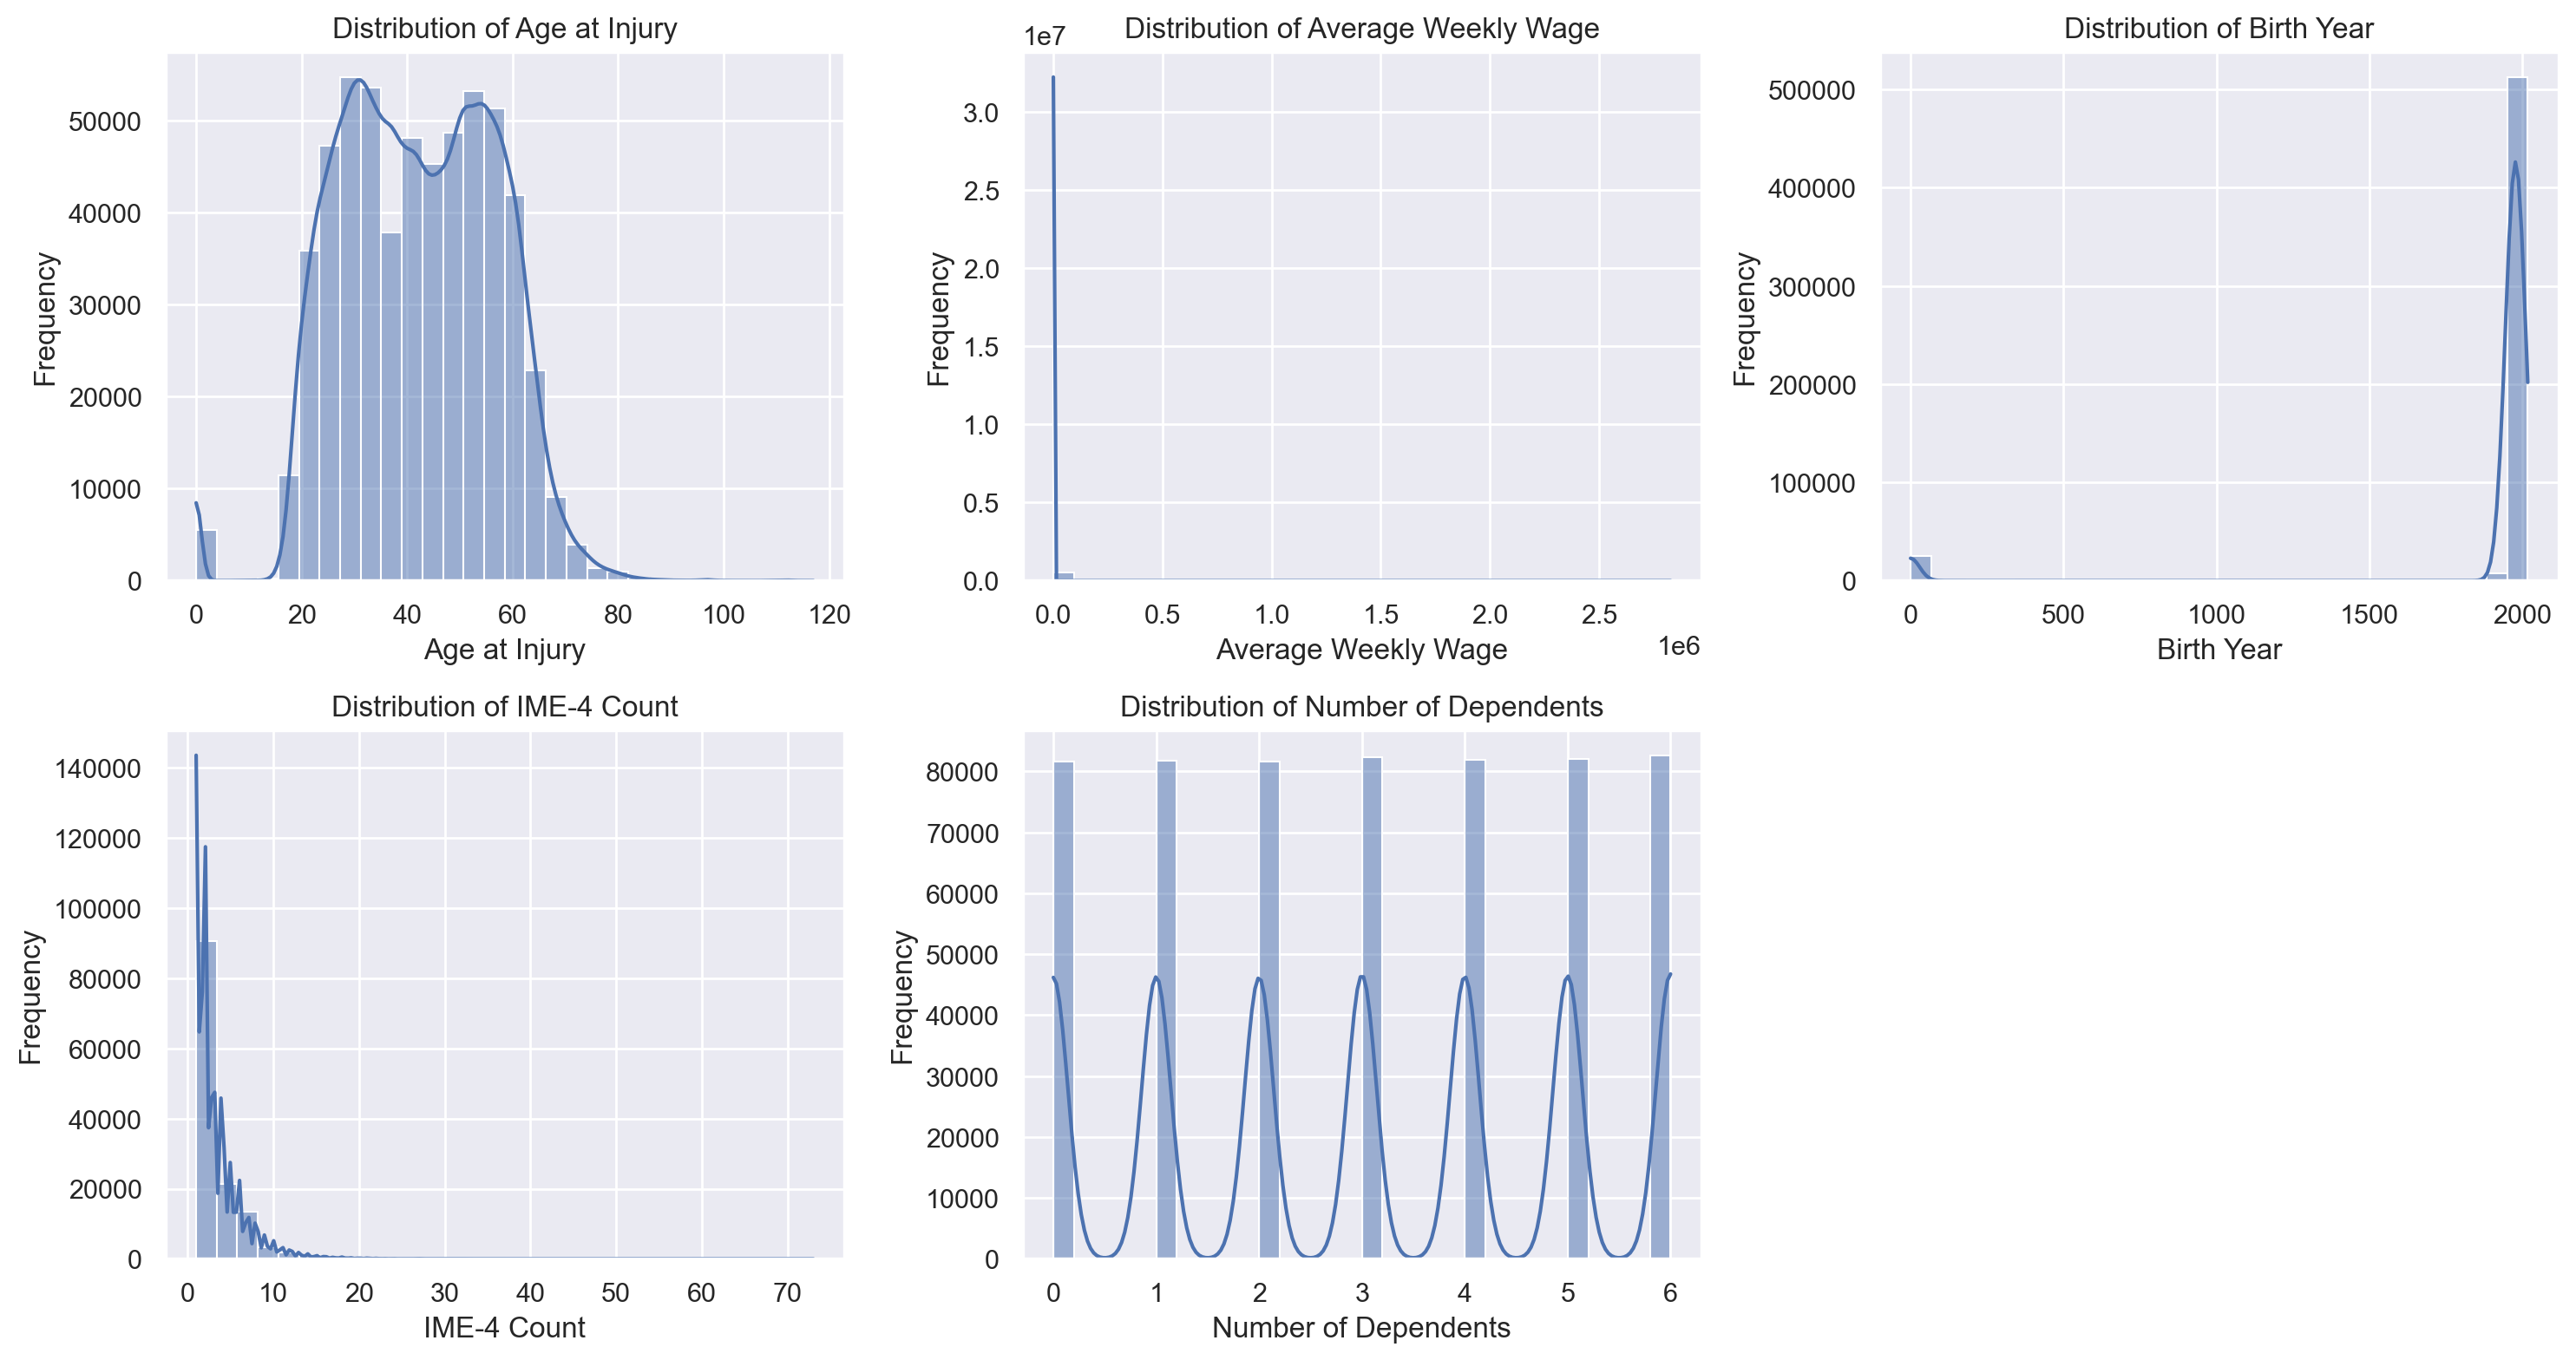

In [45]:
# Select numerical attributes with continuous values
numeric_attributes = train_data.loc[:, ['Age at Injury','Average Weekly Wage', 'Birth Year','IME-4 Count','Number of Dependents']]

# Set the number of subplots
num_attributes = len(numeric_attributes.columns)
num_cols = 3  # Set the number of columns for the subplots
num_rows = (num_attributes // num_cols) + (num_attributes % num_cols > 0)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes

# Loop through each numerical attribute and plot its distribution
for i, column in enumerate(numeric_attributes.columns):
    sns.histplot(numeric_attributes[column], bins=30, kde=True, ax=axes[i])  # KDE adds a density curve
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### We can conclude that:
- only 'Age at Injury' follows a normal distribution;
- there are outliers in Average Weekly Wage, Birth Year and IME-4 Count;
- Number of Dependents has a similar number of rows for each value, which is unexpectable.

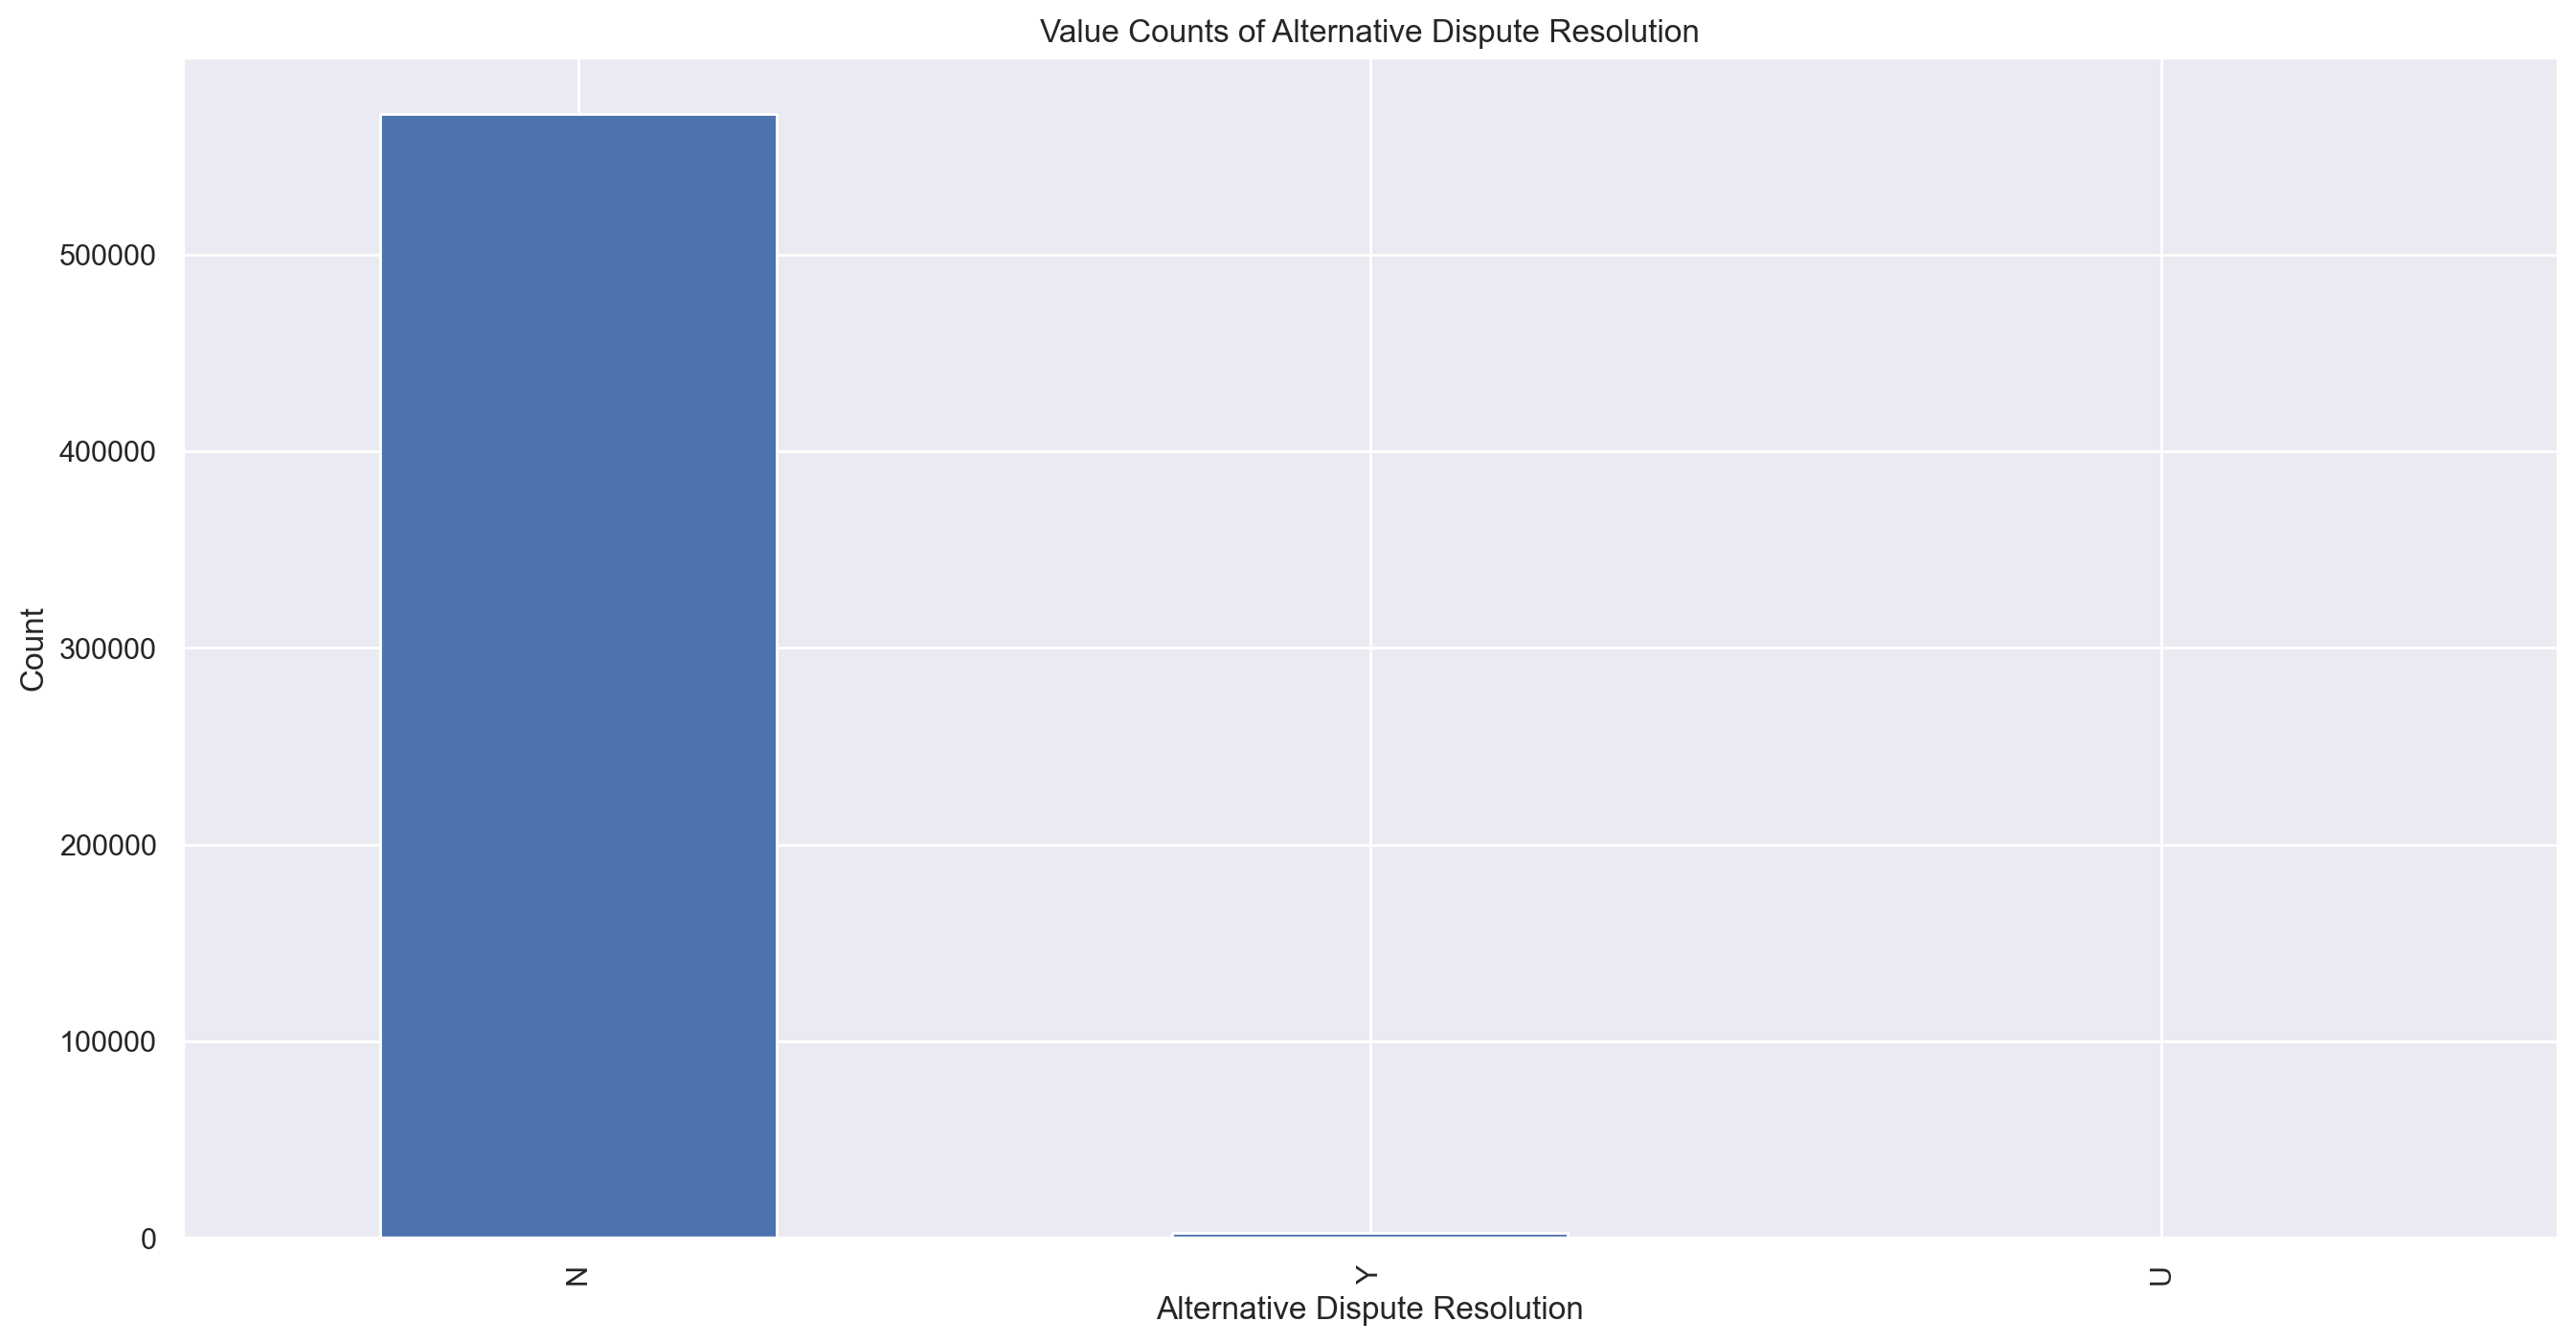

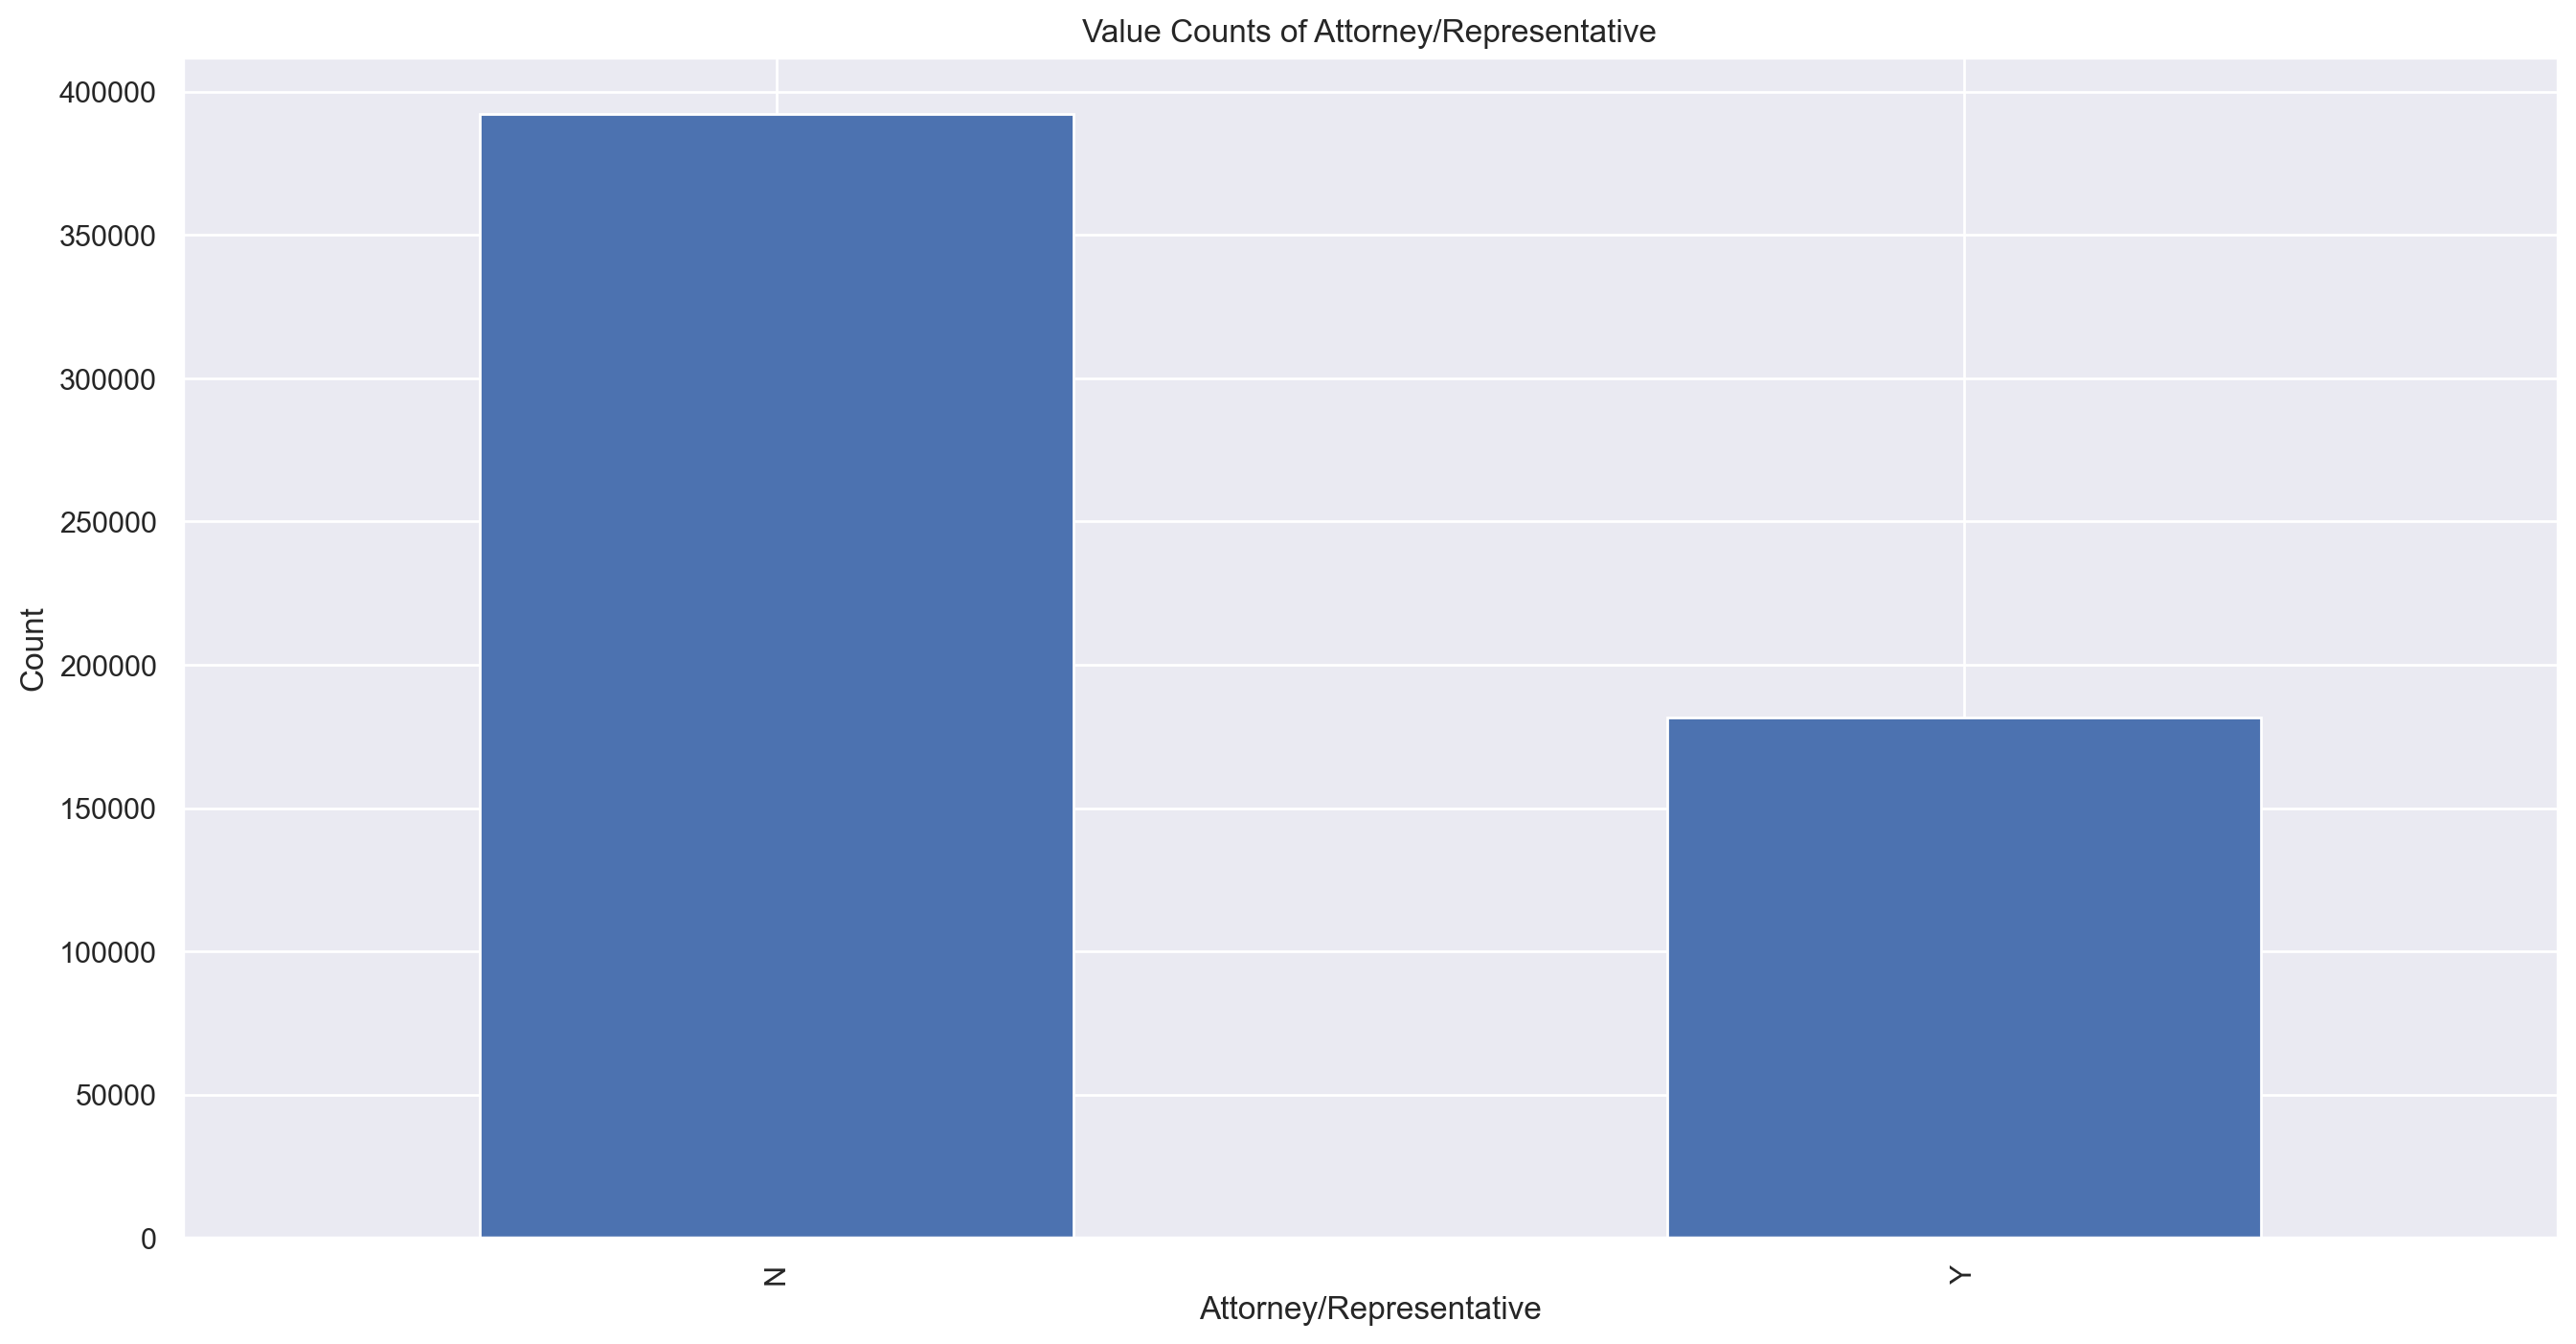

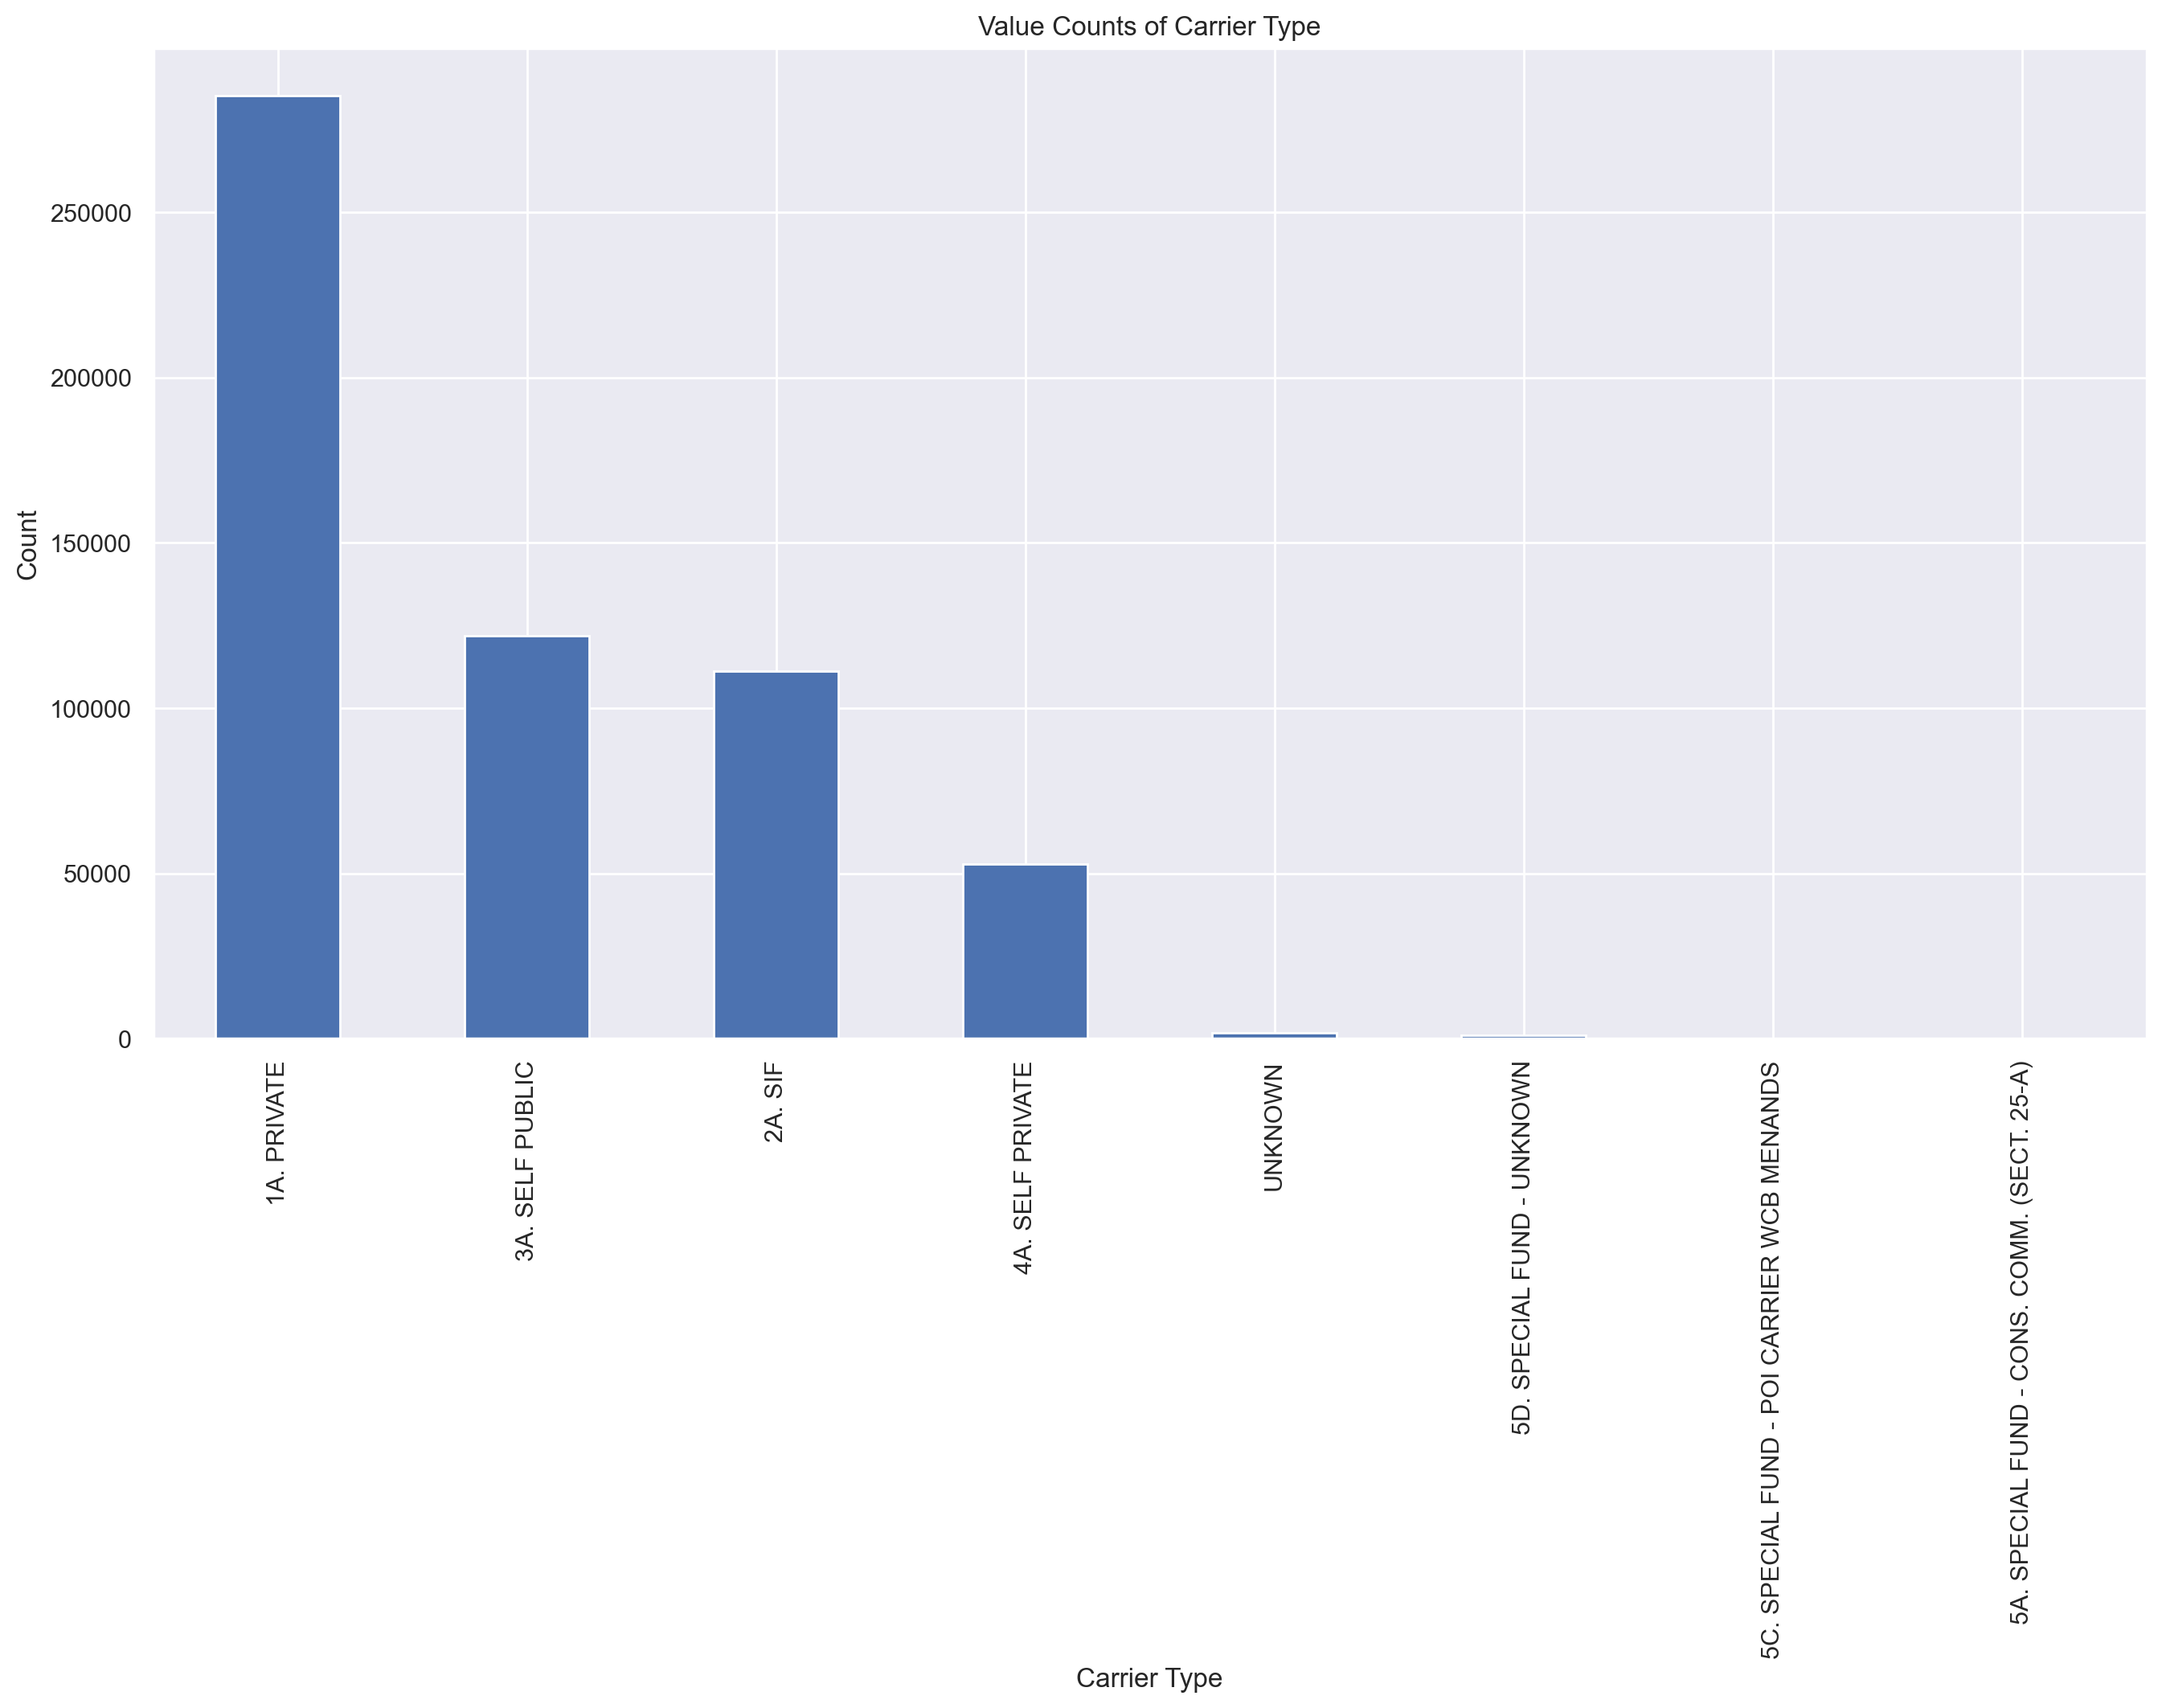

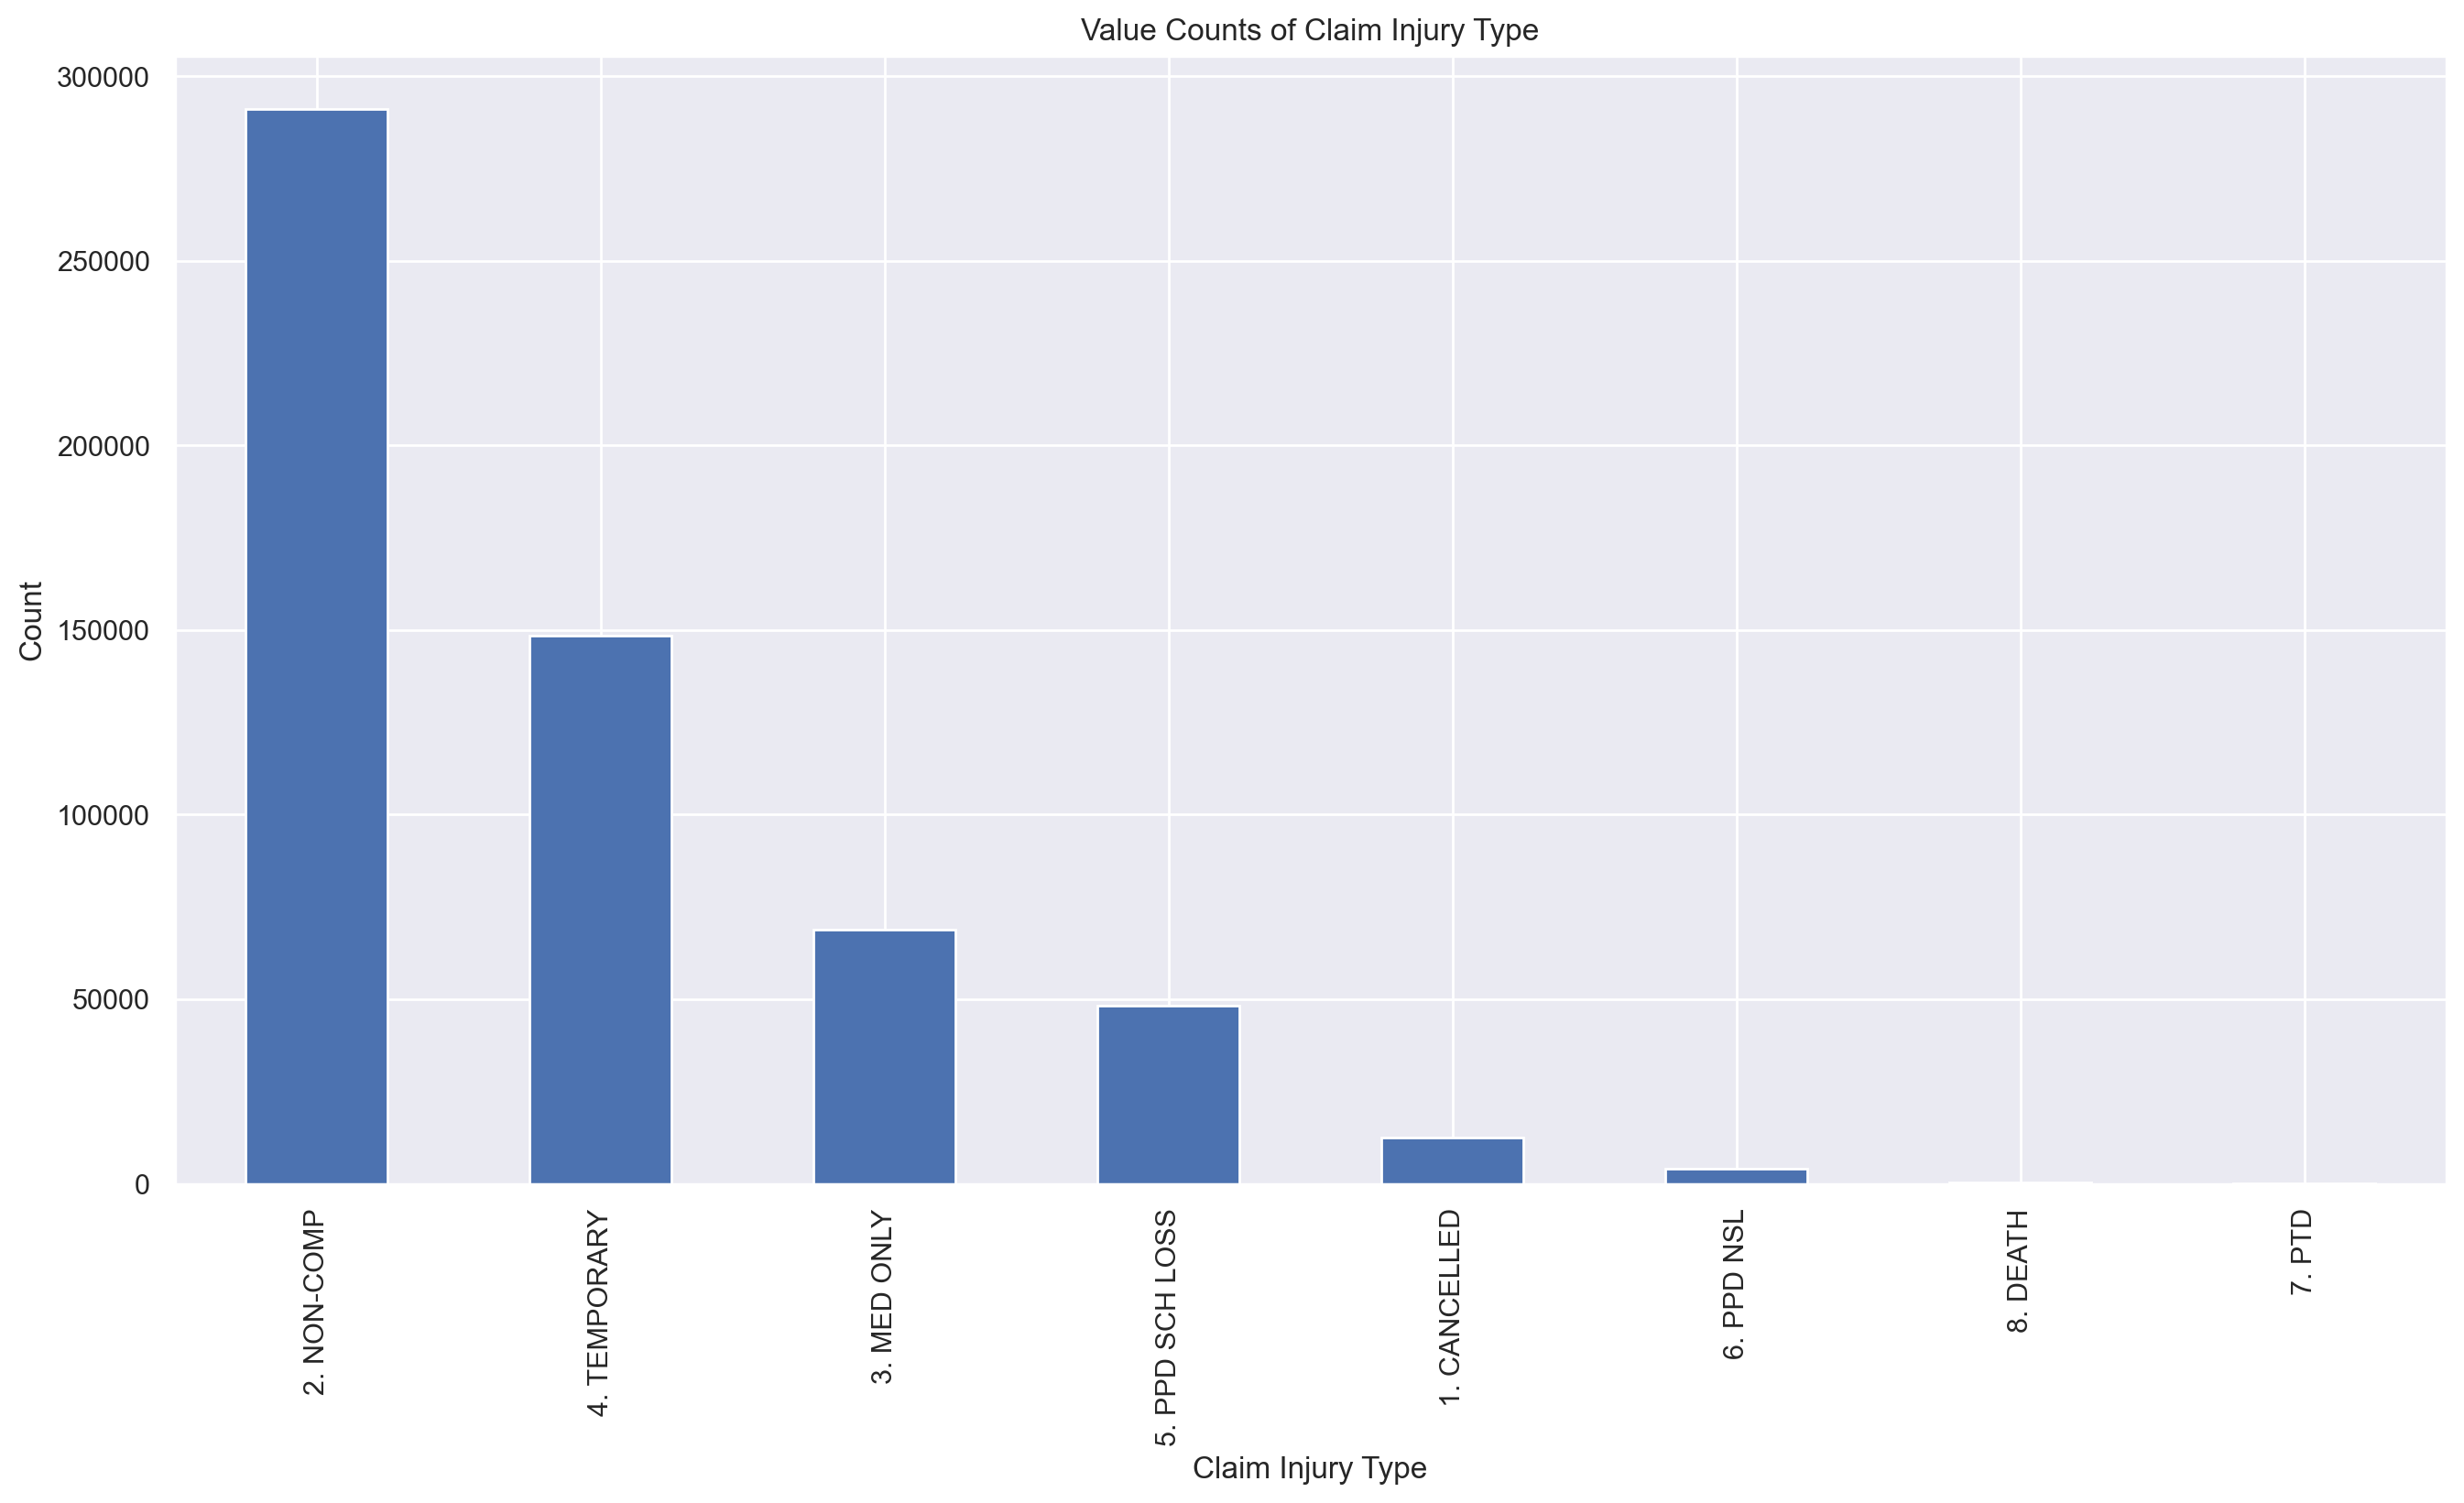

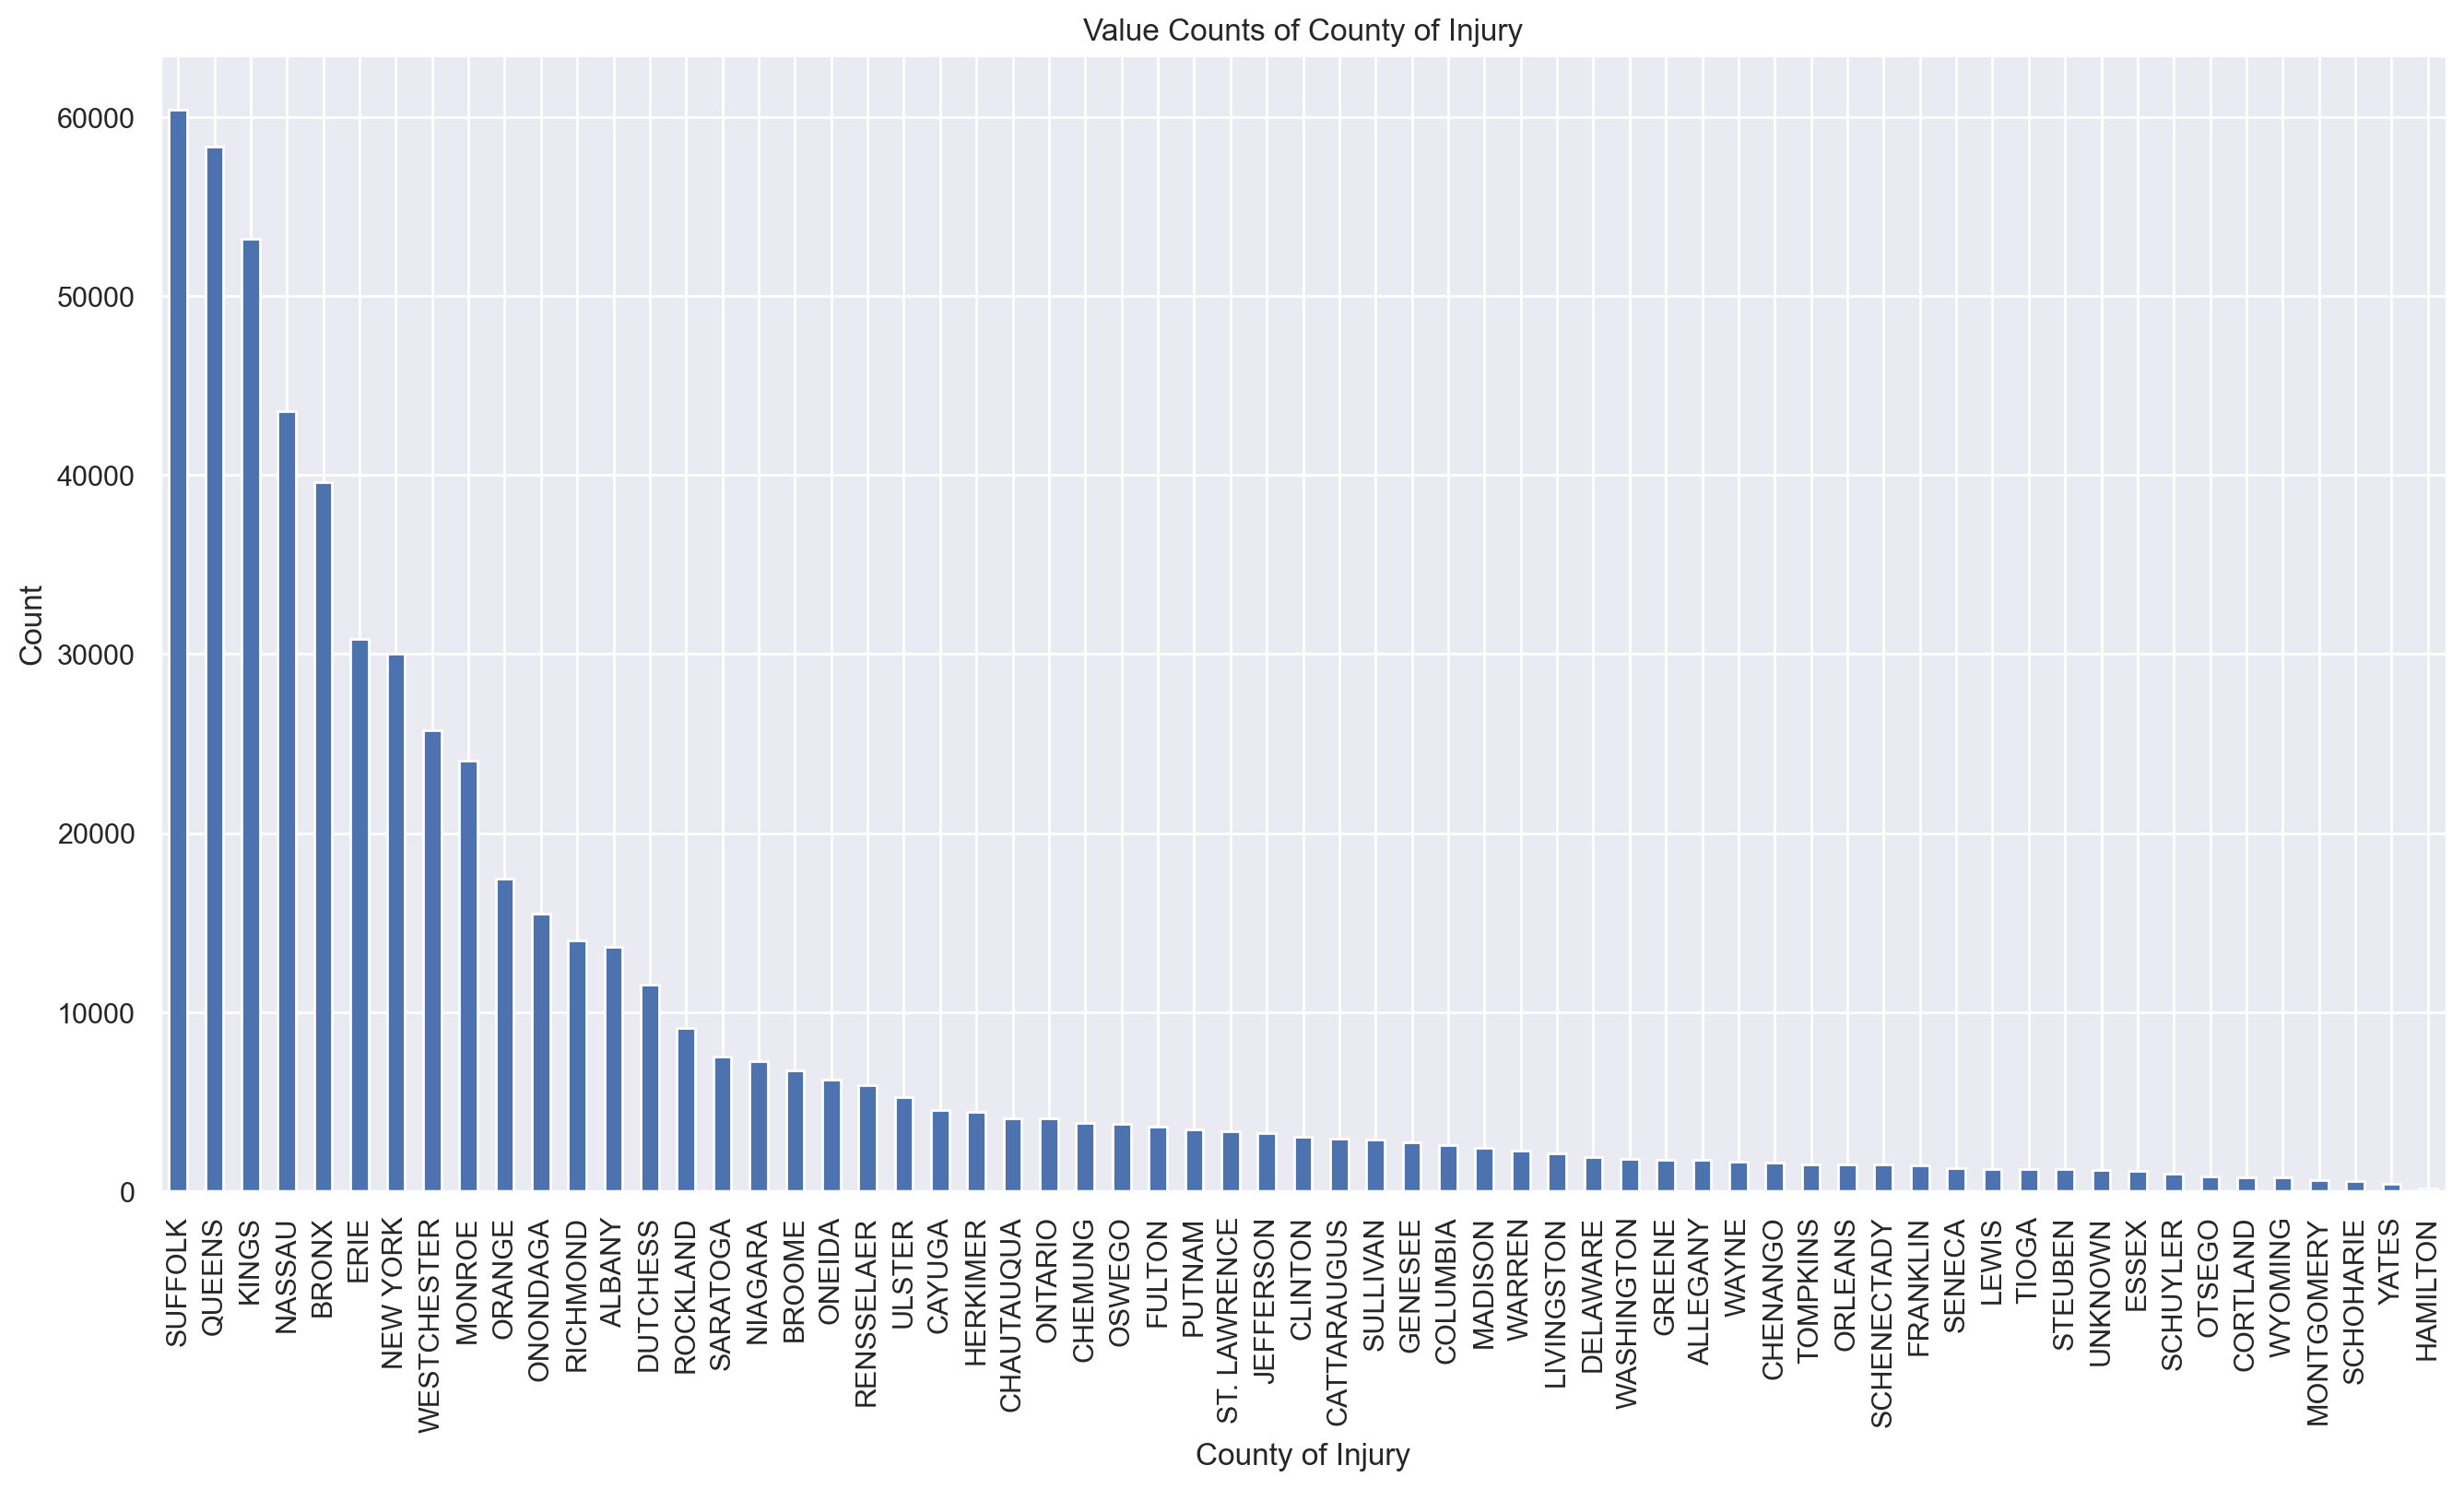

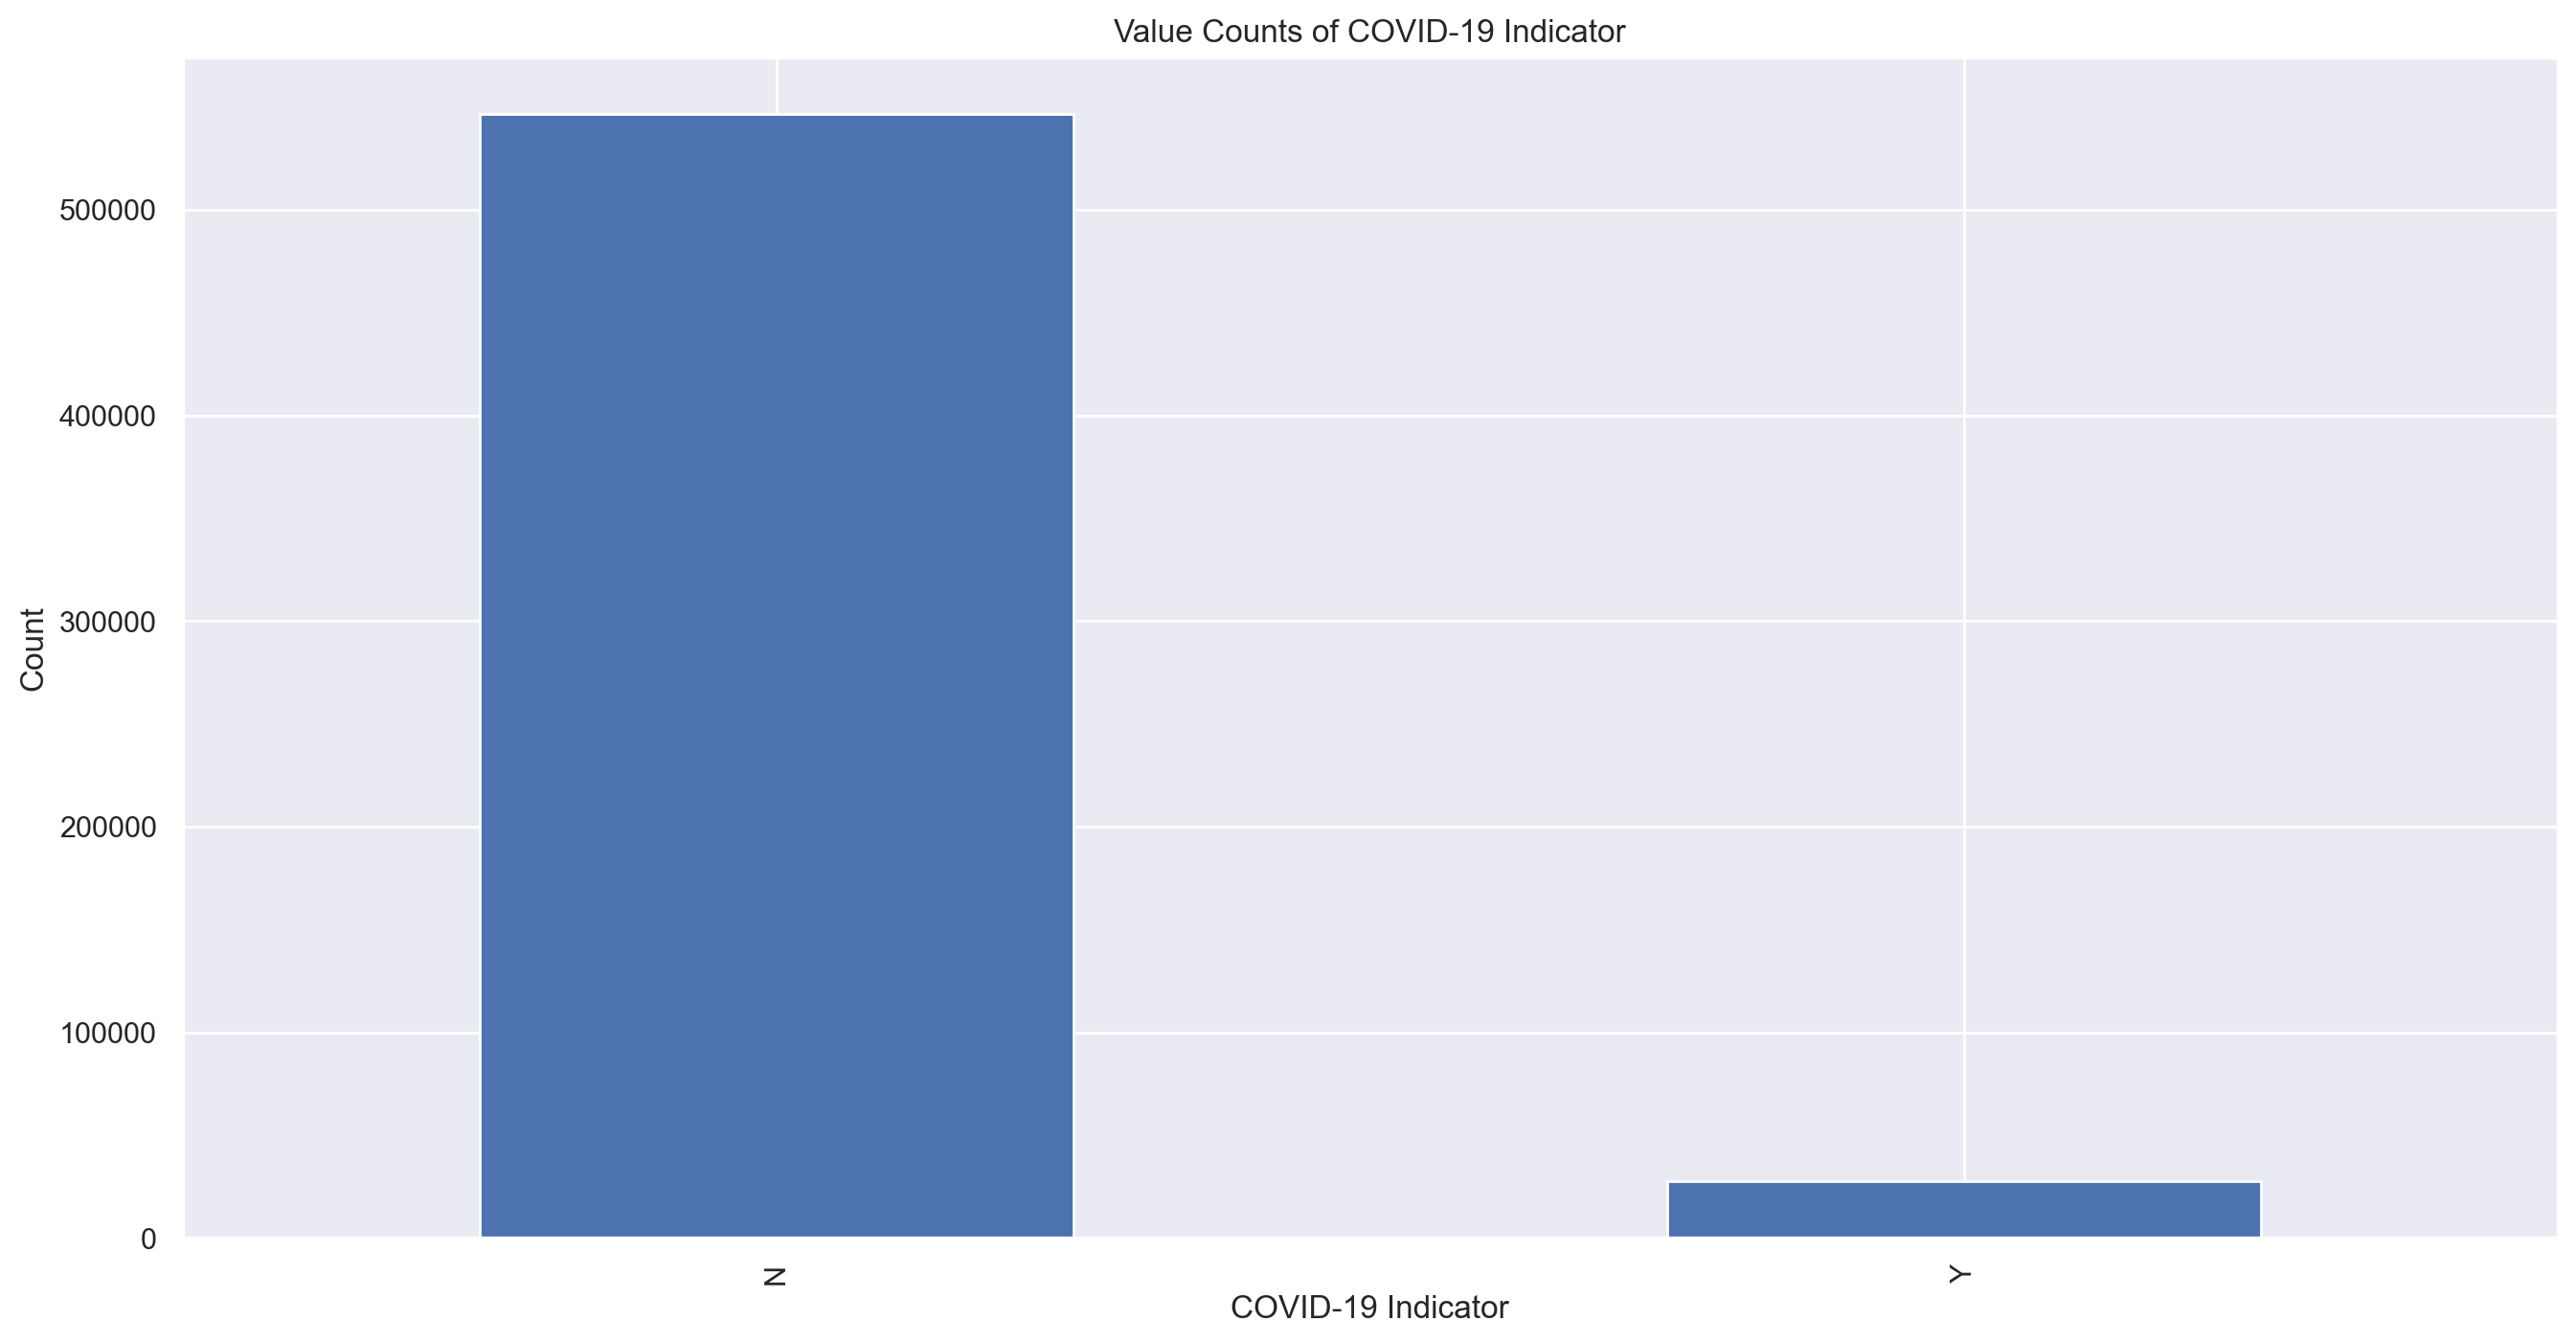

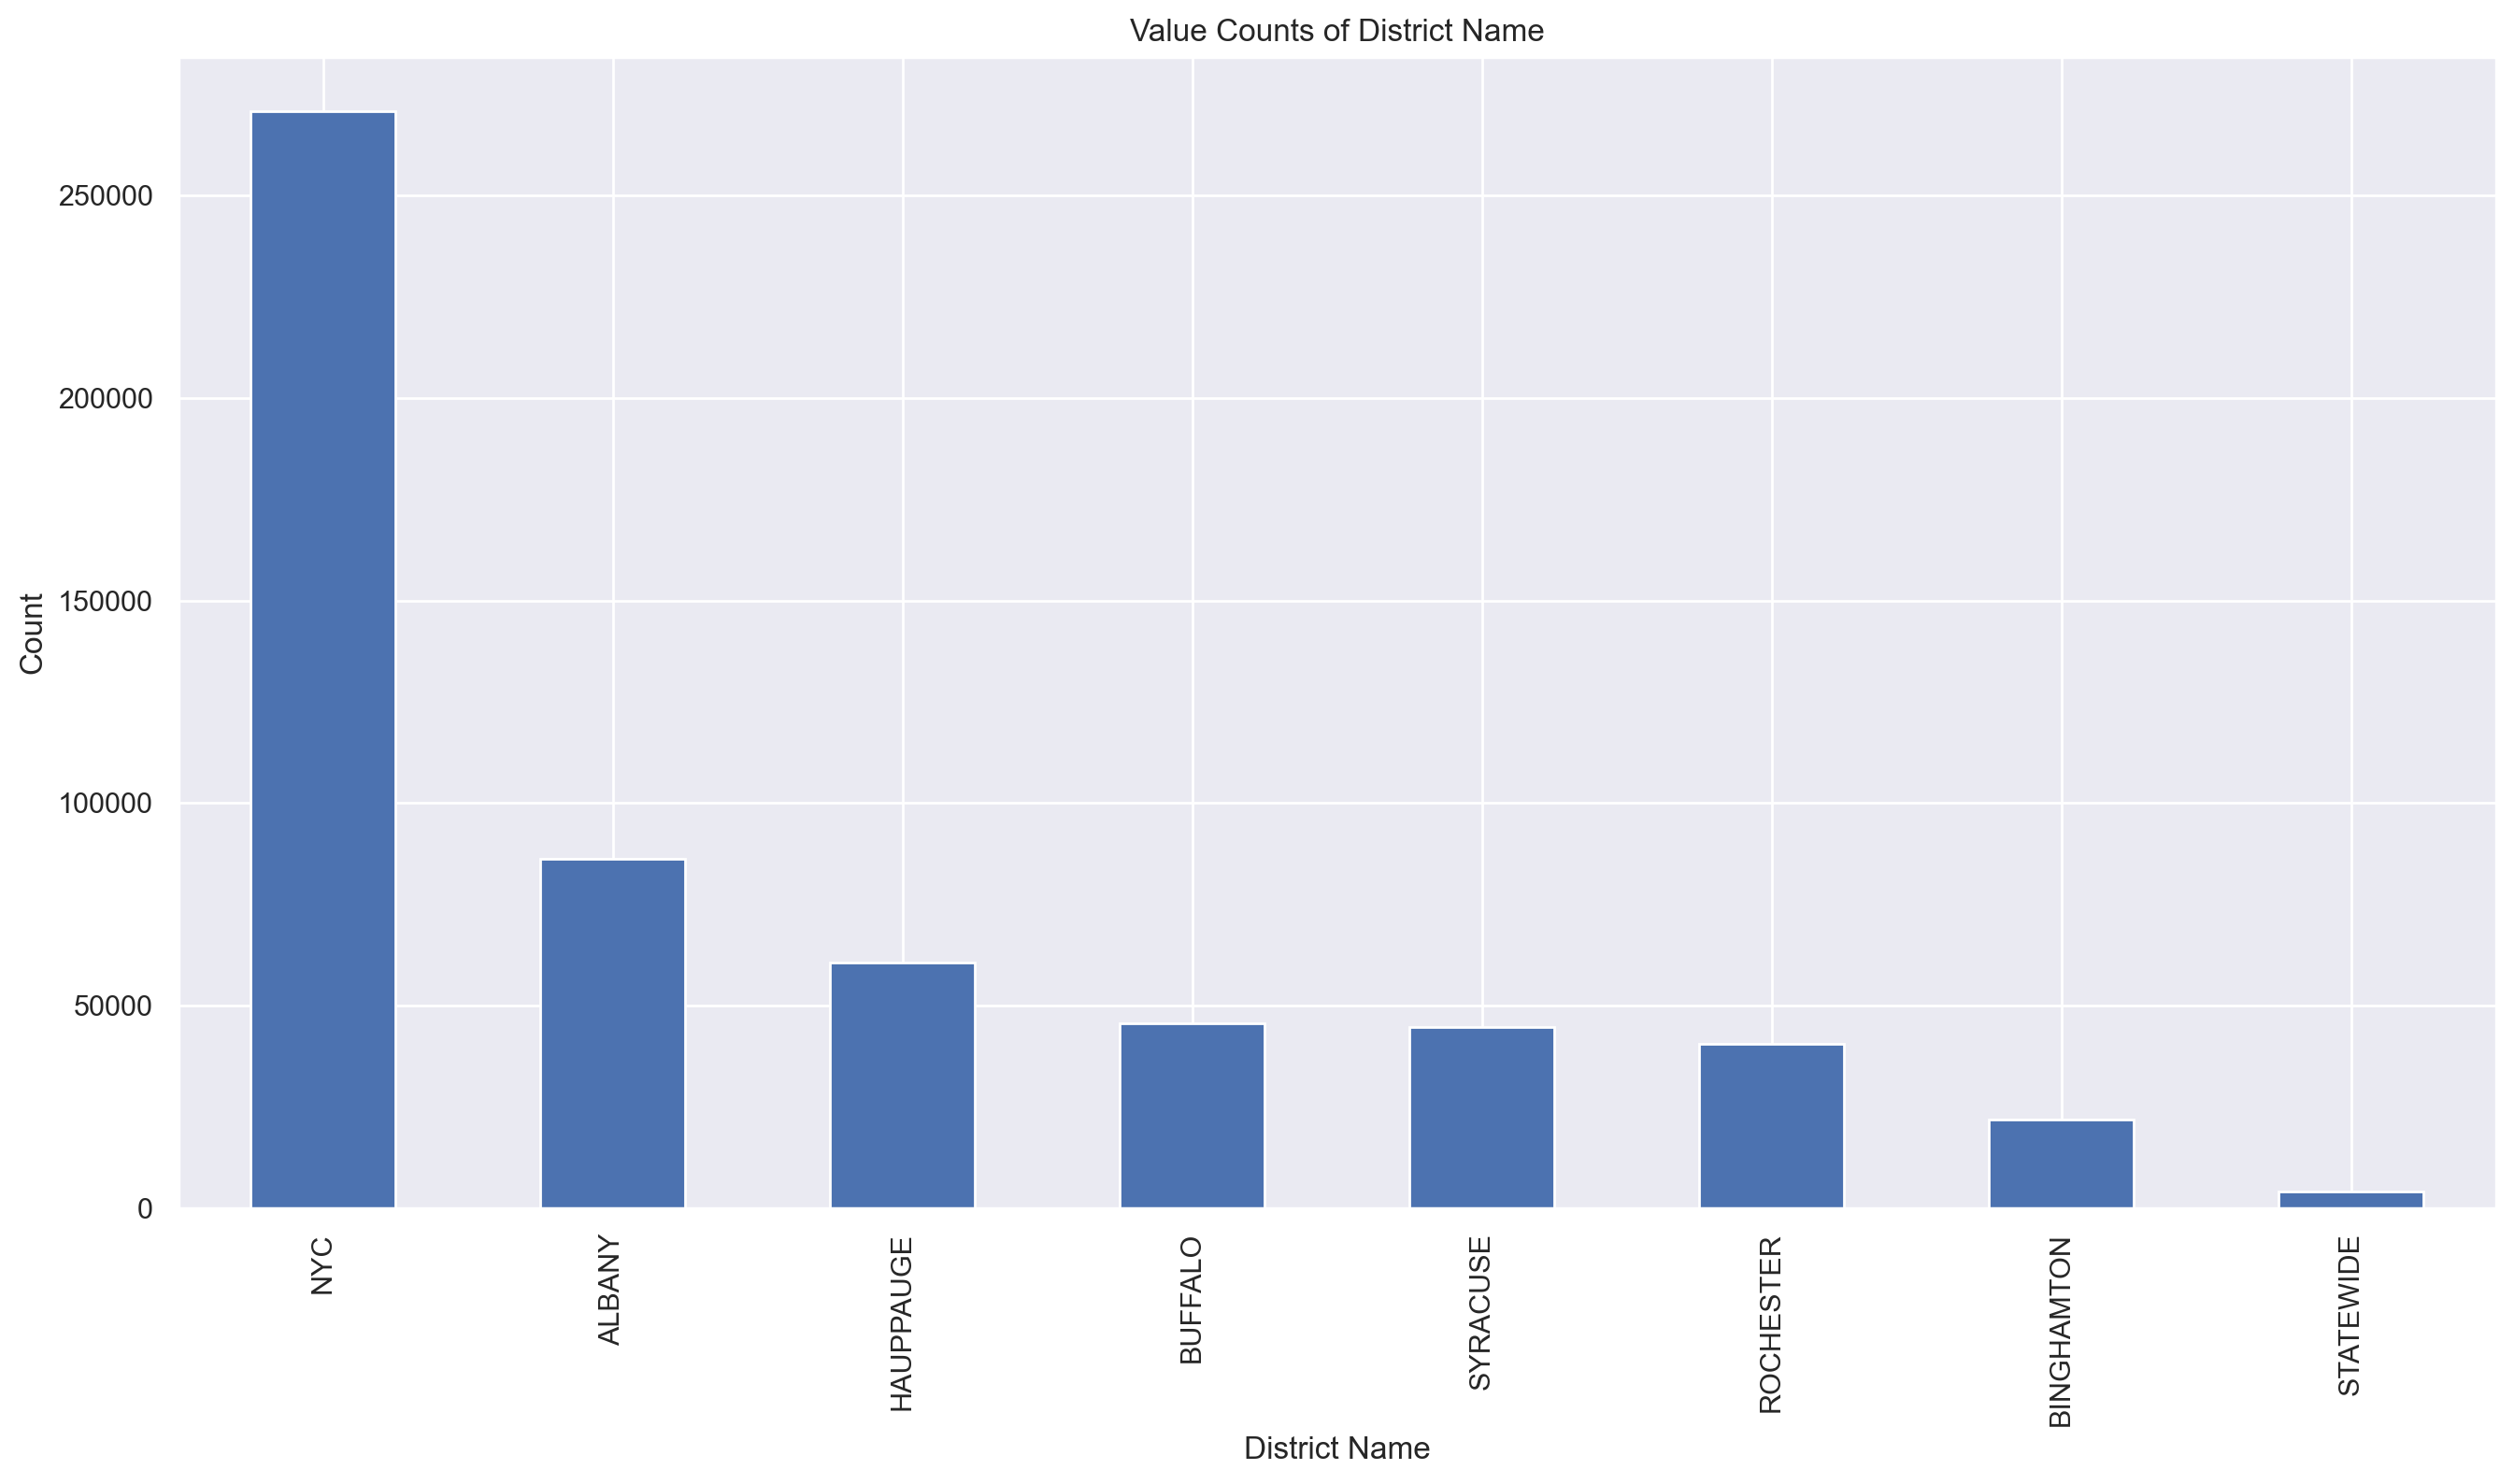

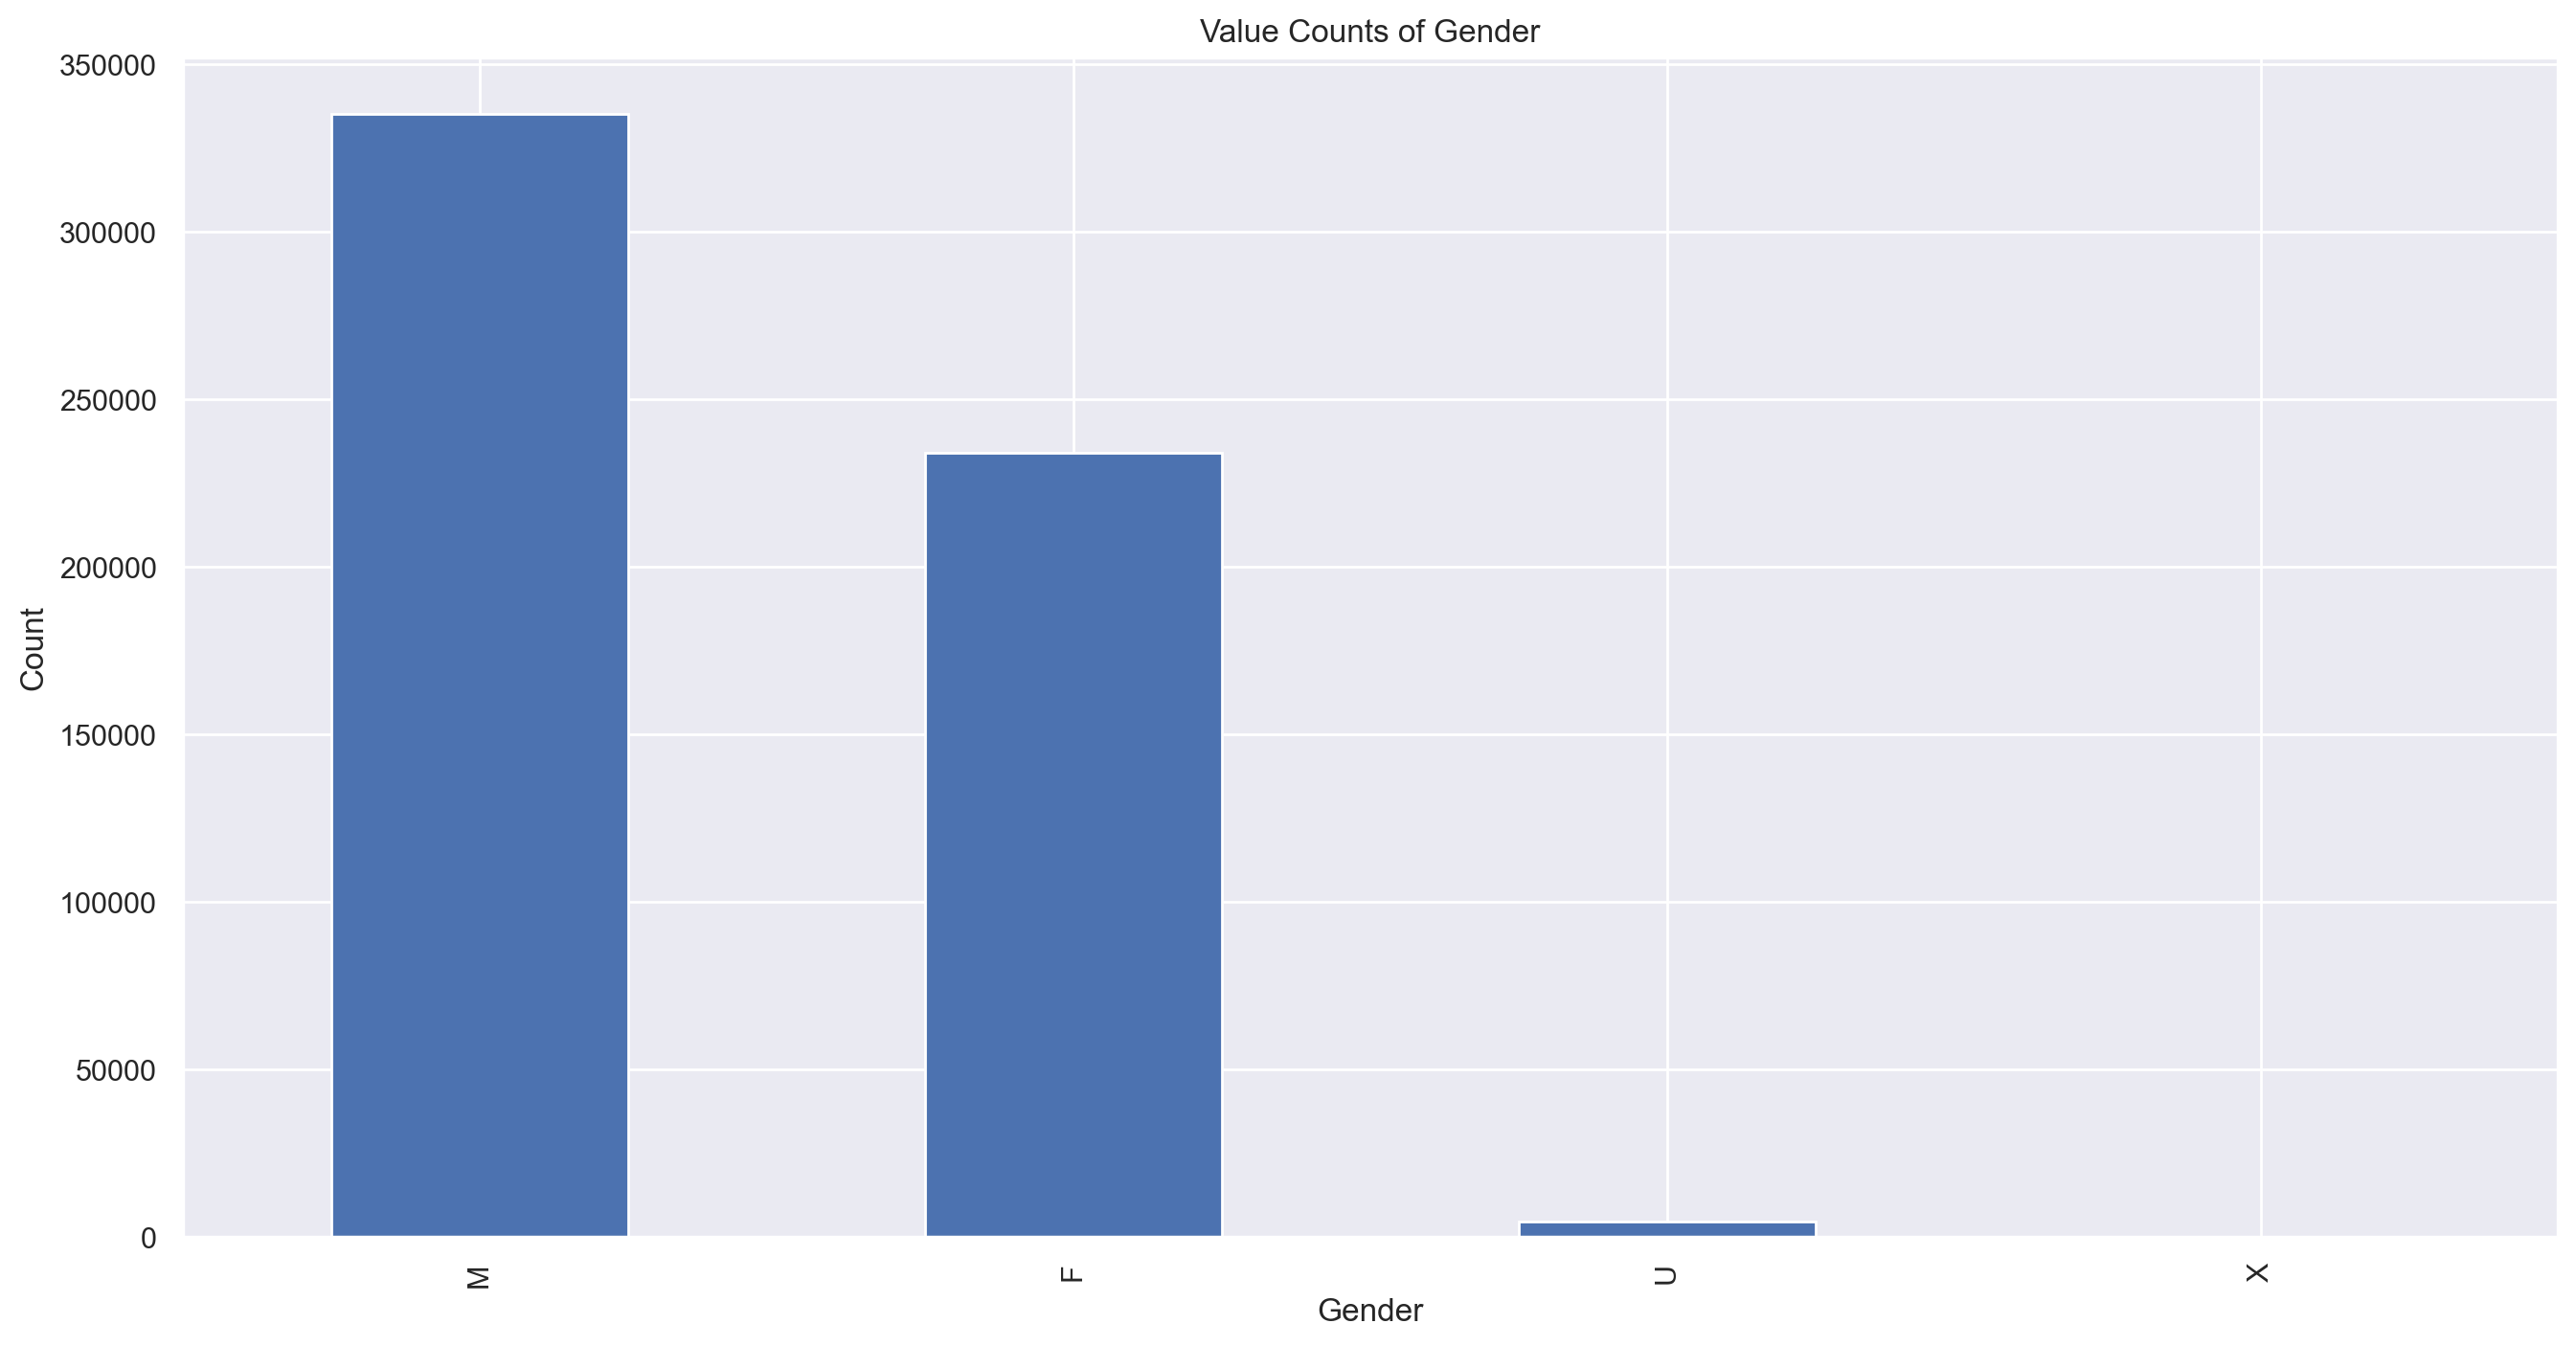

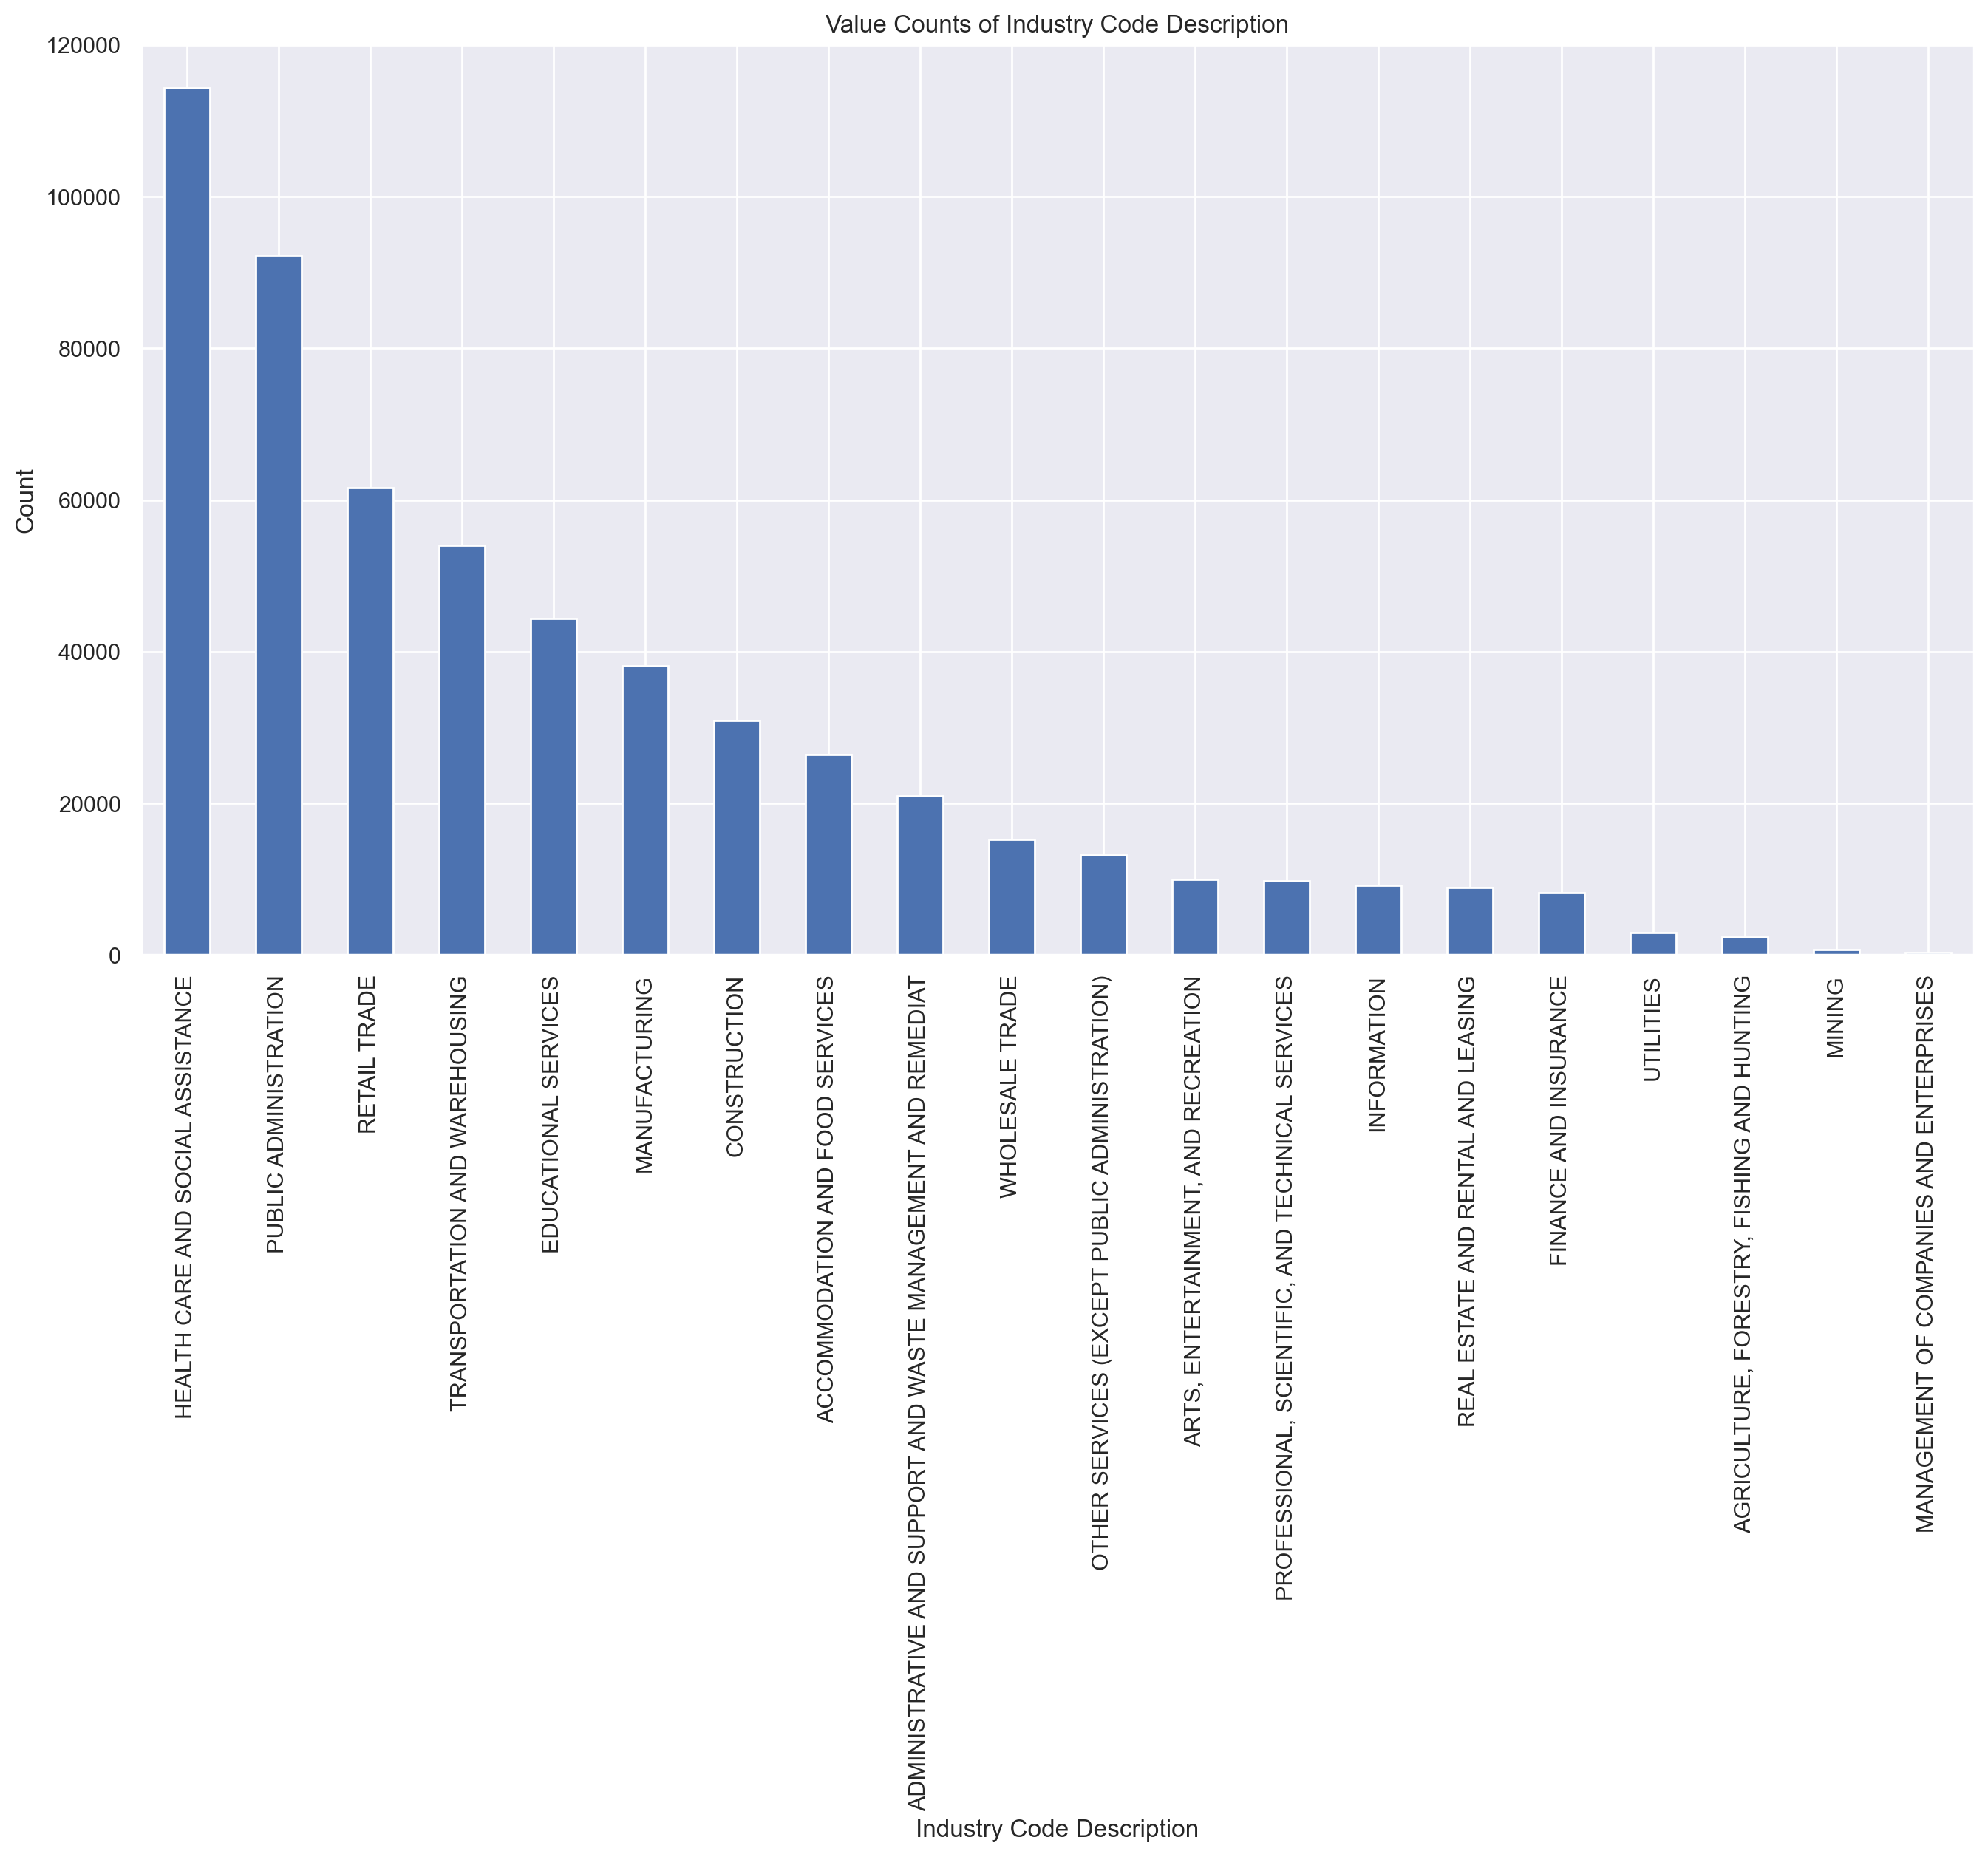

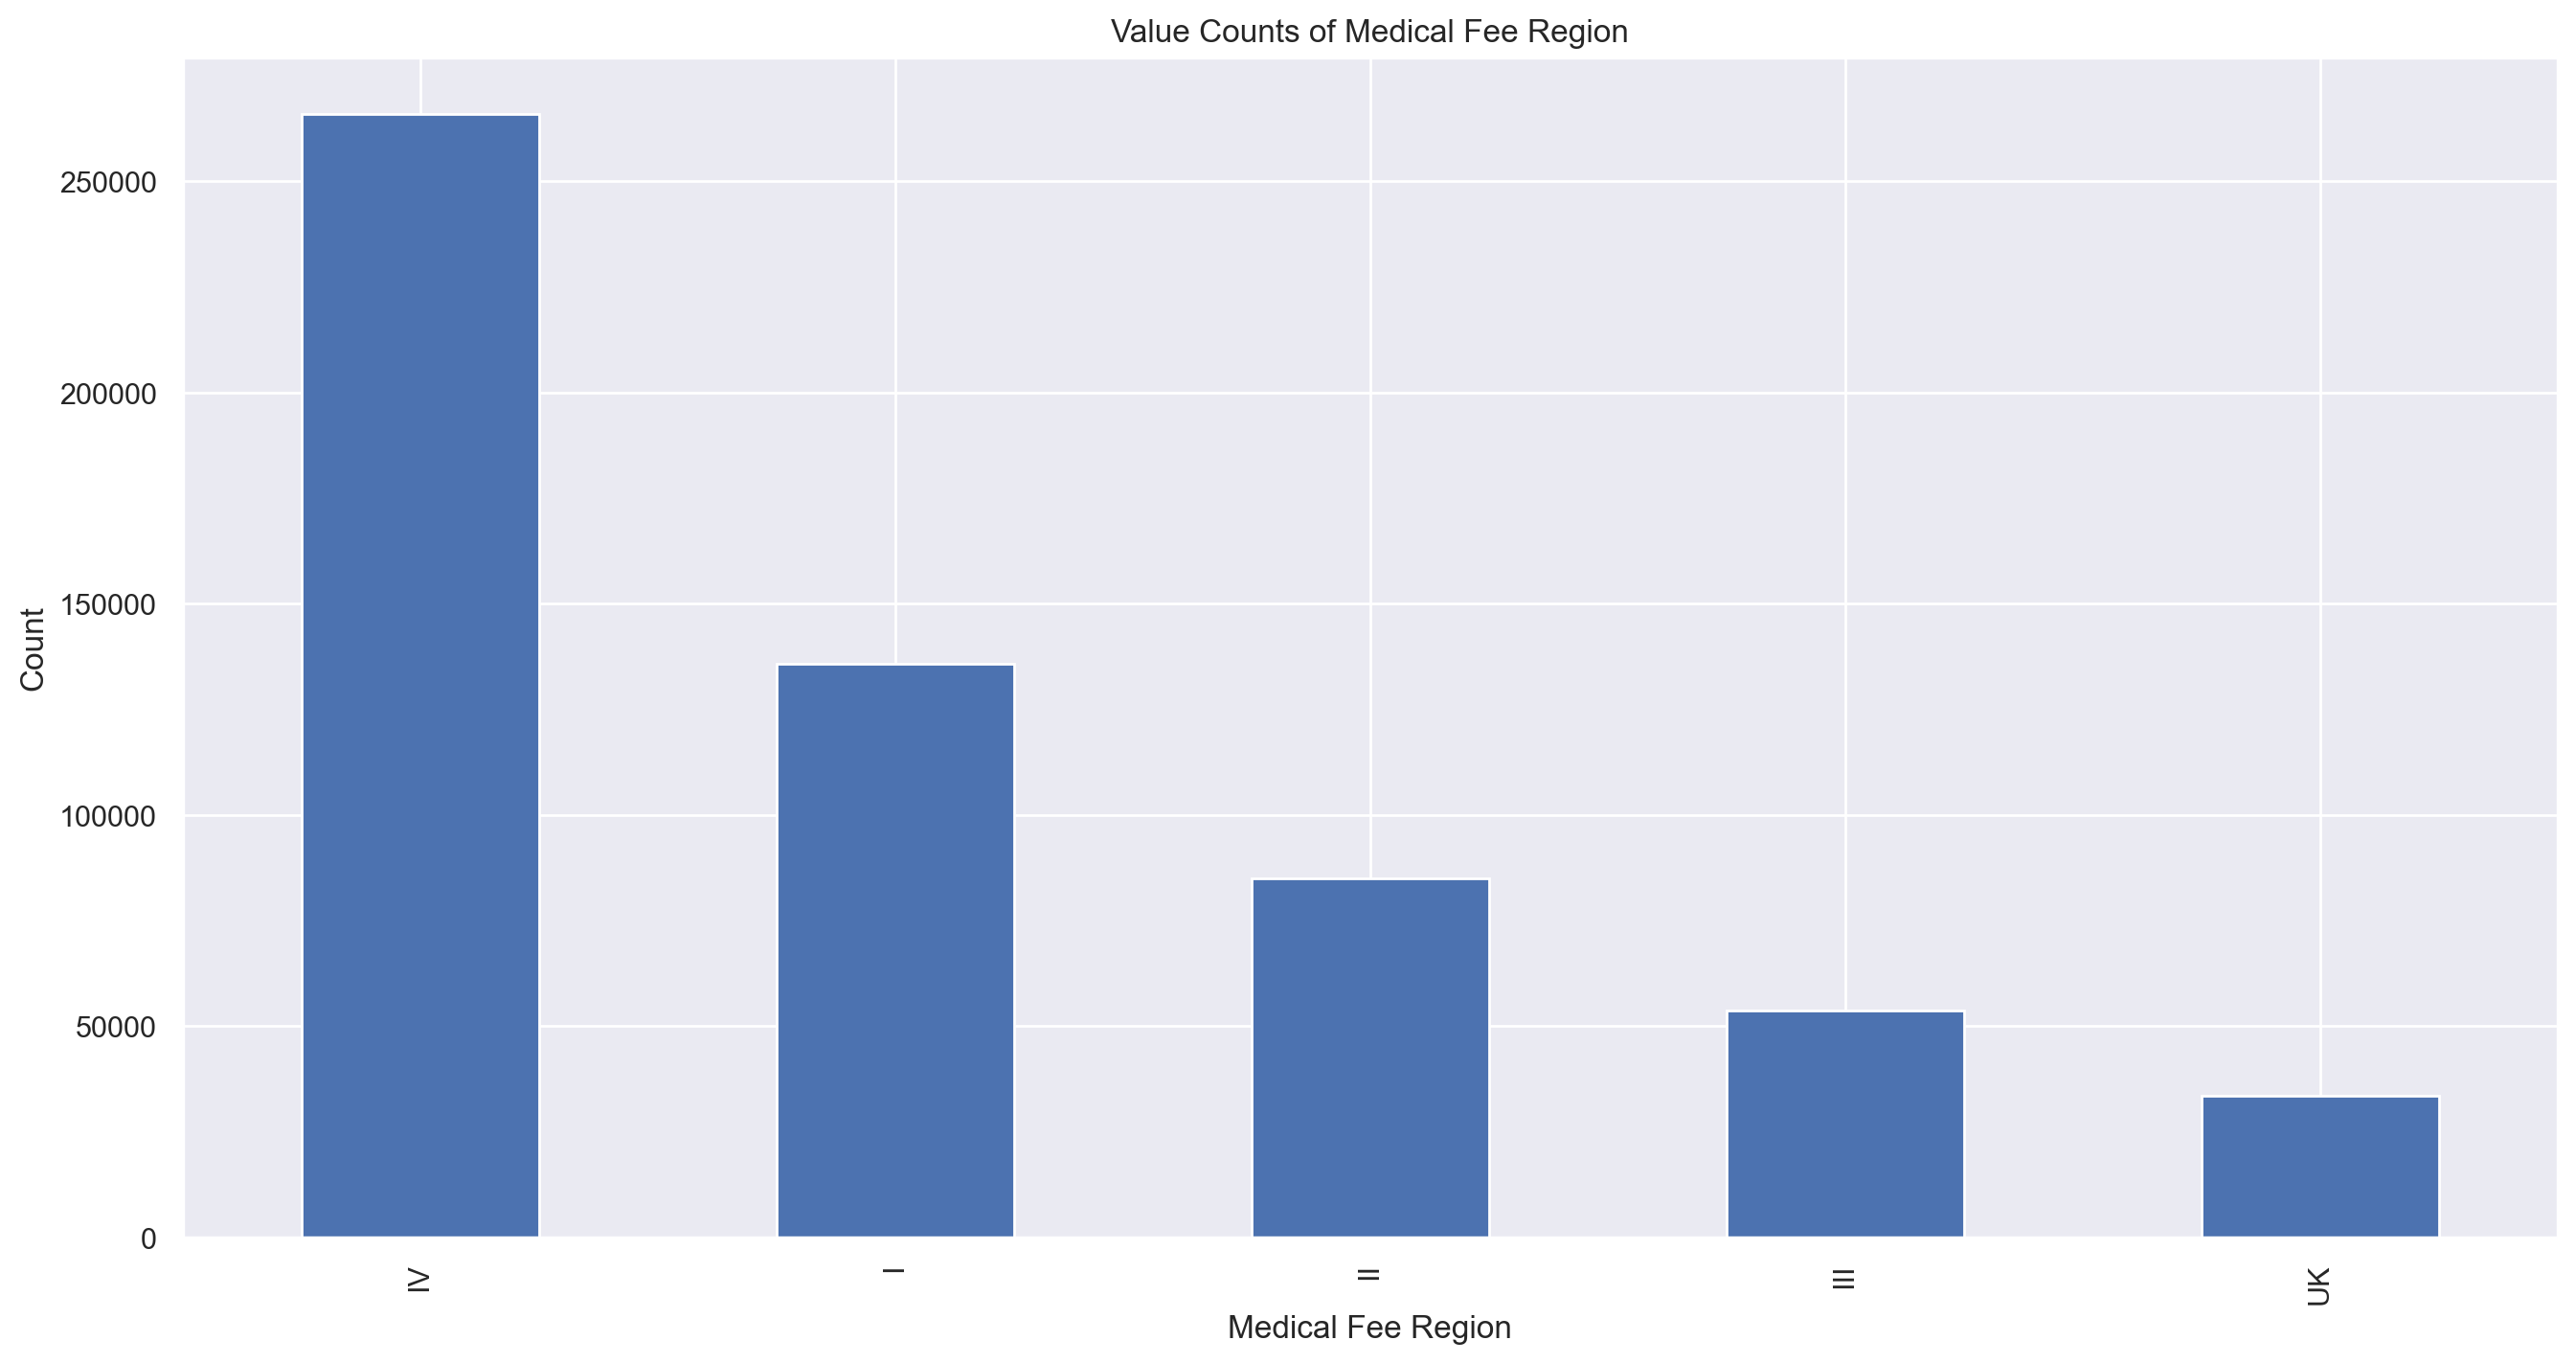

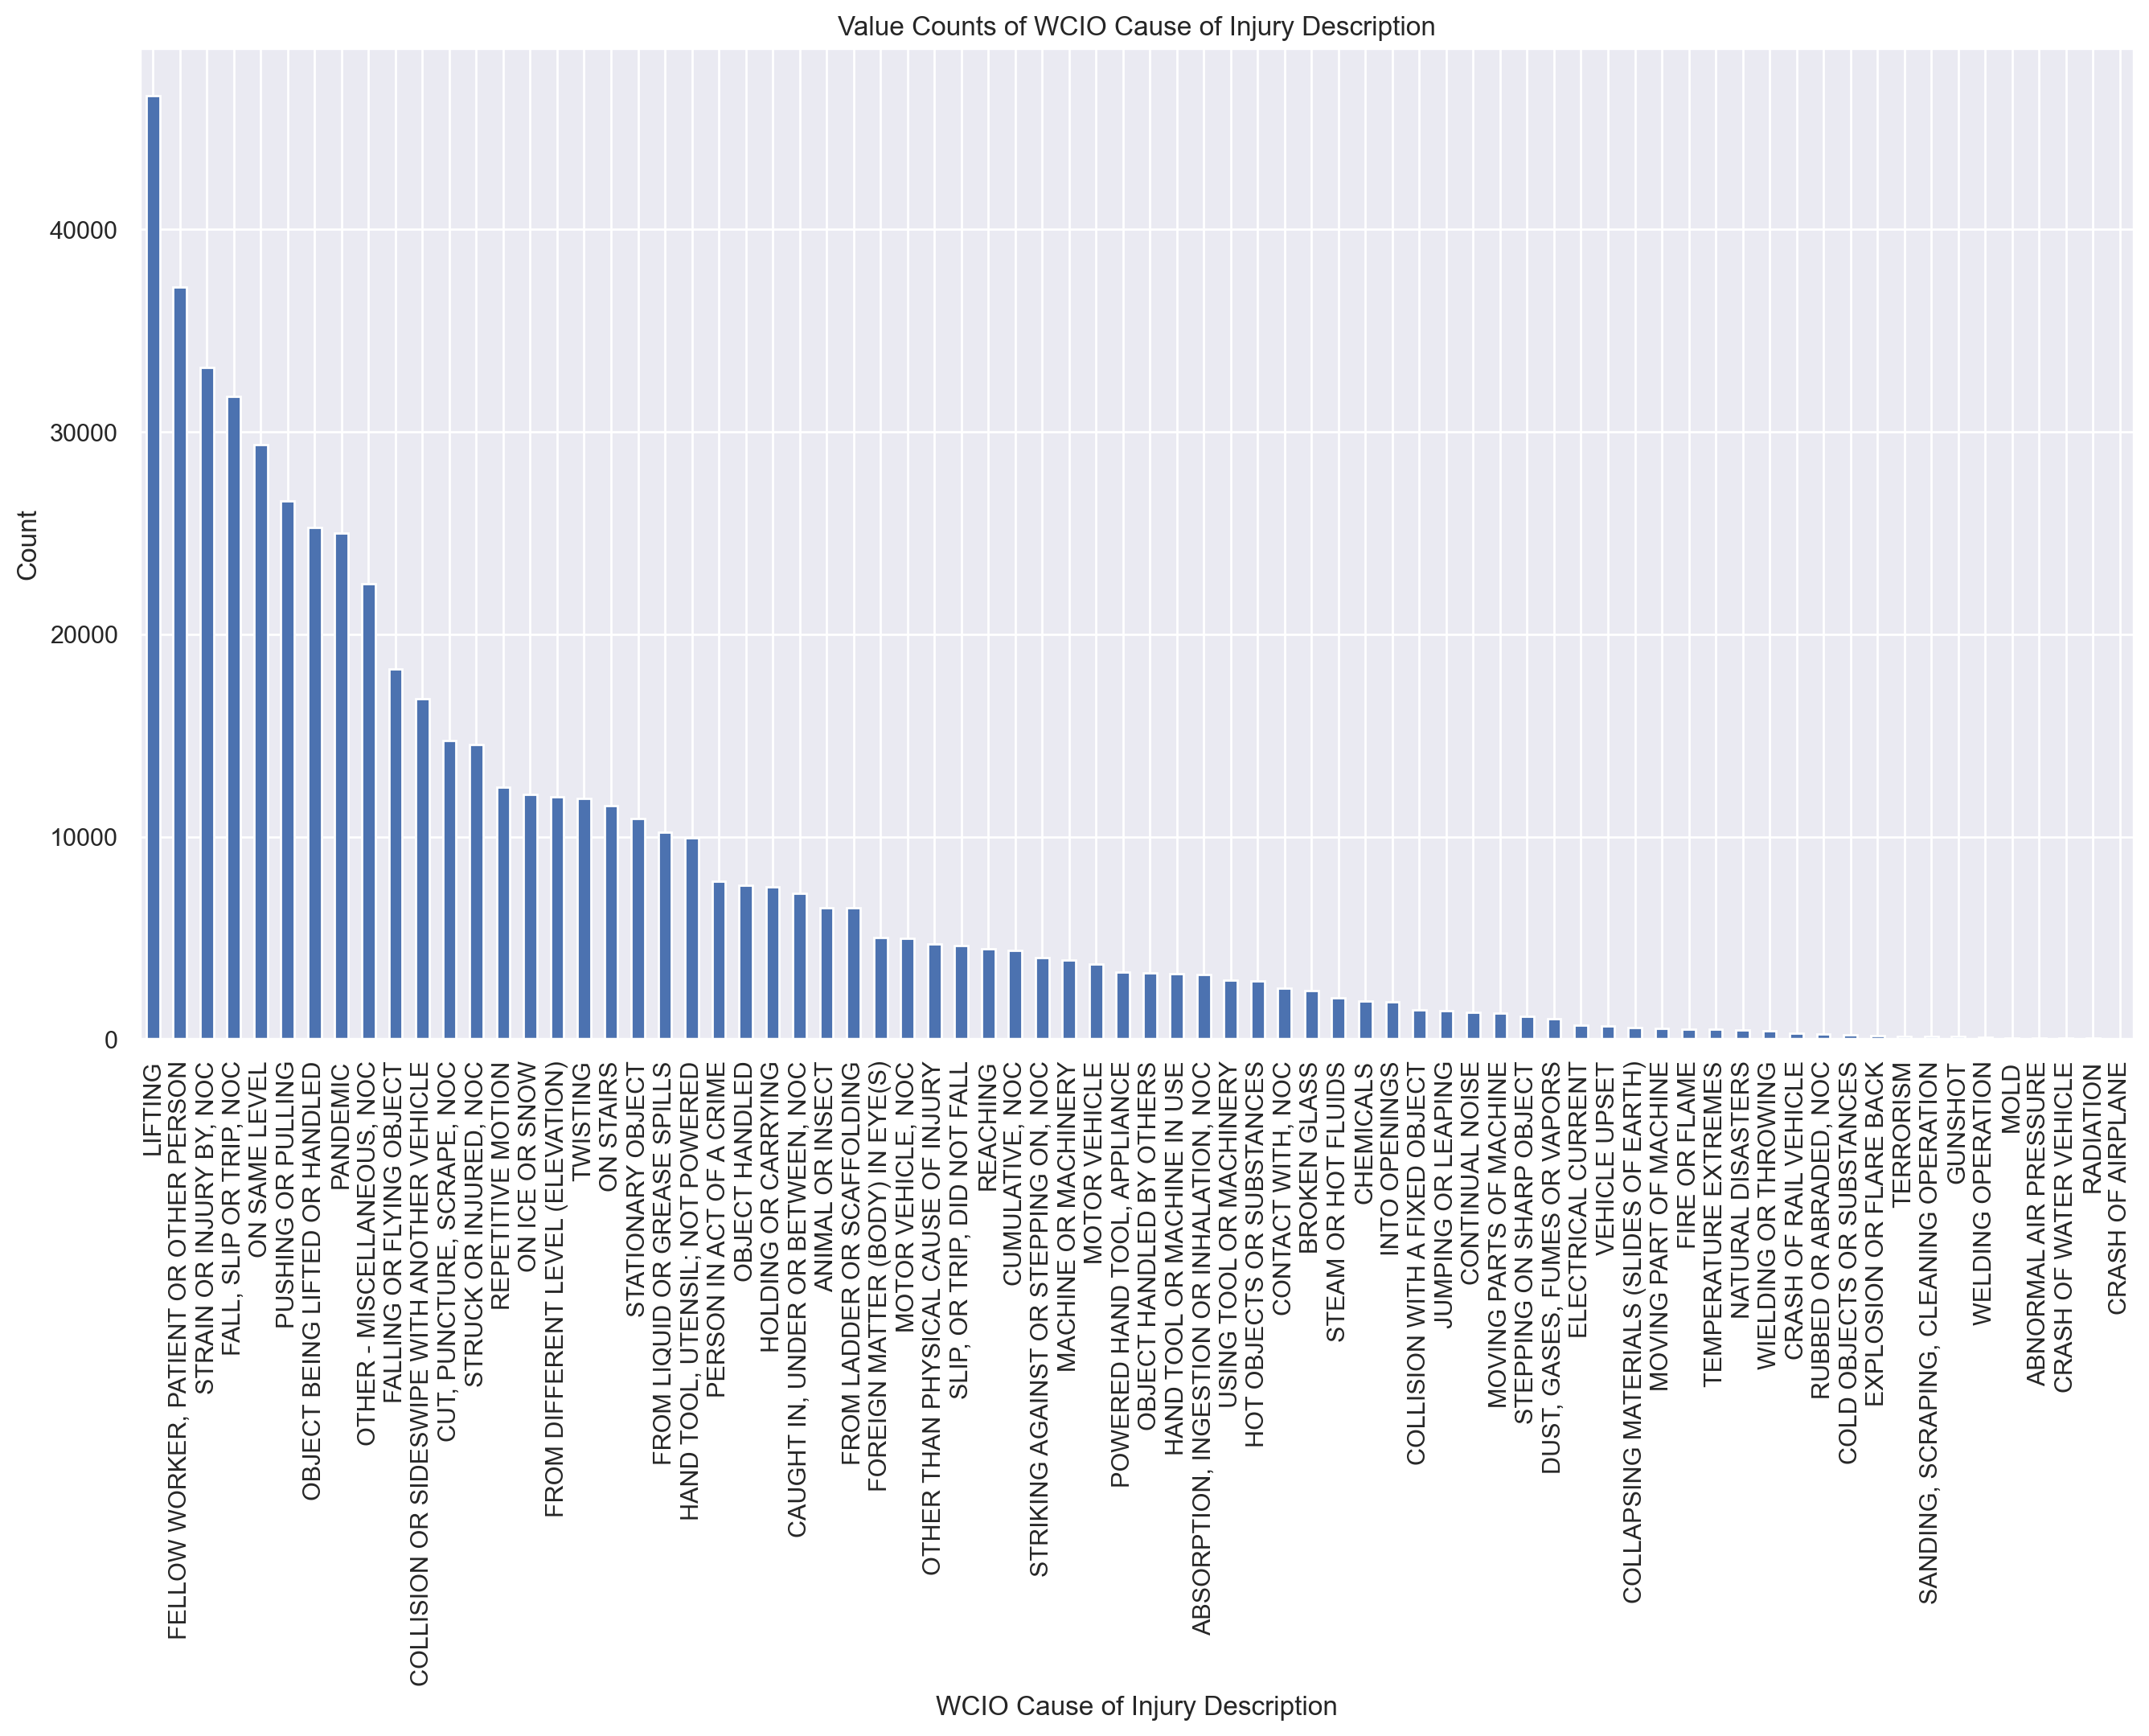

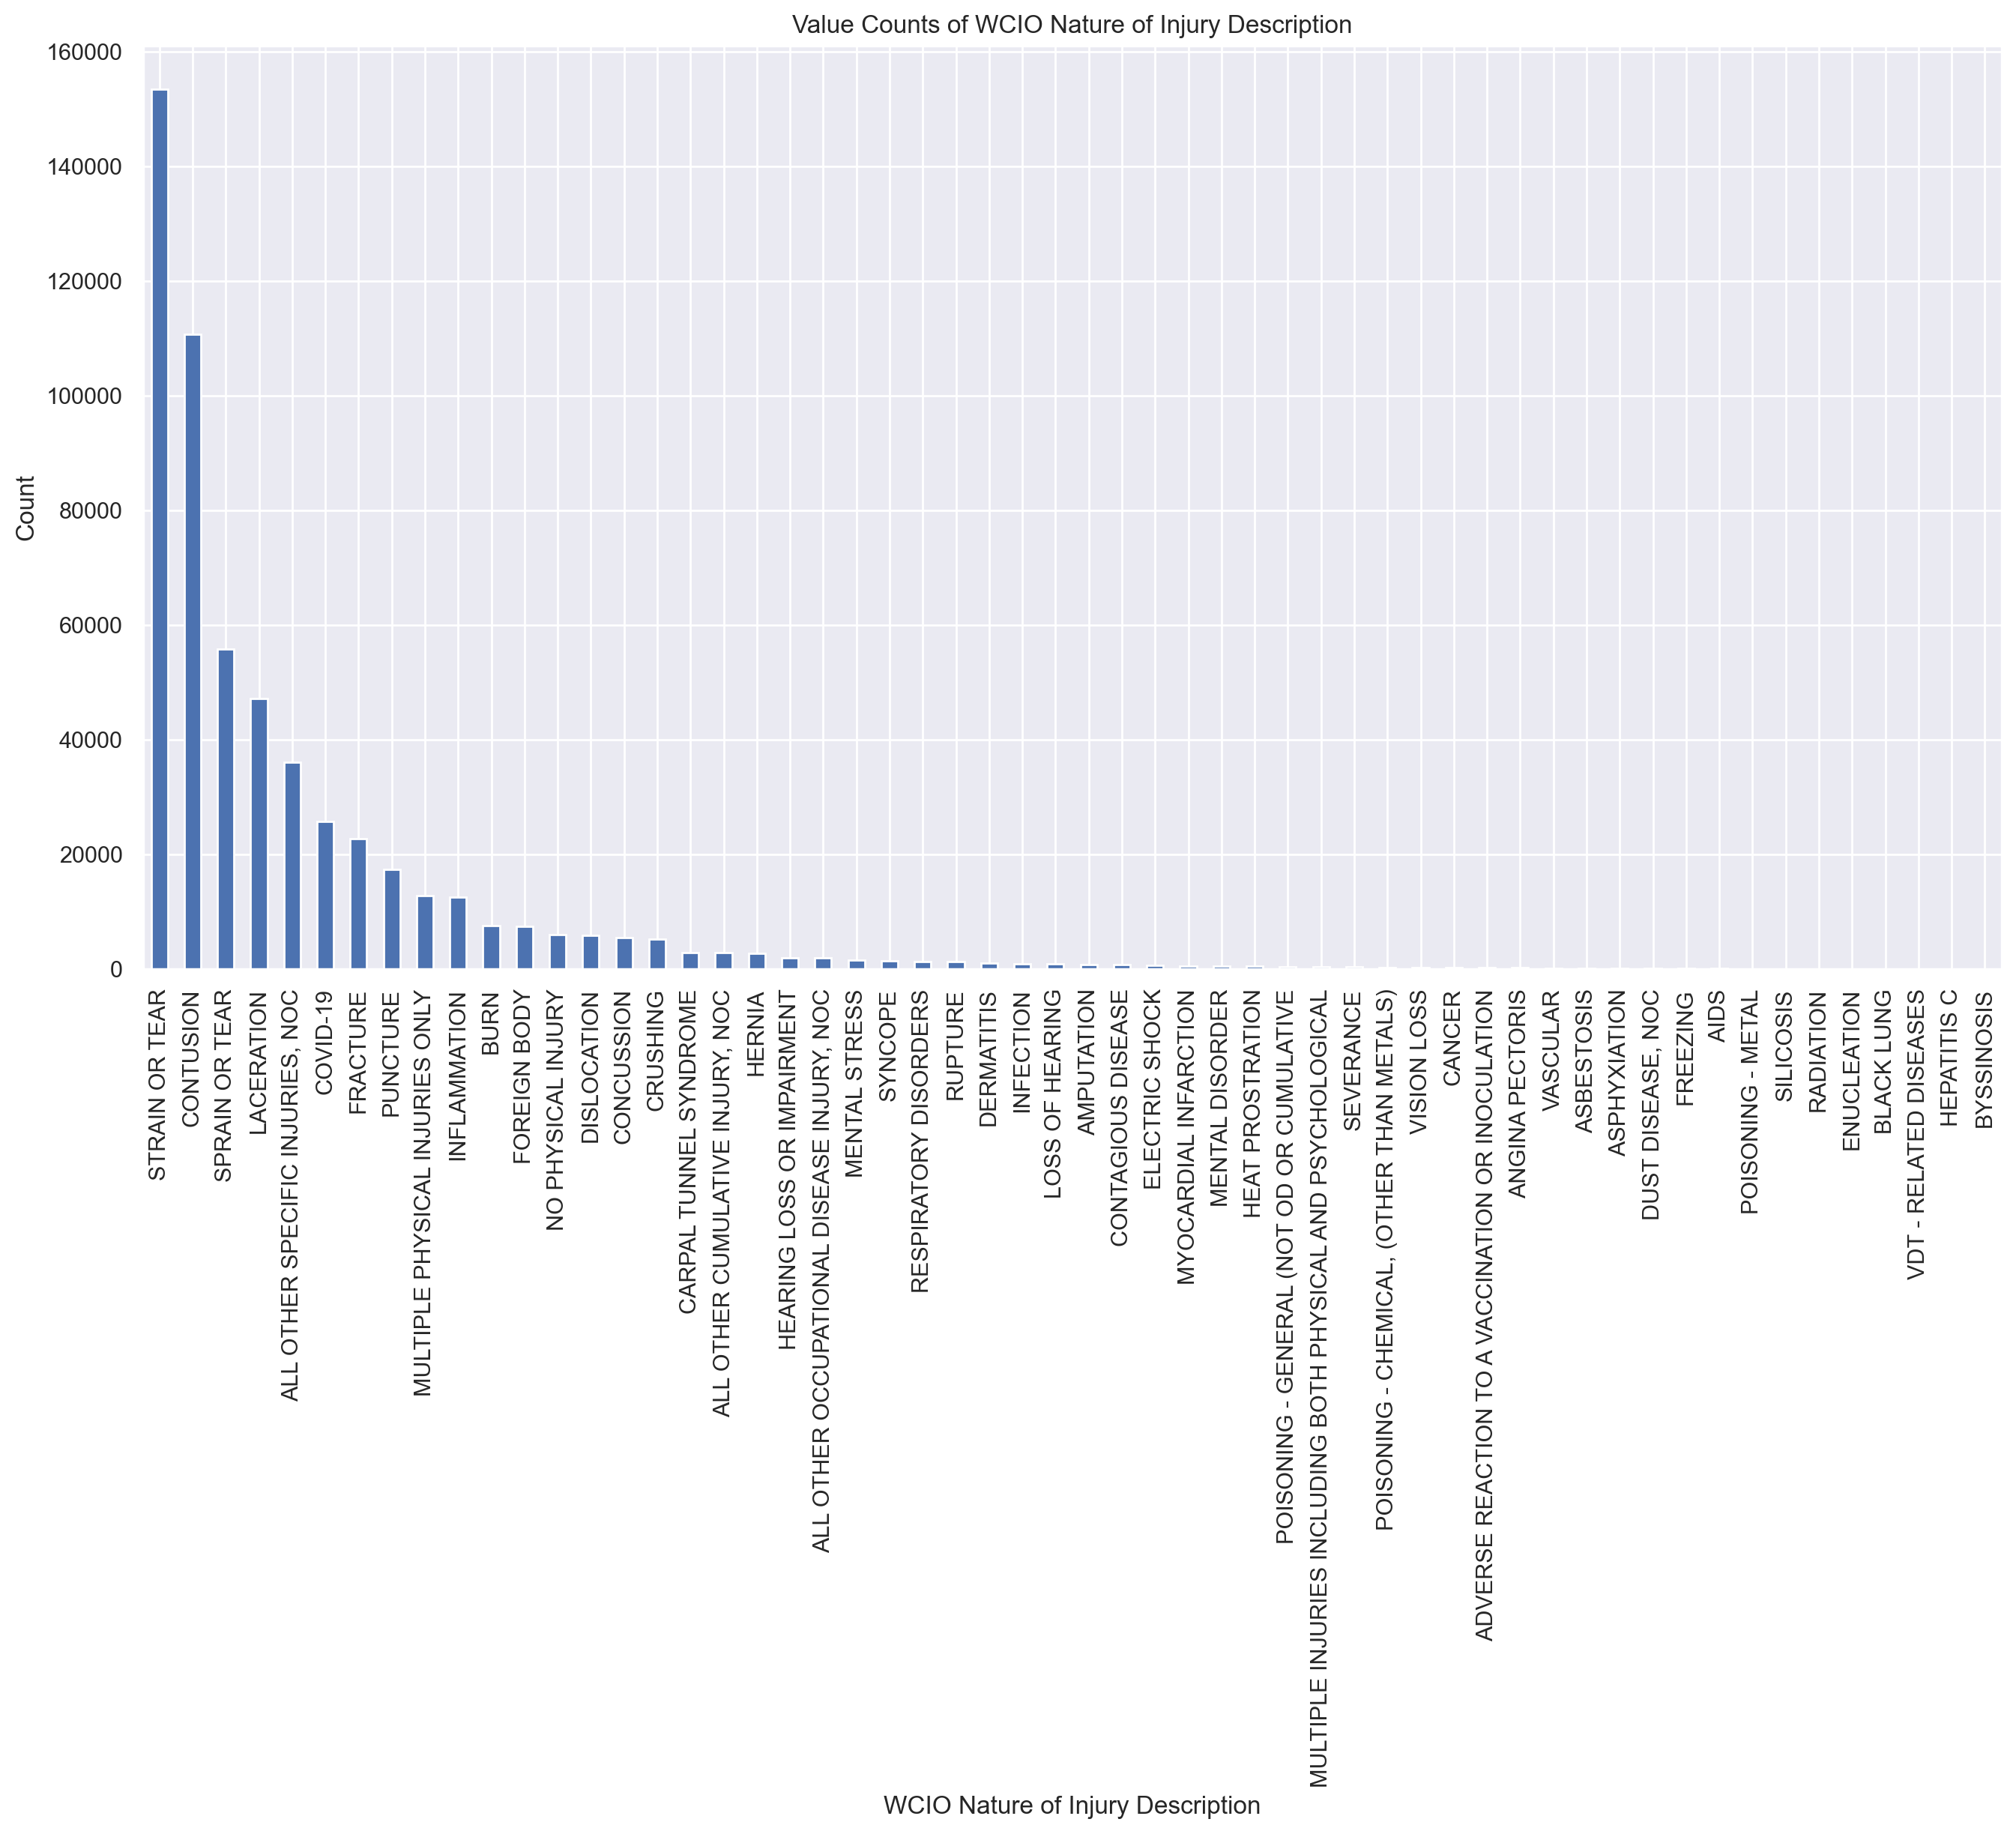

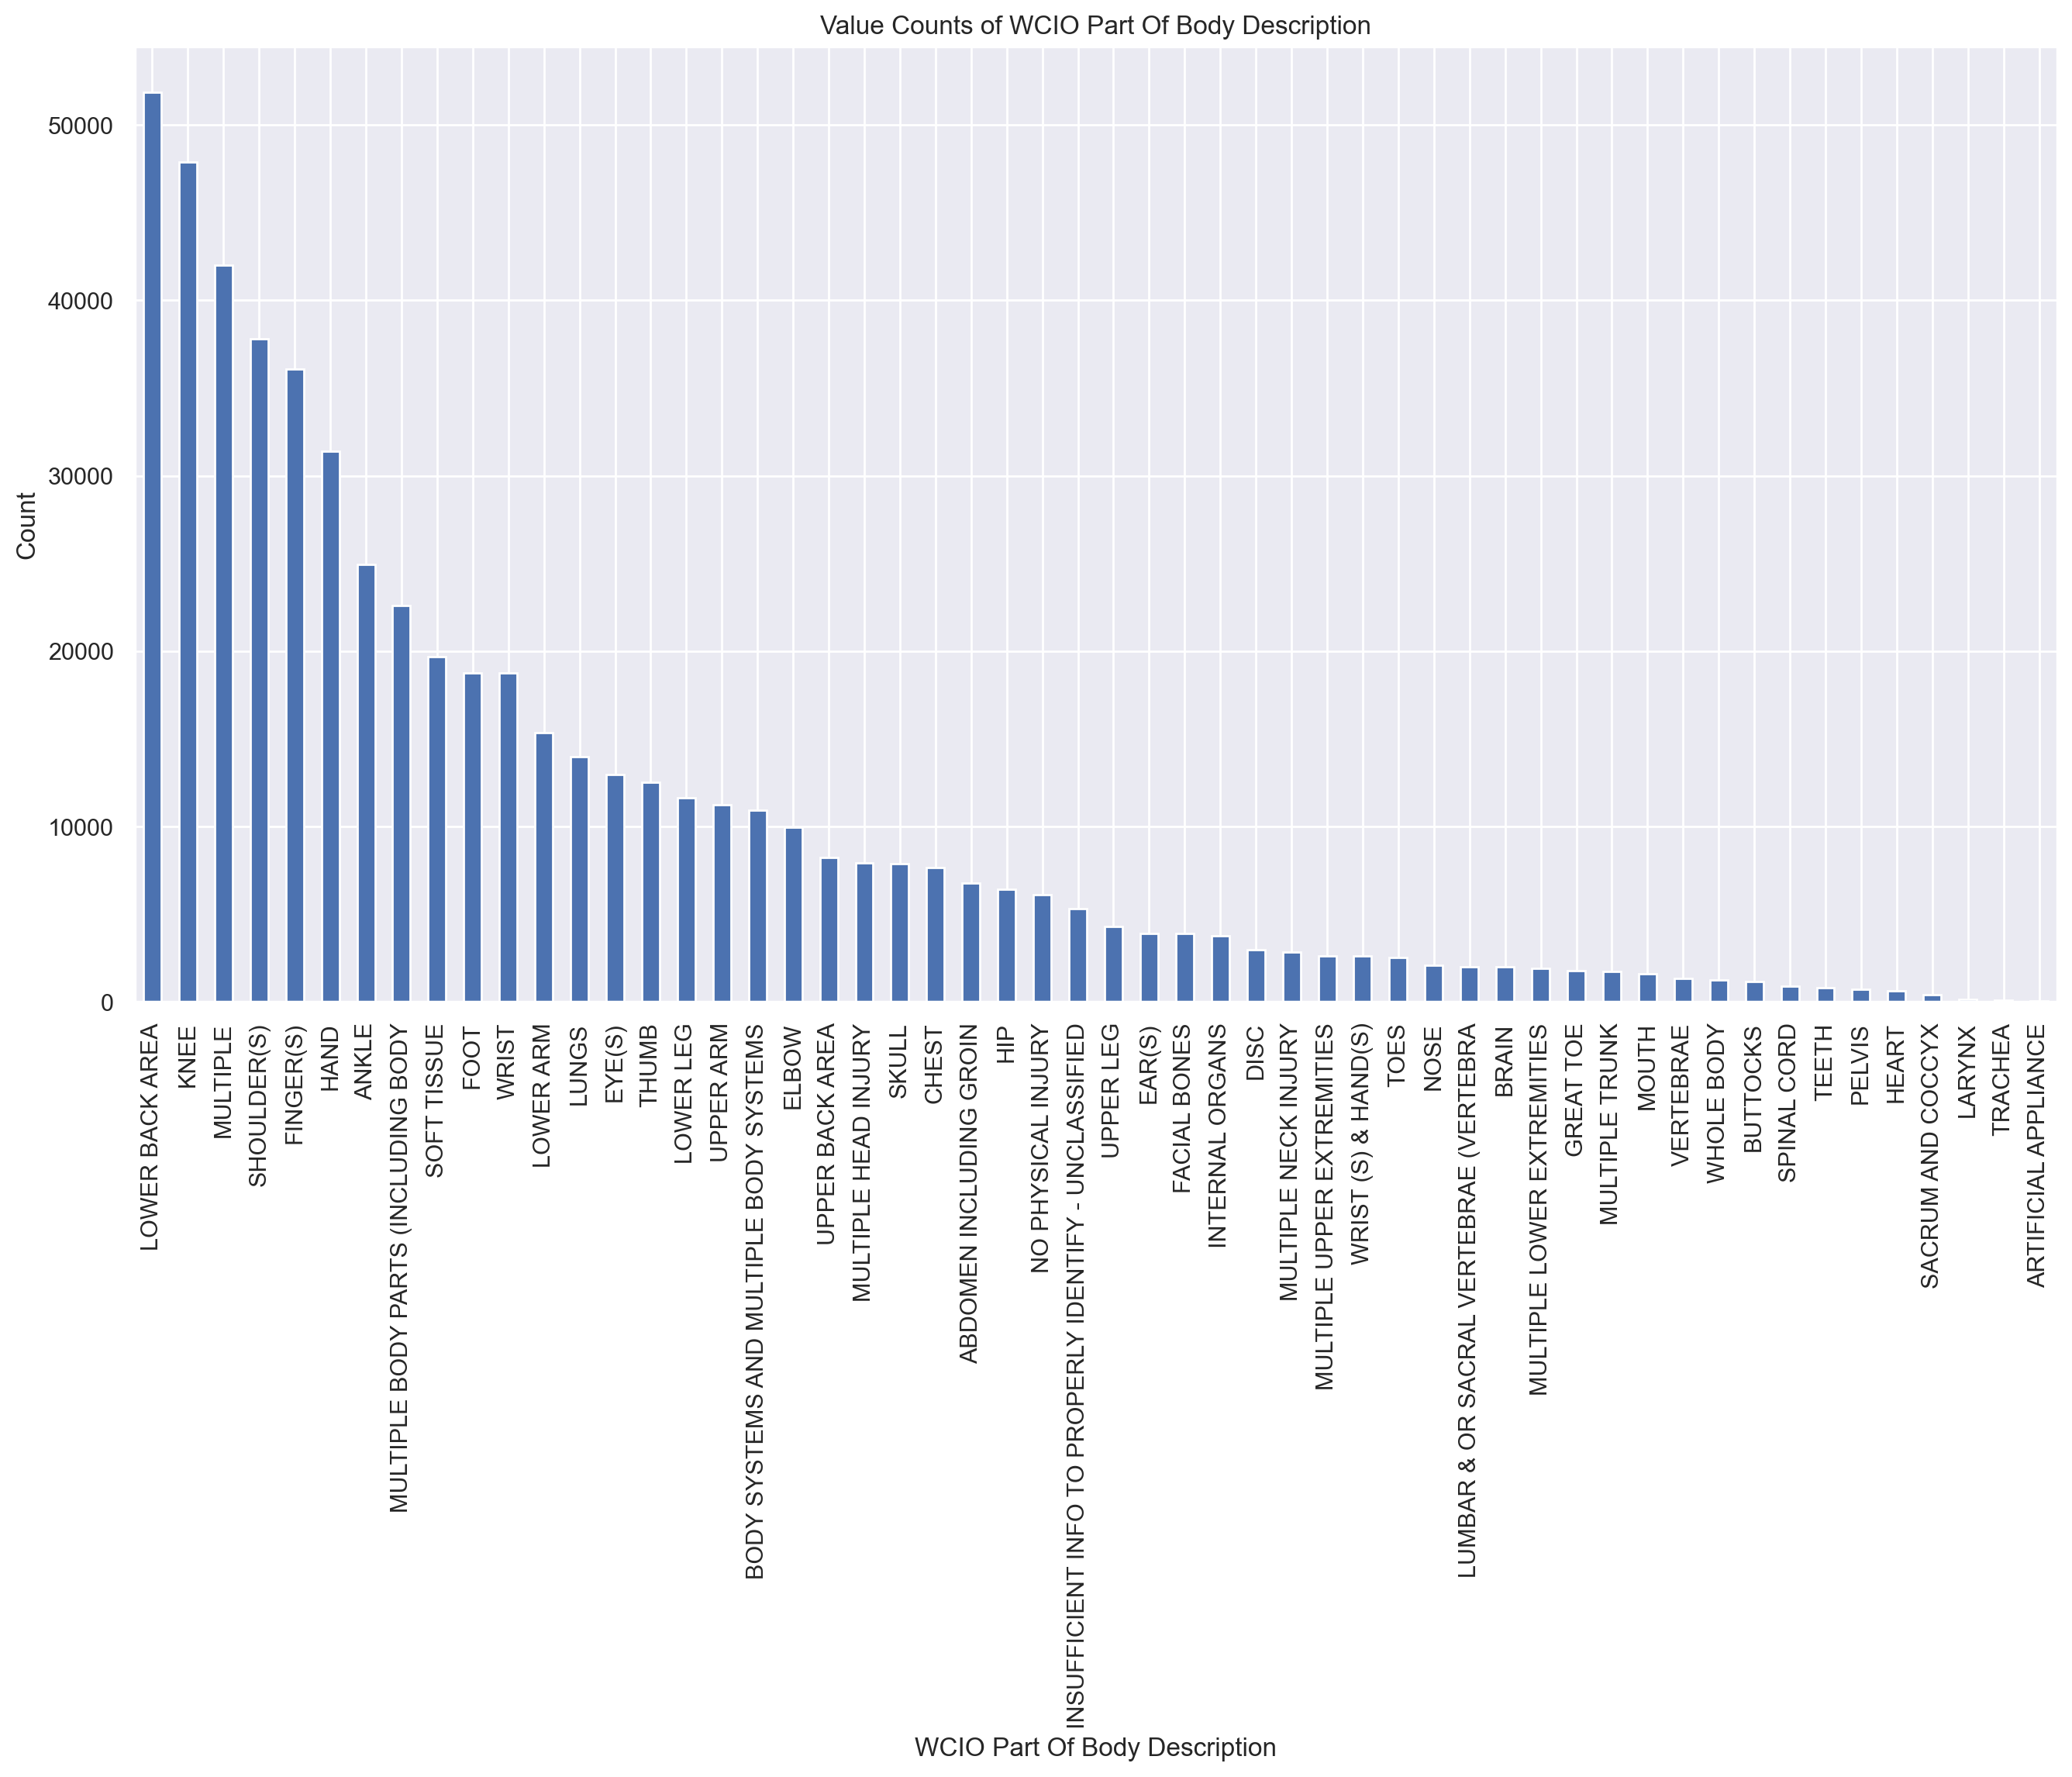

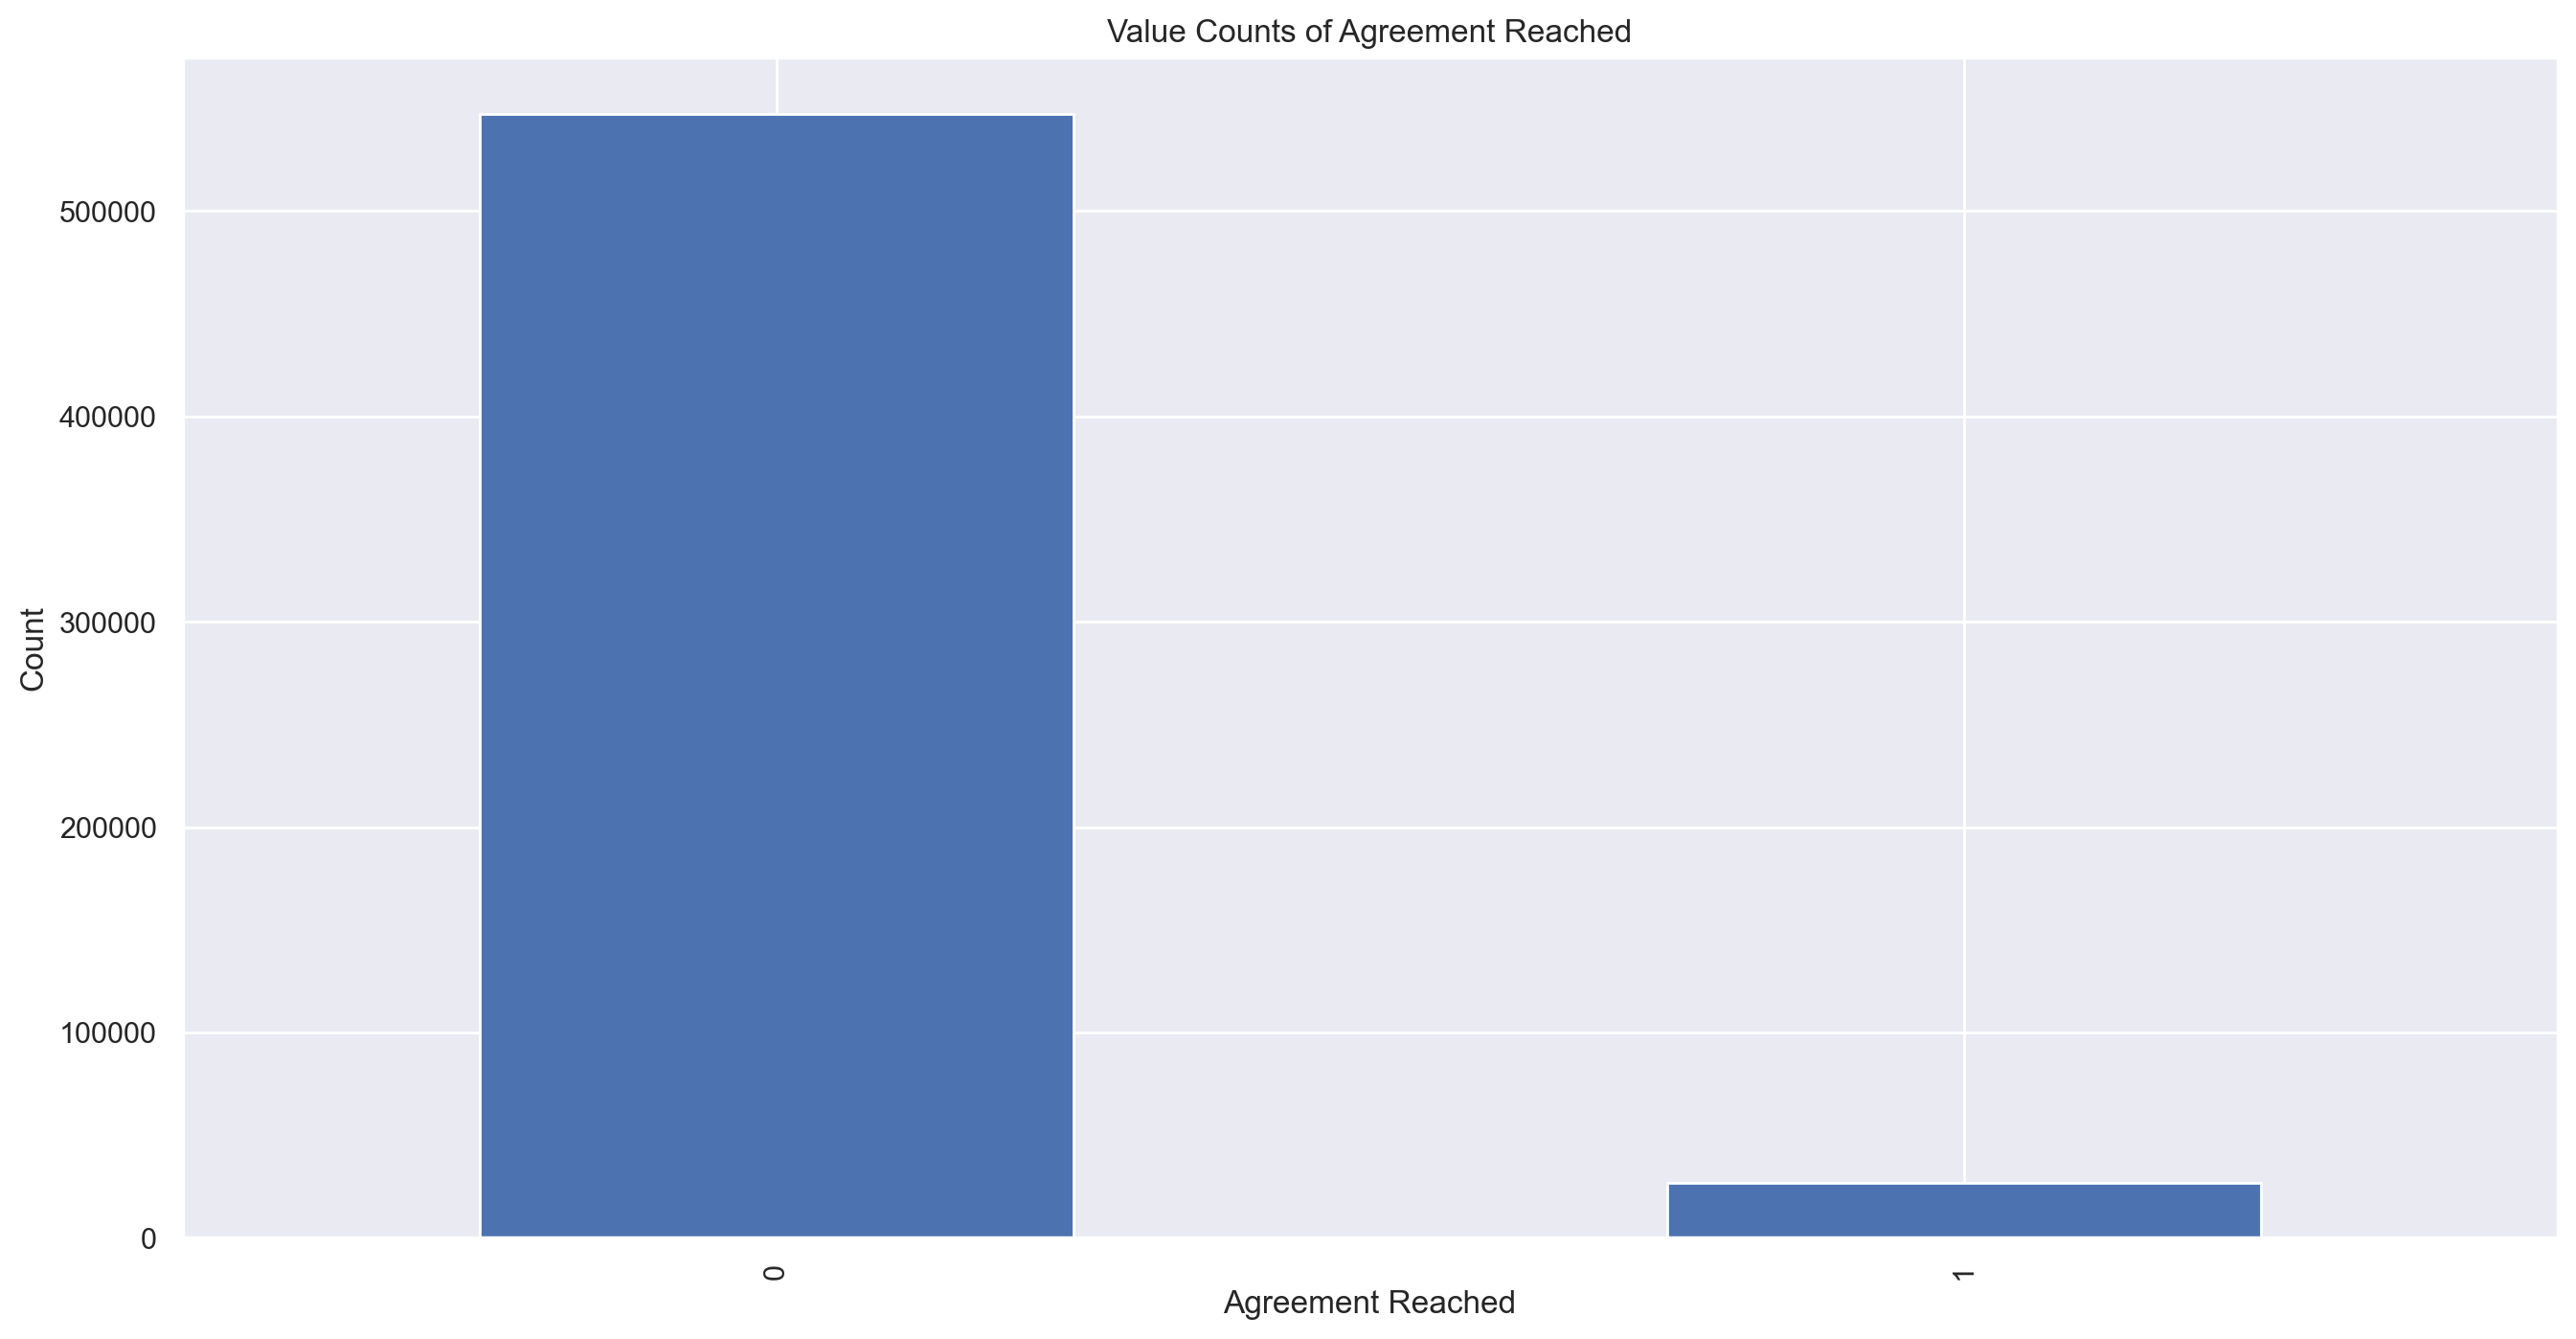

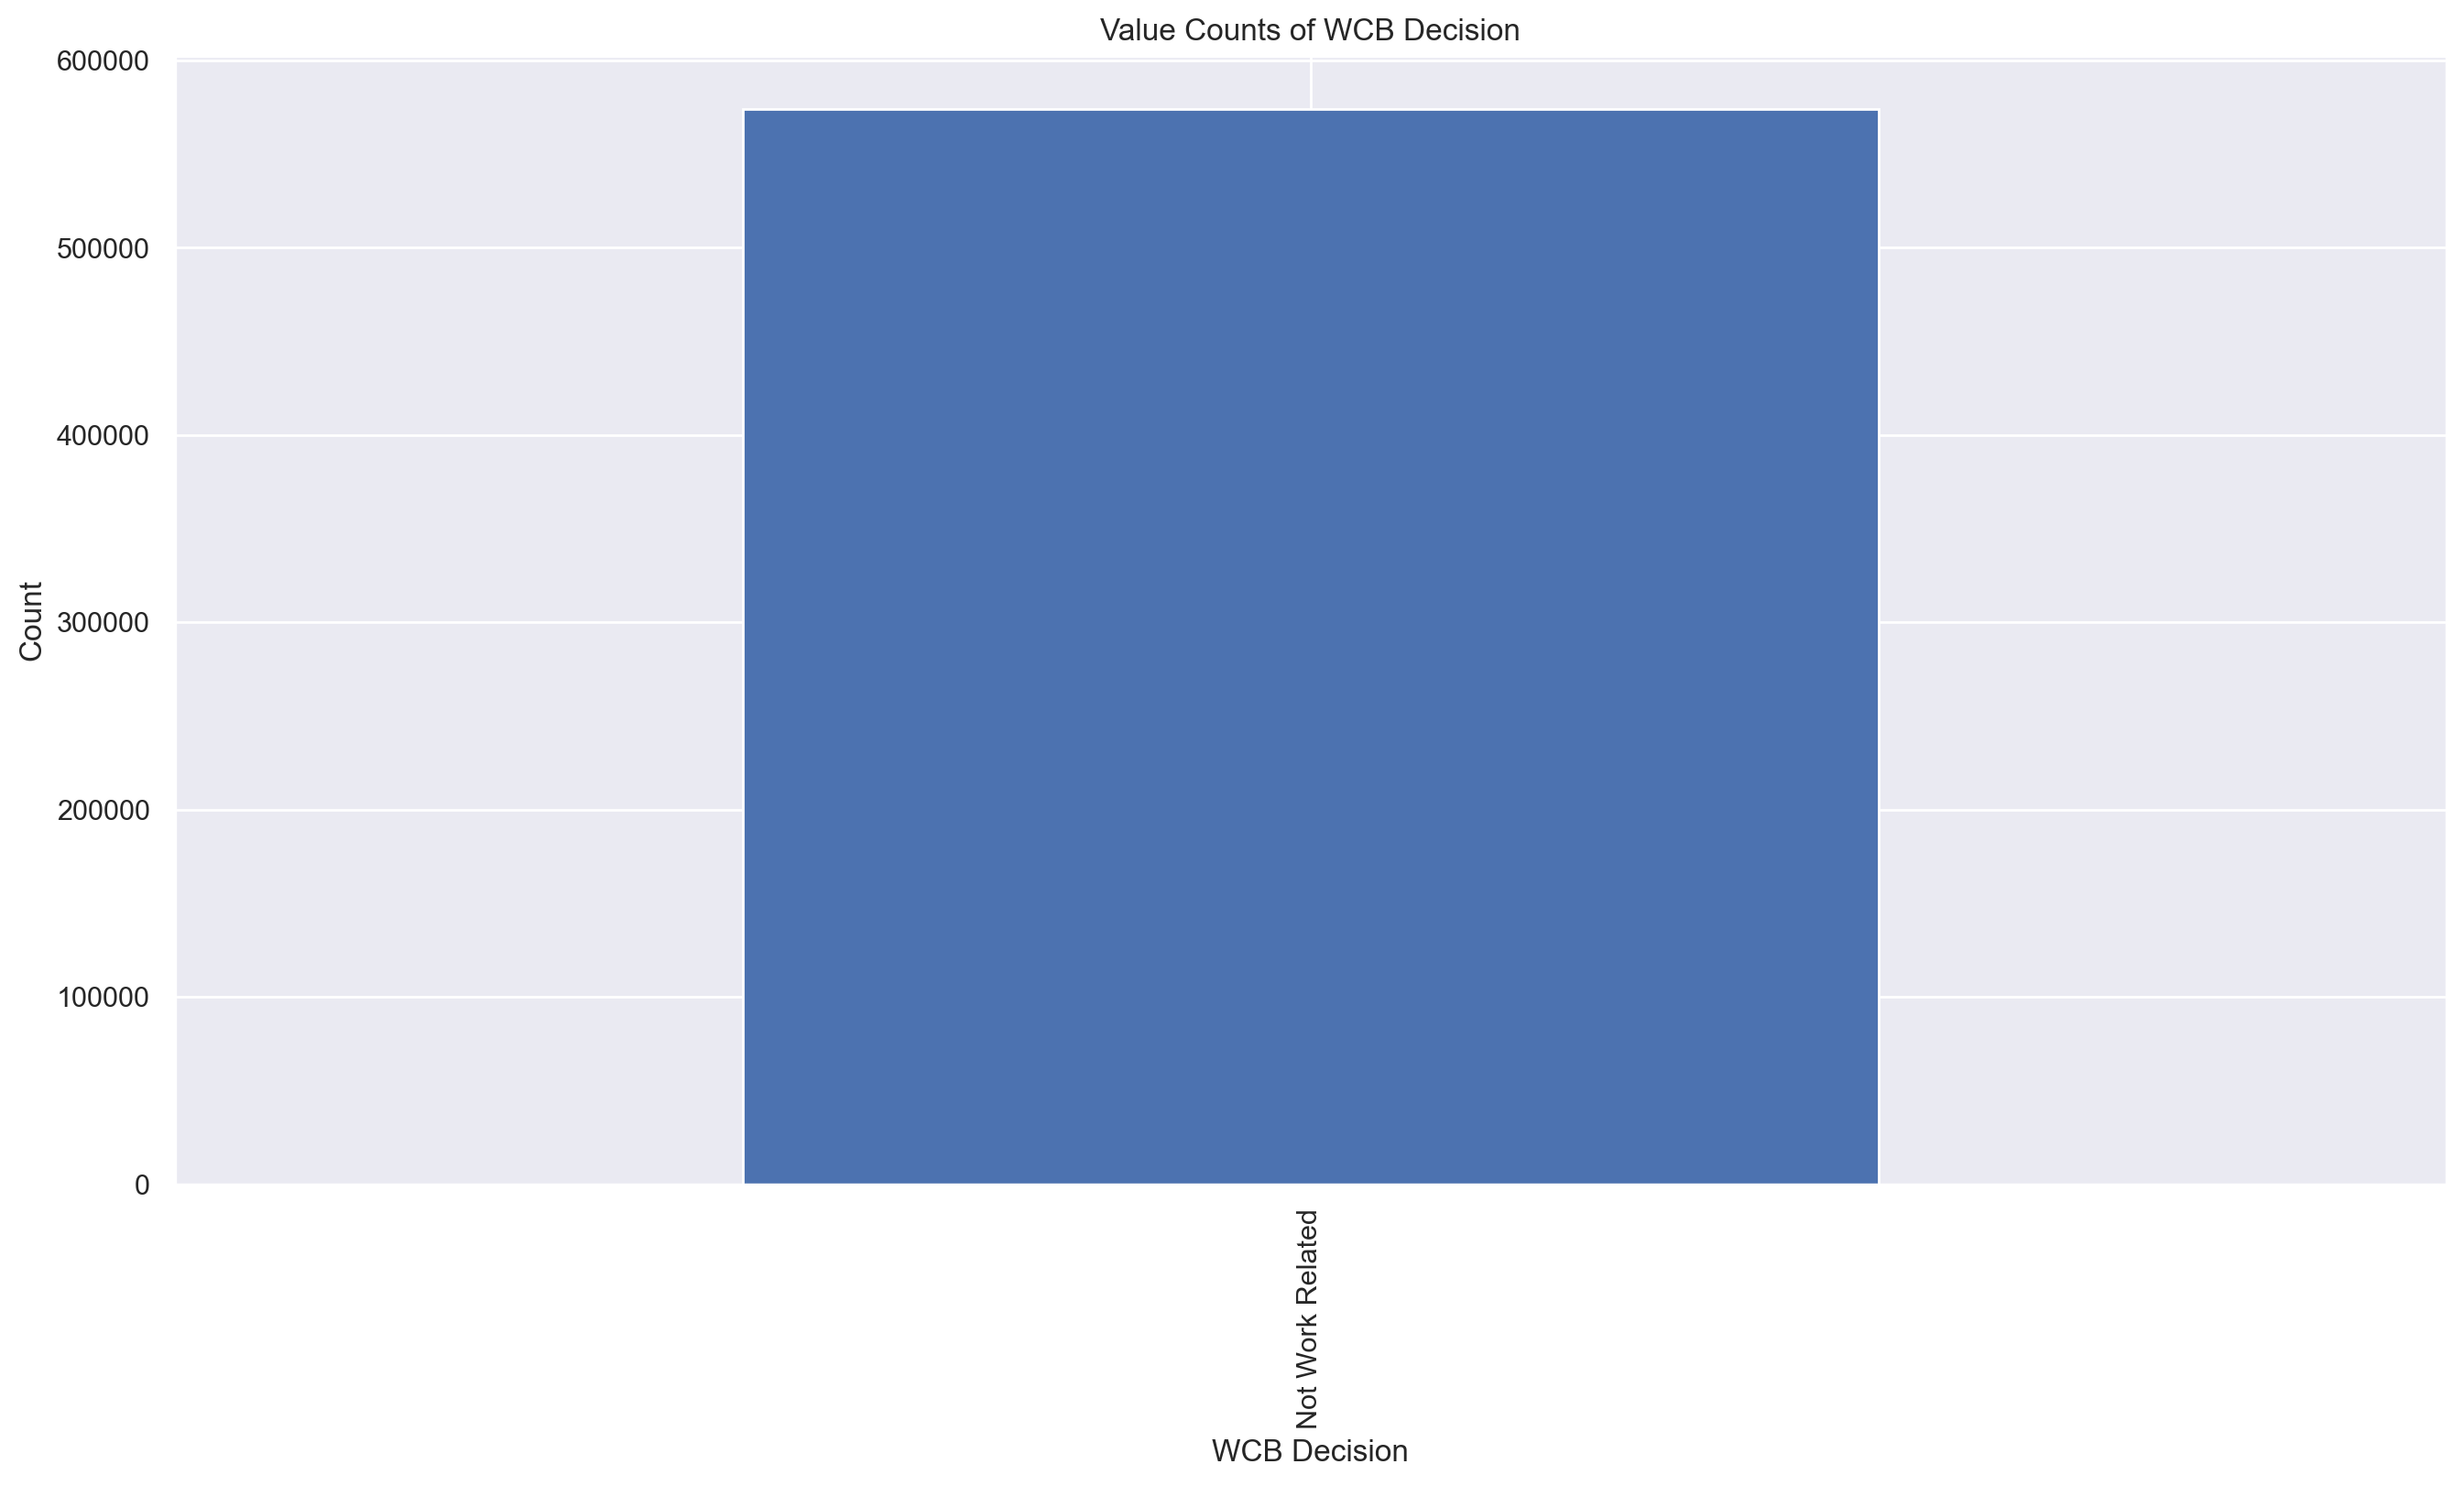

In [47]:
categorical_columns = train_data.loc[:, ['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Type', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Description', 'Agreement Reached',
       'WCB Decision']]

# Filter only categorical columns with non-empty data
valid_categorical_columns = [
    col for col in categorical_columns 
    if train_data[col].notna().any()  # Check if the column has at least one non-NaN value
]

# Plot value counts for each valid categorical column
for col in valid_categorical_columns:
    plt.figure(figsize=(16, 8))
    value_counts = train_data[col].value_counts()

    if not value_counts.empty:  # Check if there are values to plot
        value_counts.plot(kind="bar")
        plt.title(f'Value Counts of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
    else:
        print(f"Skipping column '{col}' as it contains no valid data.")


### We can conclude that:
- there are some missing values that are not represented with nan, and we have to treat them carefully;
- a lot of different values to WCIO Descriptions' features, as well as Industry Code Description were identified - one possible approach to treat this is split the values into similar groups;
- some variables like Covid-19 Indicator can be transformed in a new binary one;
- WCB Decision just has one possible value - Not Work Related, so we cannot gain information throught this variable and we can confidently drop it.

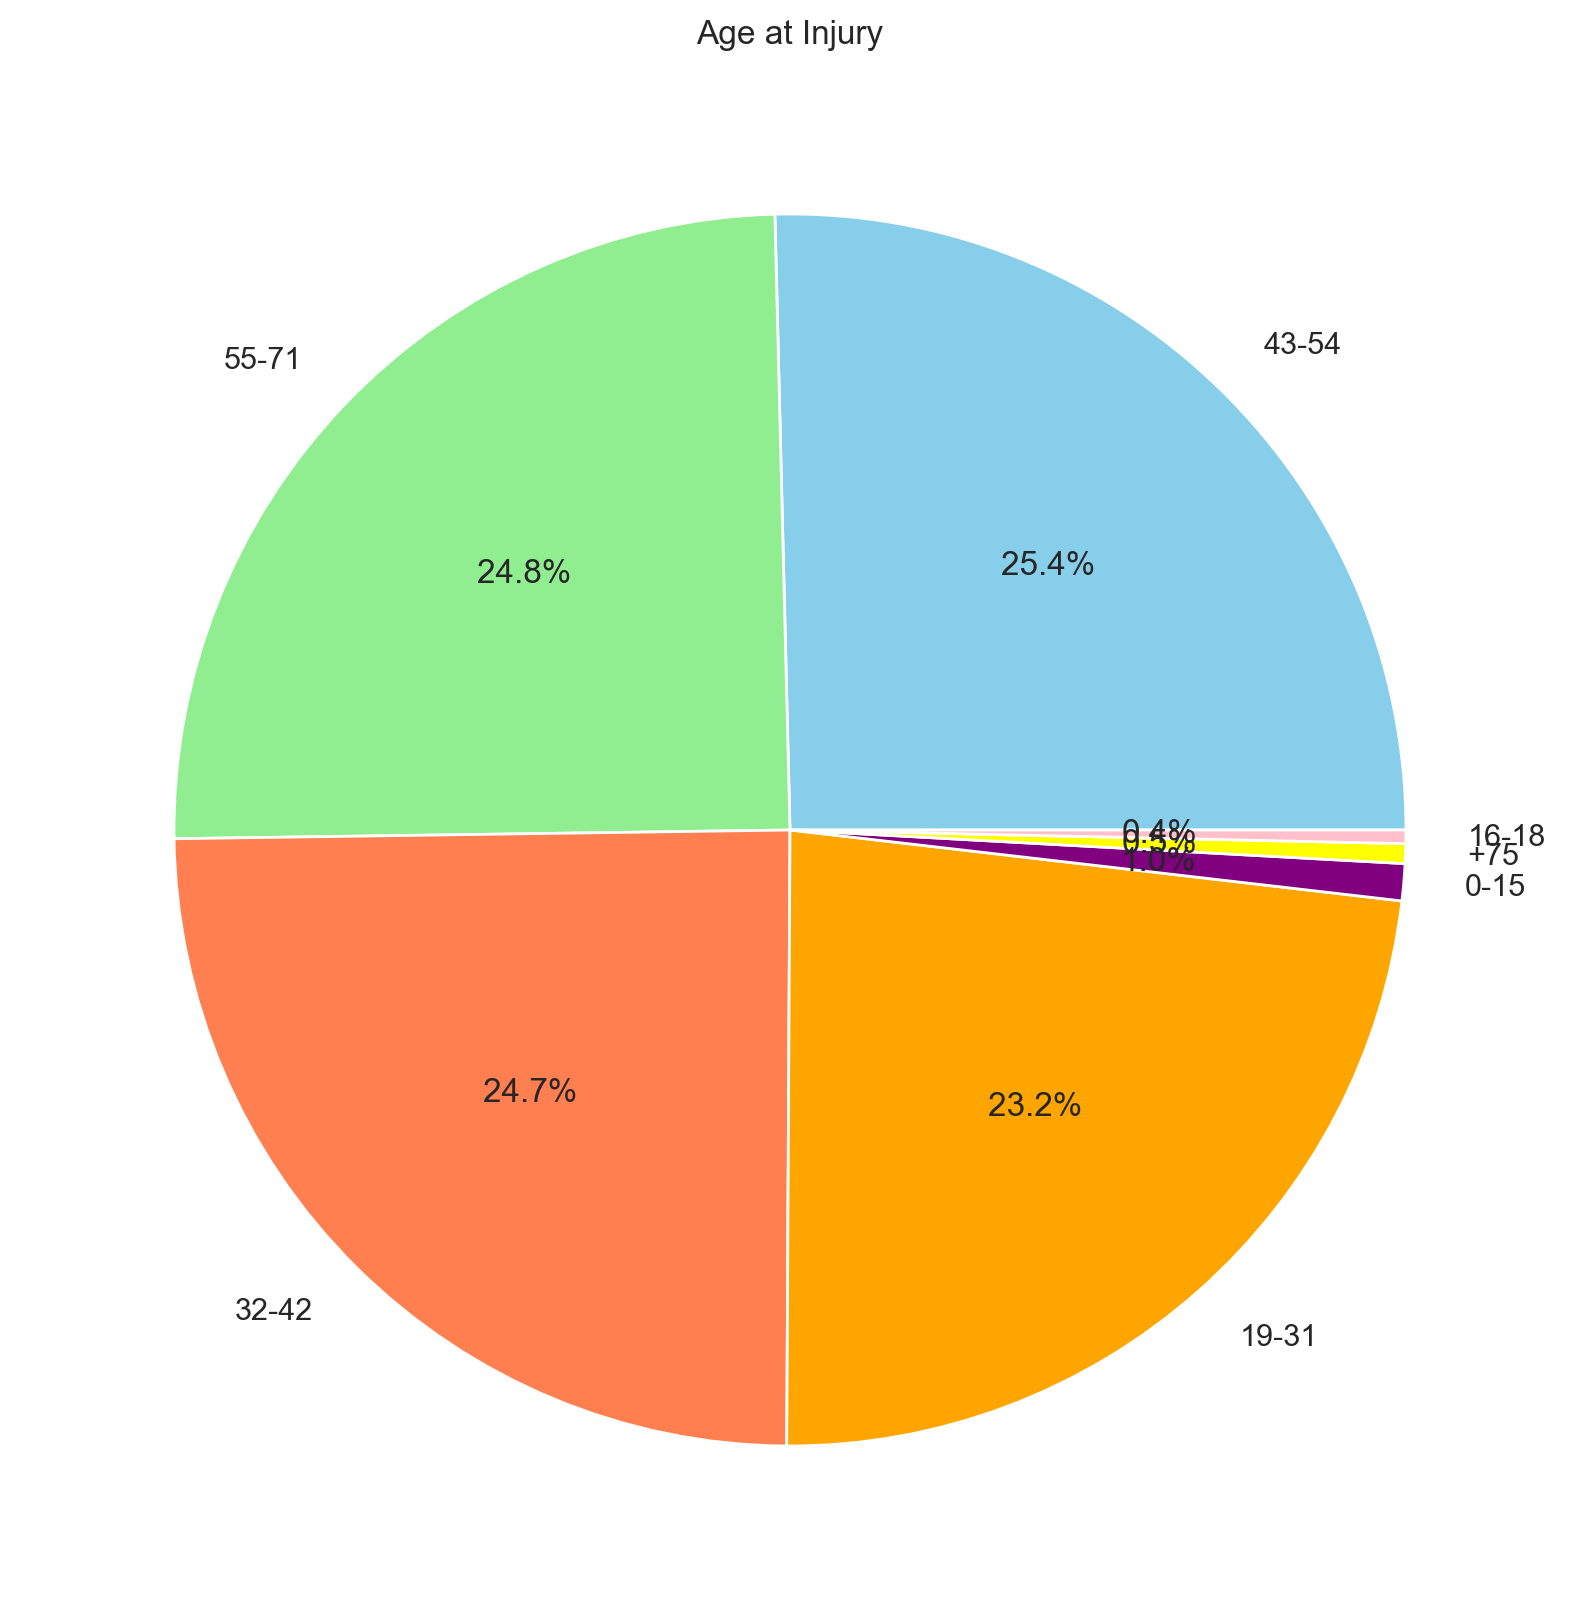

In [49]:
# Define age categories
bins = [0, 15, 18, 31, 42, 54, 75, 117]
labels = ['0-15', '16-18', '19-31', '32-42', '43-54', '55-71', '+75']

# Create a new column for age categories
train_data['Age Category'] = pd.cut(train_data['Age at Injury'], bins=bins, labels=labels, right=False)
age_distribution = train_data['Age Category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(14, 10))  # Set the figure size

age_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'coral', 'orange', 'purple', 'yellow', 'pink'])

# Customize the plot
plt.title('Age at Injury')
plt.ylabel('')  # Remove the default y-label (which shows "Age Category")

# Show the plot
plt.show()

### We can conclude that:
- We have to be careful when implementing a age threshold to guarantee that people who is not supposed to be working because of the age represents 0,5% (more than 75 years) + 1% (less than 15 years)

Correlation Matrix:
                      Age at Injury  Average Weekly Wage  Birth Year  \
Age at Injury                  1.00                 0.02        0.24   
Average Weekly Wage            0.02                 1.00        0.01   
Birth Year                     0.24                 0.01        1.00   
IME-4 Count                    0.13                 0.04        0.04   
Number of Dependents           0.12                 0.00        0.13   

                      IME-4 Count  Number of Dependents  
Age at Injury                0.13                  0.12  
Average Weekly Wage          0.04                  0.00  
Birth Year                   0.04                  0.13  
IME-4 Count                  1.00                  0.02  
Number of Dependents         0.02                  1.00  

Annotations (Filtered by Threshold):
[['1.0' '' '' '' '']
 ['' '1.0' '' '' '']
 ['' '' '1.0' '' '']
 ['' '' '' '1.0' '']
 ['' '' '' '' '1.0']]


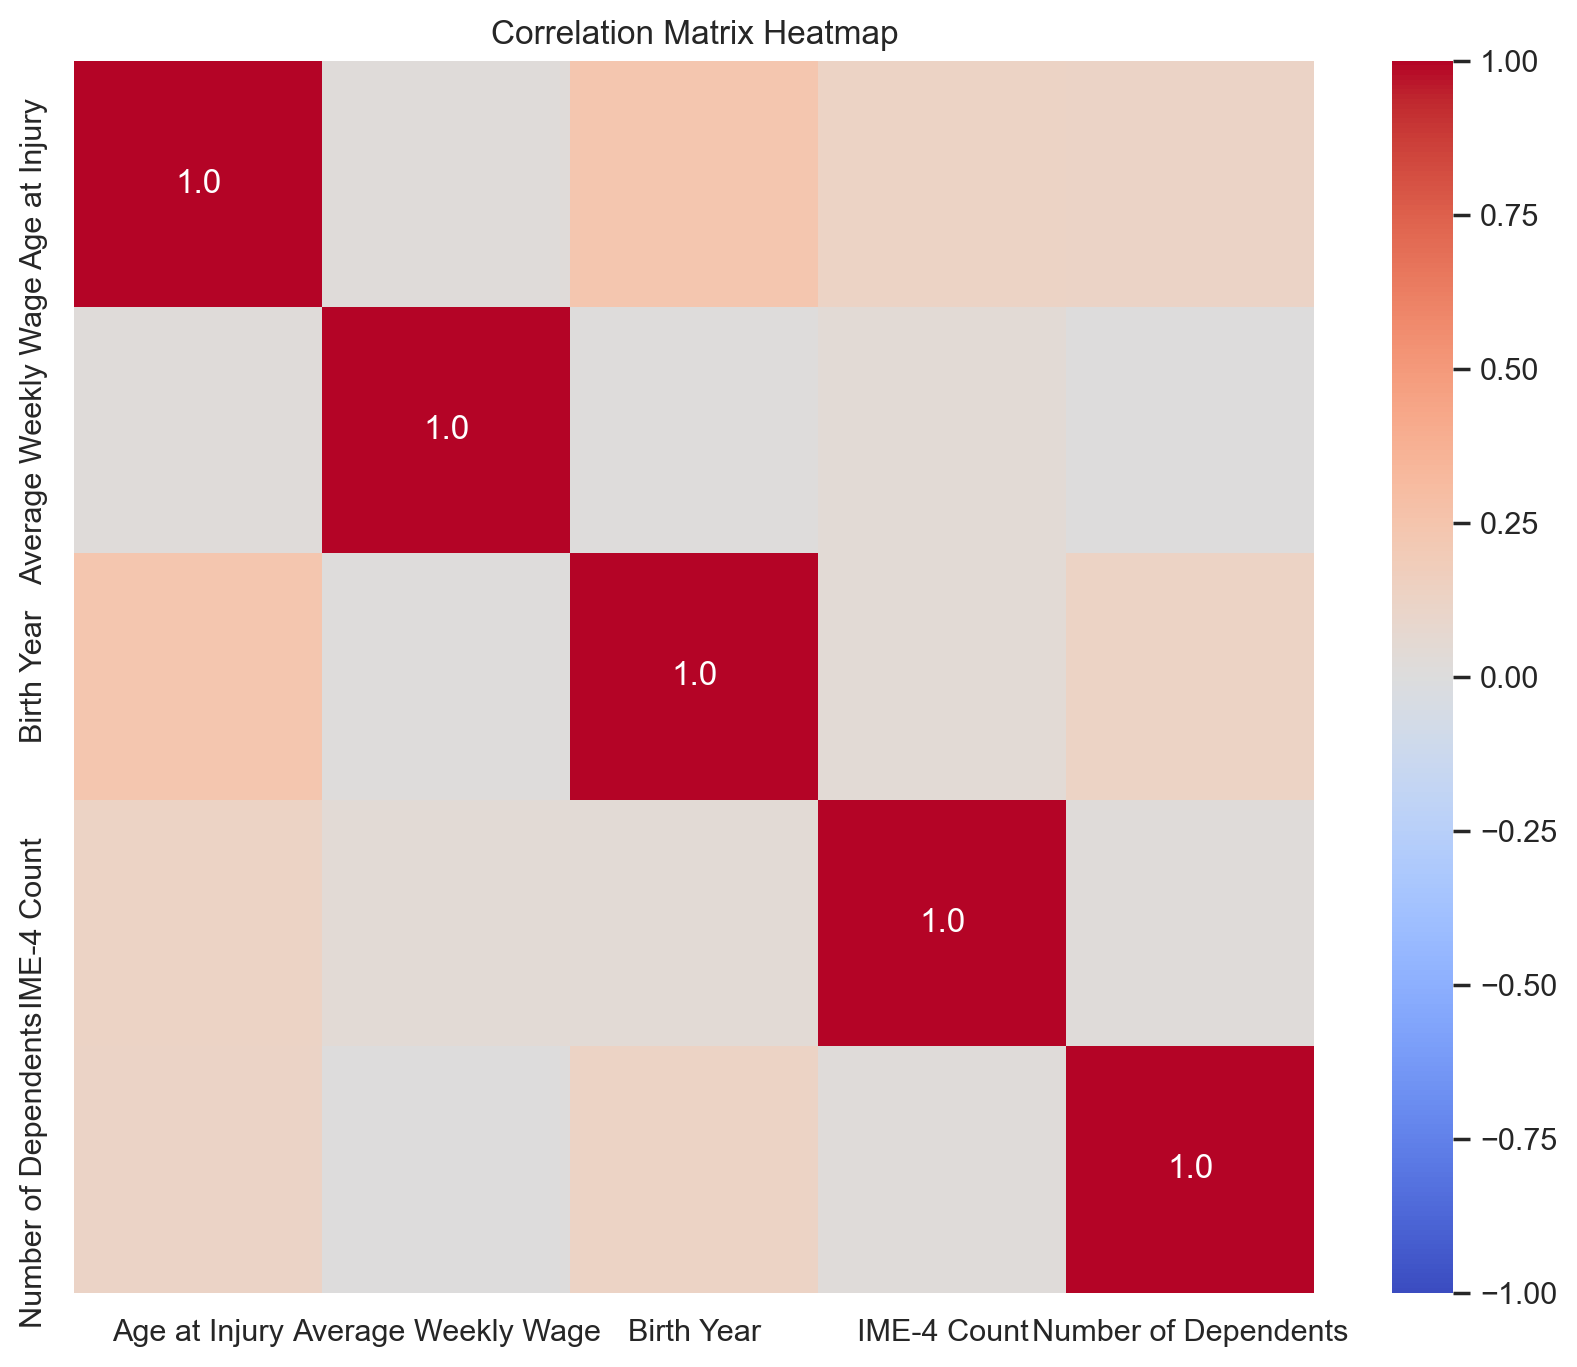

In [95]:
# Ensure numeric_attributes is defined as the list of numeric columns
# Replace with the actual numeric attributes of your dataset
numeric_attributes = train_data.select_dtypes(include=["number"]).columns.tolist()

# Handle missing values in numeric columns
# Replace NaN or None with a default value (e.g., 0)
train_data[numeric_attributes] = train_data[numeric_attributes].fillna(0)

# Calculate the Pearson correlation matrix and round to 2 decimals
# Ensuring no type mismatch during correlation calculations
corr = train_data[numeric_attributes].corr(method="pearson").round(2)

# Create a mask to identify correlation values above a threshold
# This creates a boolean mask for correlations >= 0.45
mask_annot = np.absolute(corr.values) >= 0.45

# Use the mask to selectively annotate the correlation matrix
# Apply the mask to the correlation values, otherwise use an empty string
annot = np.where(mask_annot, corr.values, np.full(corr.shape, ""))

# Optionally print or save the resulting correlation matrix and annotations
print("Correlation Matrix:")
print(corr)

print("\nAnnotations (Filtered by Threshold):")
print(annot)

#Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=annot,
    fmt="",  # Empty strings are properly displayed
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    cbar=True,
)
plt.title("Correlation Matrix Heatmap")
plt.show()

### We can conclude that:
- There is no serial correlation.

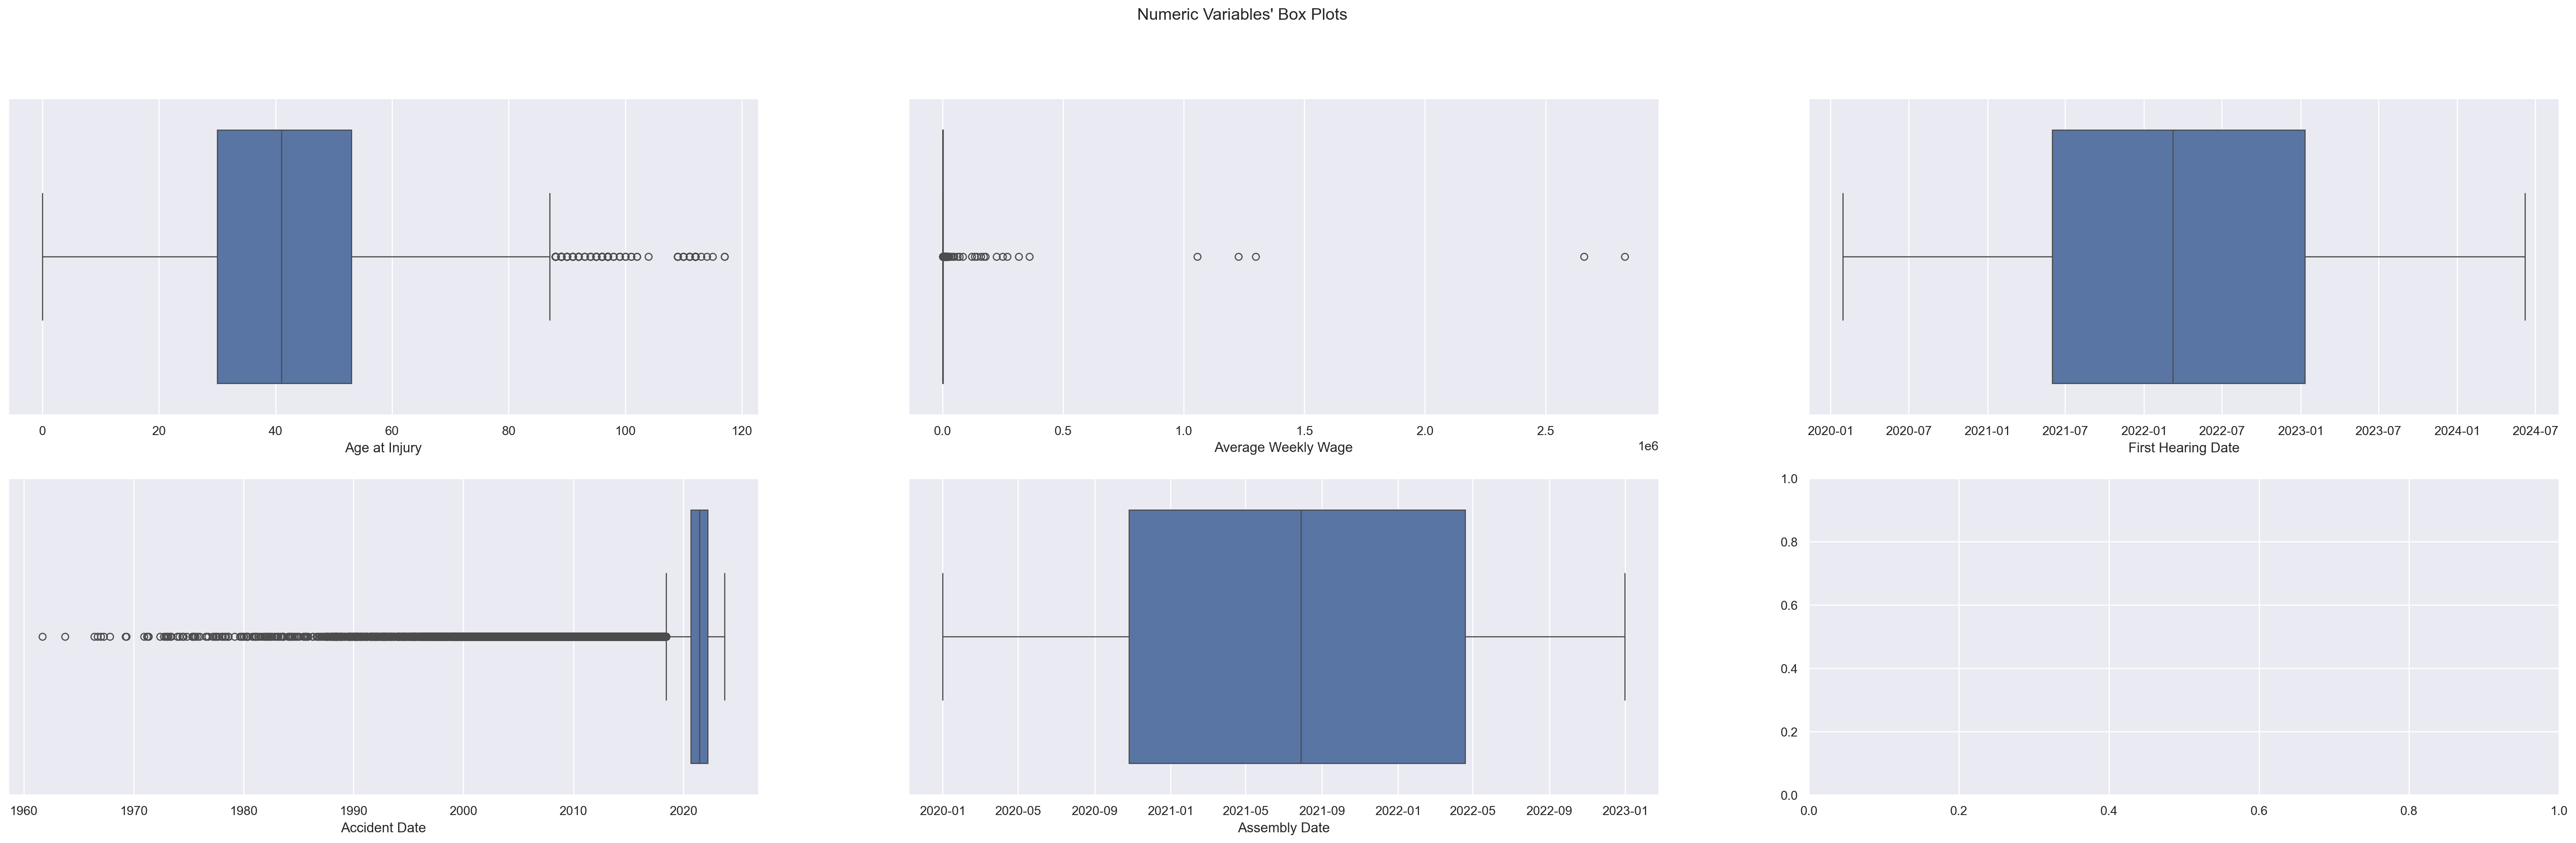

In [98]:
box_plot_features = ['Age at Injury', 'Average Weekly Wage', 'First Hearing Date', 'Accident Date', 'Assembly Date']


sns.set()
fig, axes = plt.subplots(2, ceil(len(box_plot_features) / 2), figsize=(40, 11))
for ax, feat in zip(axes.flatten(), box_plot_features):
    sns.boxplot(x=train_data[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

### We can conclude that:
- Only First Hearing Date and Assembly Date have no outliers;
- Despite of the outliers, in Age at Injury we have also to treat ages lower than 15;
- Average Weekly Wage has a lot of zero values, which does not make sense;
- Accident Date has also a lot of missing values, but its distribution, as expected, is after 2020.

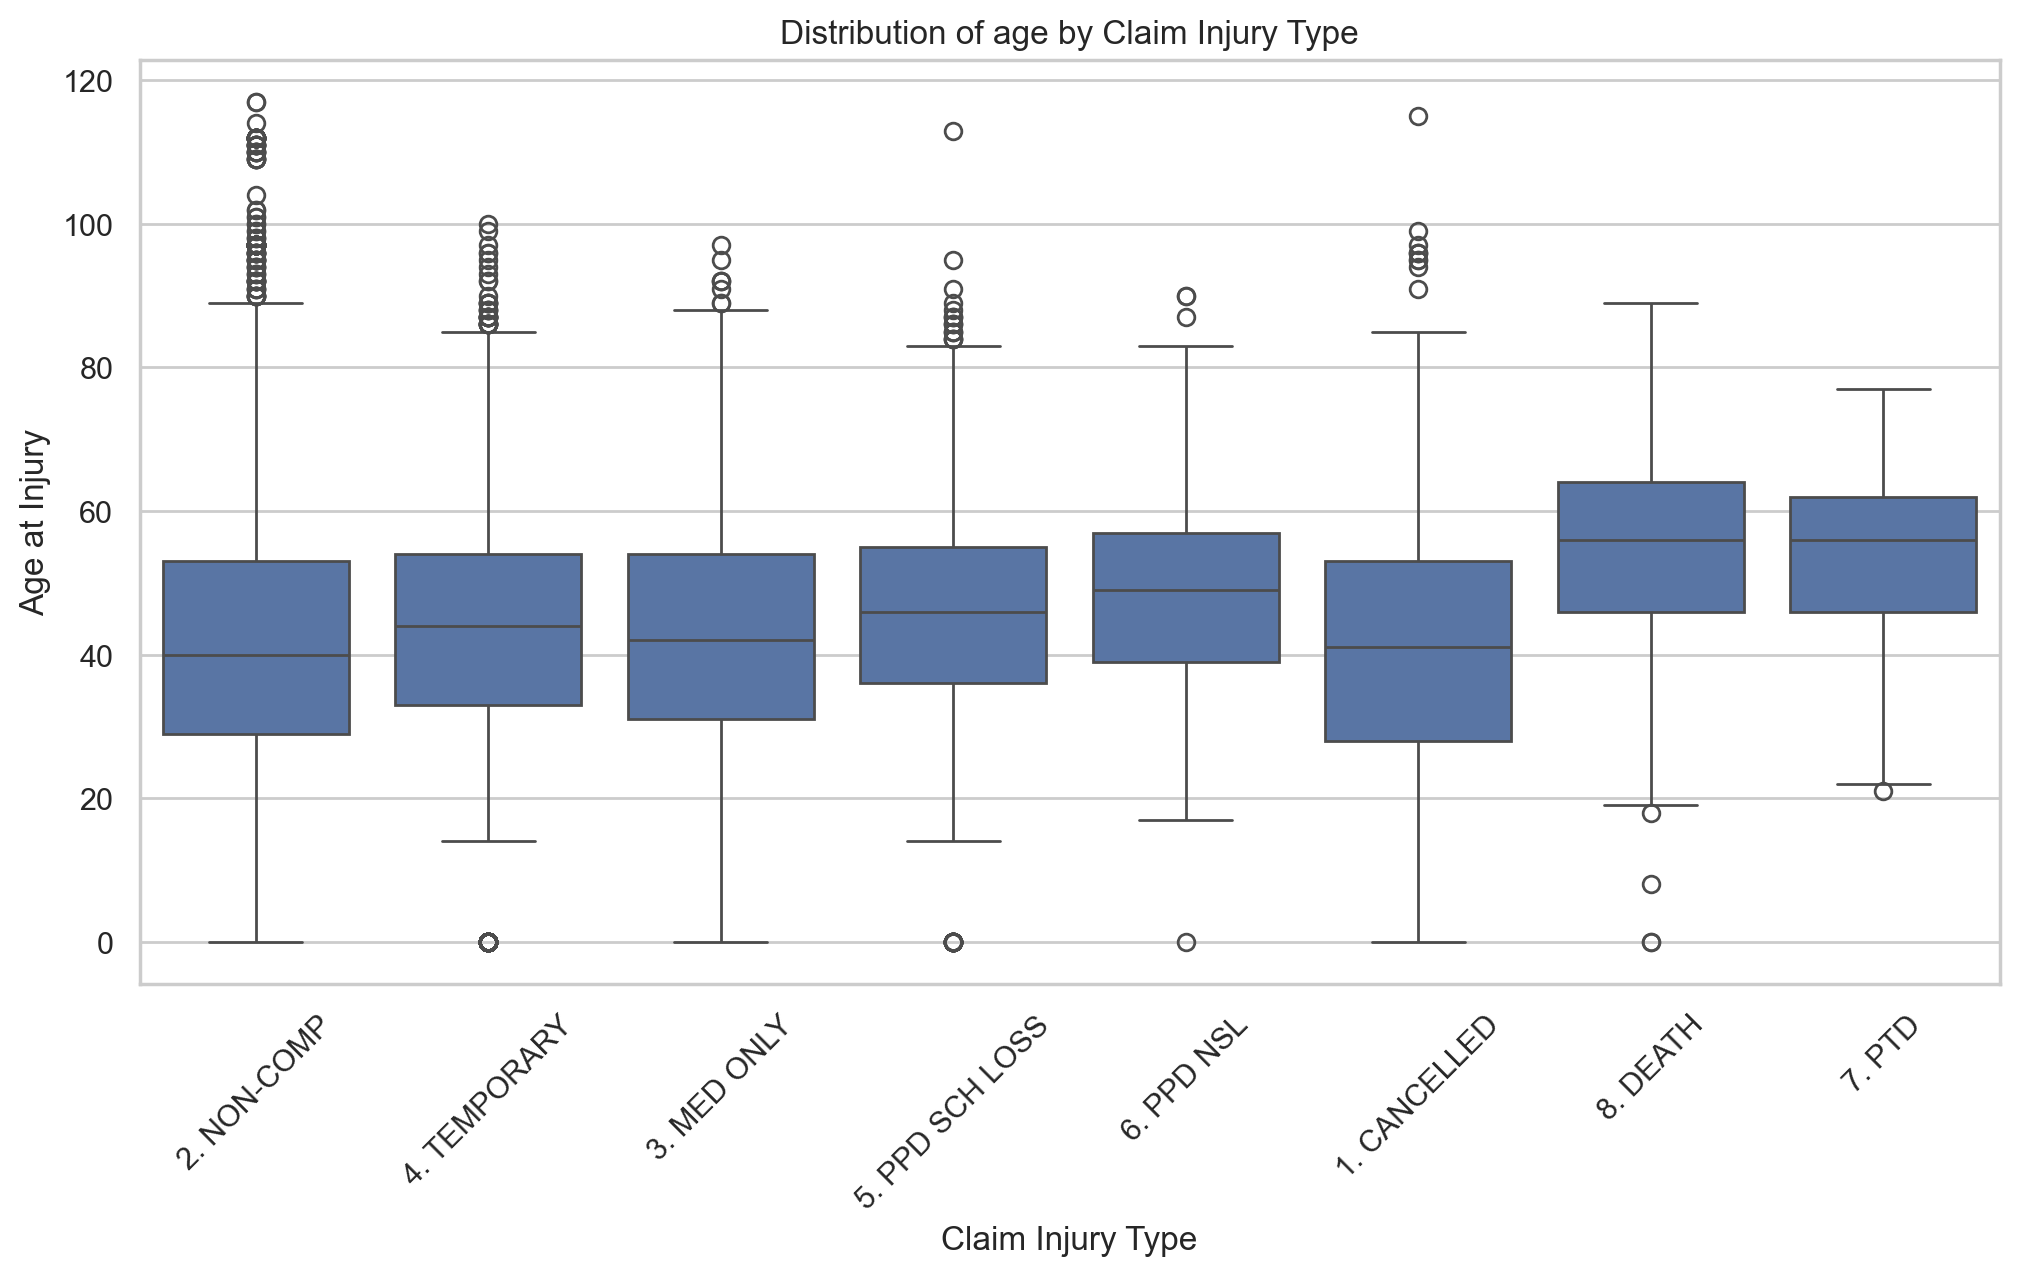

In [70]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.boxplot(x='Claim Injury Type', y='Age at Injury', data=train_data)

plt.xlabel('Claim Injury Type')
plt.ylabel('Age at Injury')
plt.title('Distribution of age by Claim Injury Type')
plt.xticks(rotation=45)  

plt.show()

### We can conclude that:
- Despite we found different distributions, every Claim Injury Type has outliers.

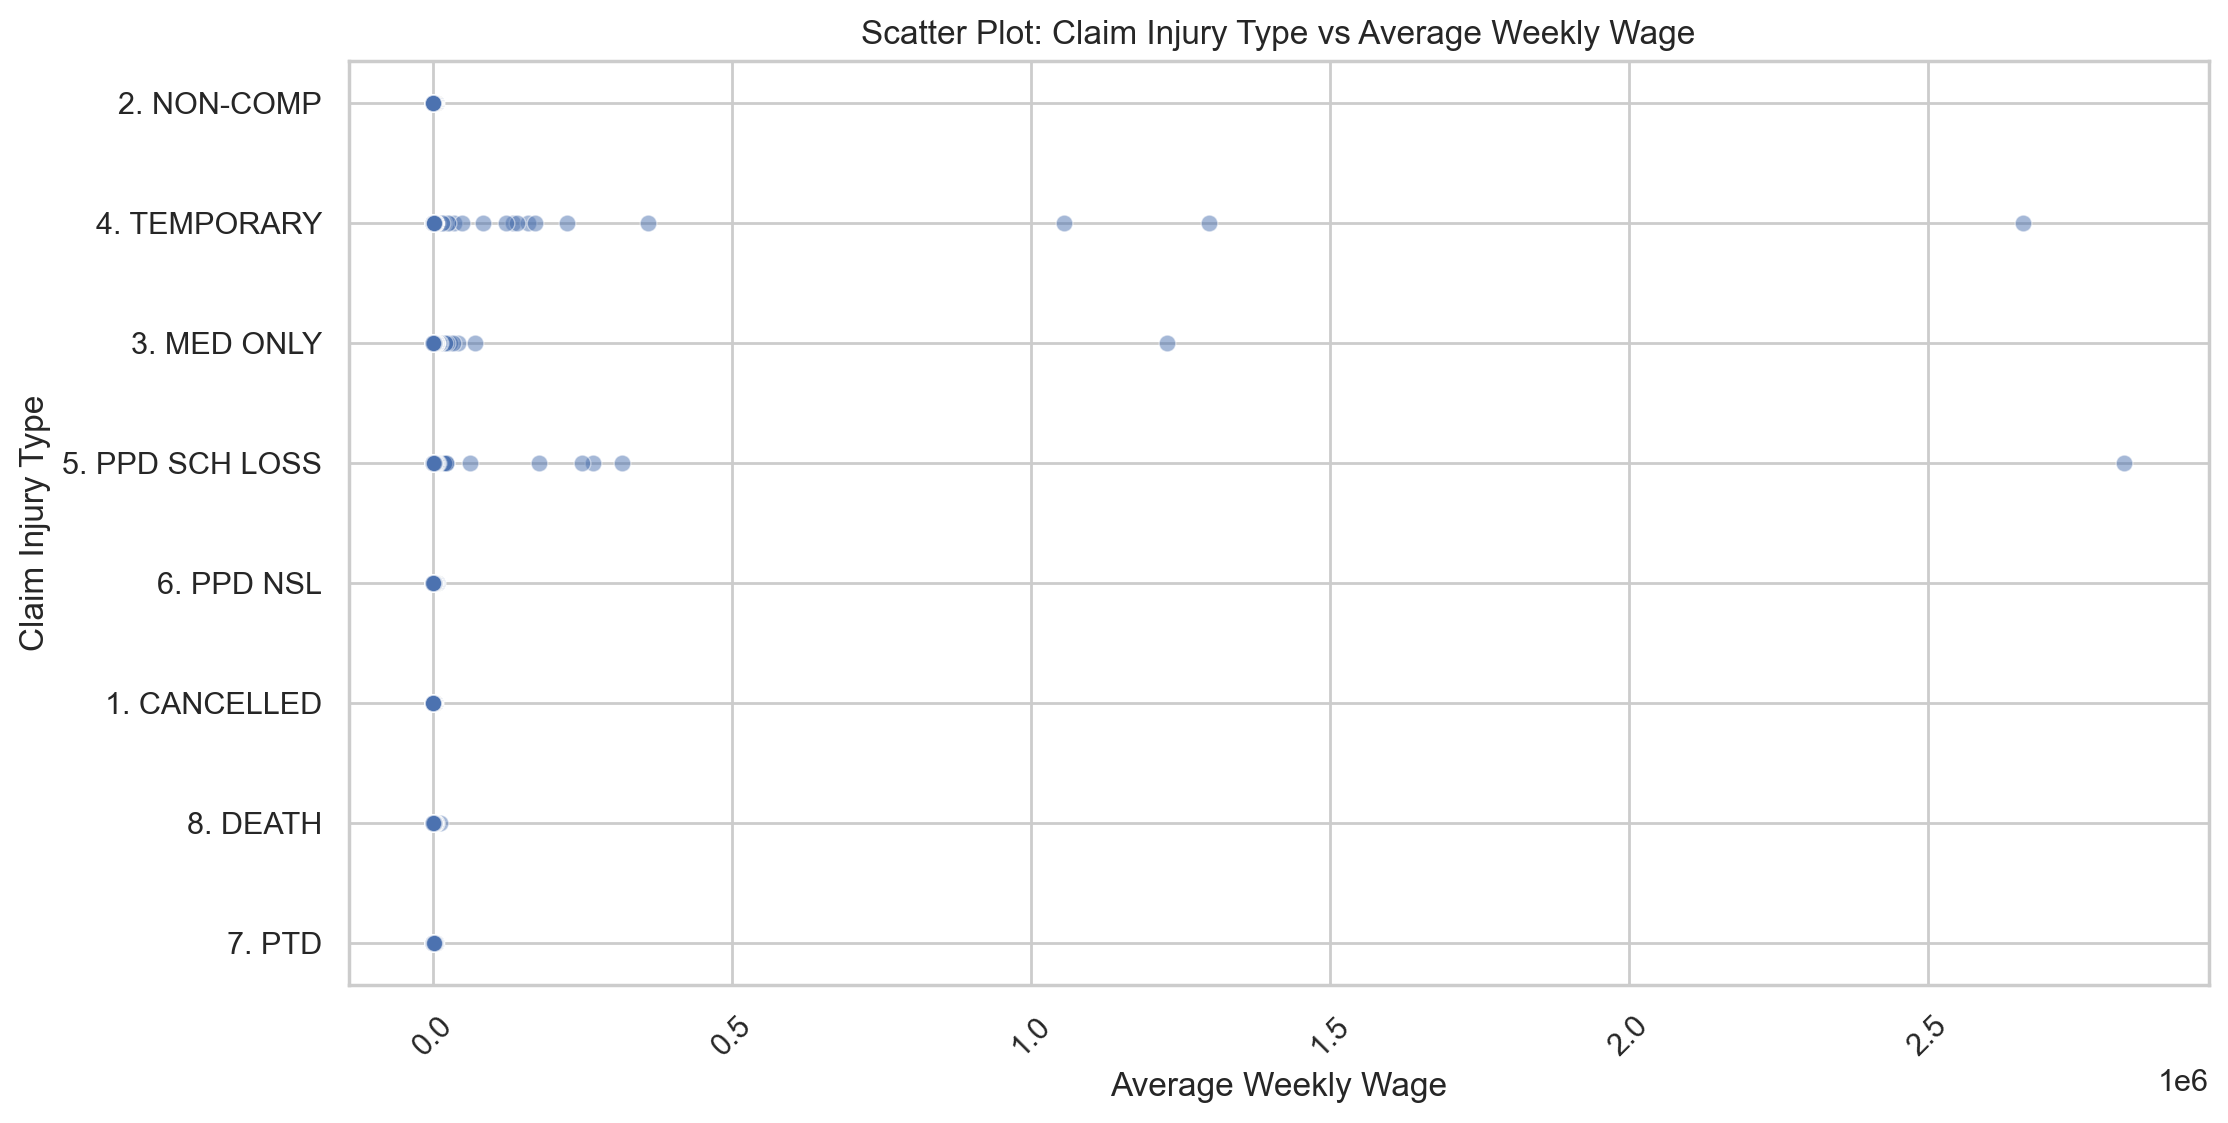

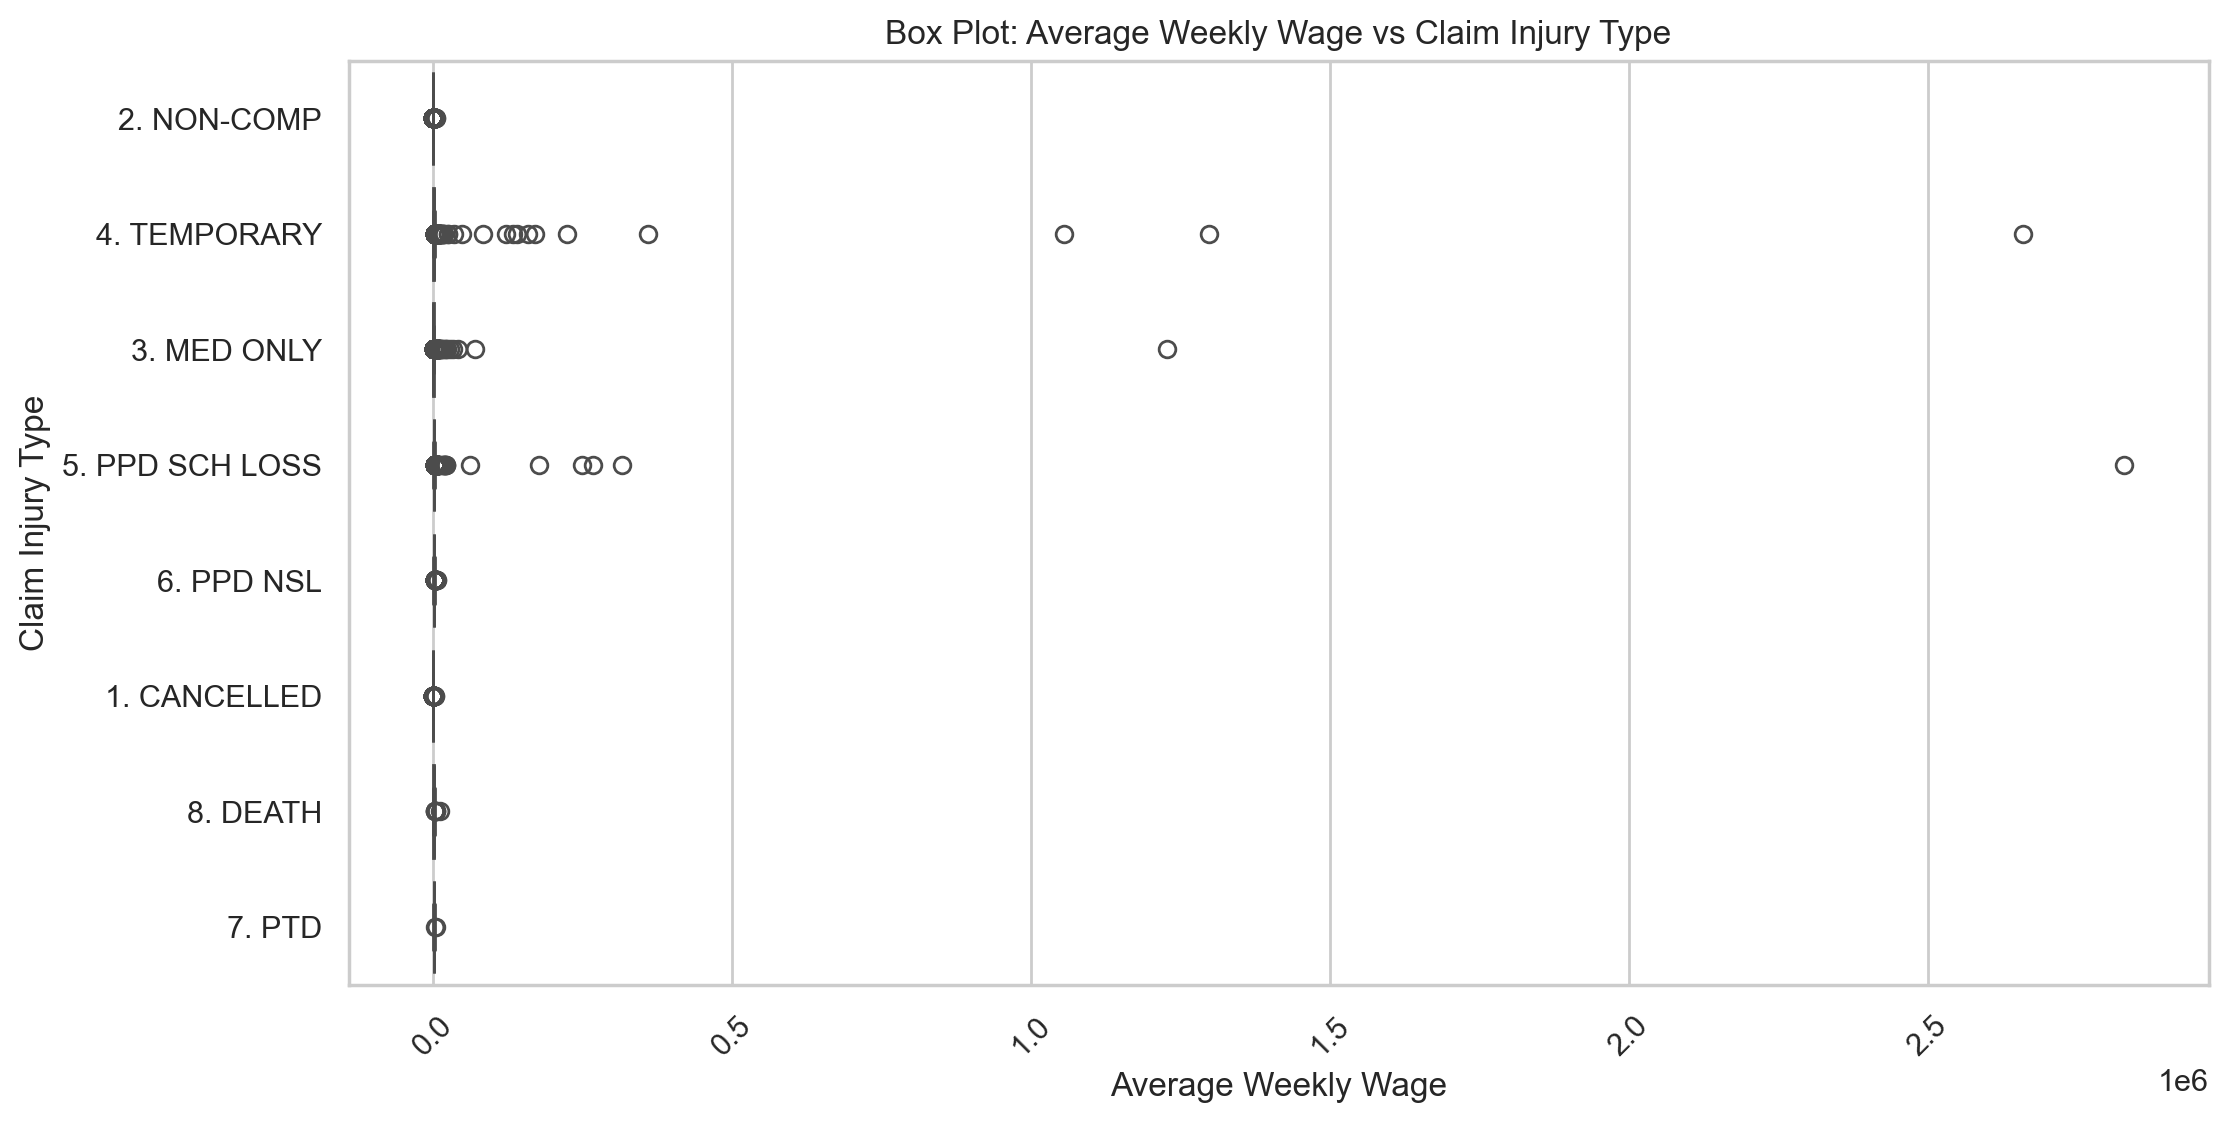

In [73]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Average Weekly Wage', y='Claim Injury Type', data=train_data, alpha=0.5)
plt.xlabel('Average Weekly Wage')
plt.ylabel('Claim Injury Type')
plt.title('Scatter Plot: Claim Injury Type vs Average Weekly Wage')
plt.xticks(rotation=45) 
plt.show()

### We can conclude that:
- Along side the zero values, Average Weekly wage has a lot of extreme values.

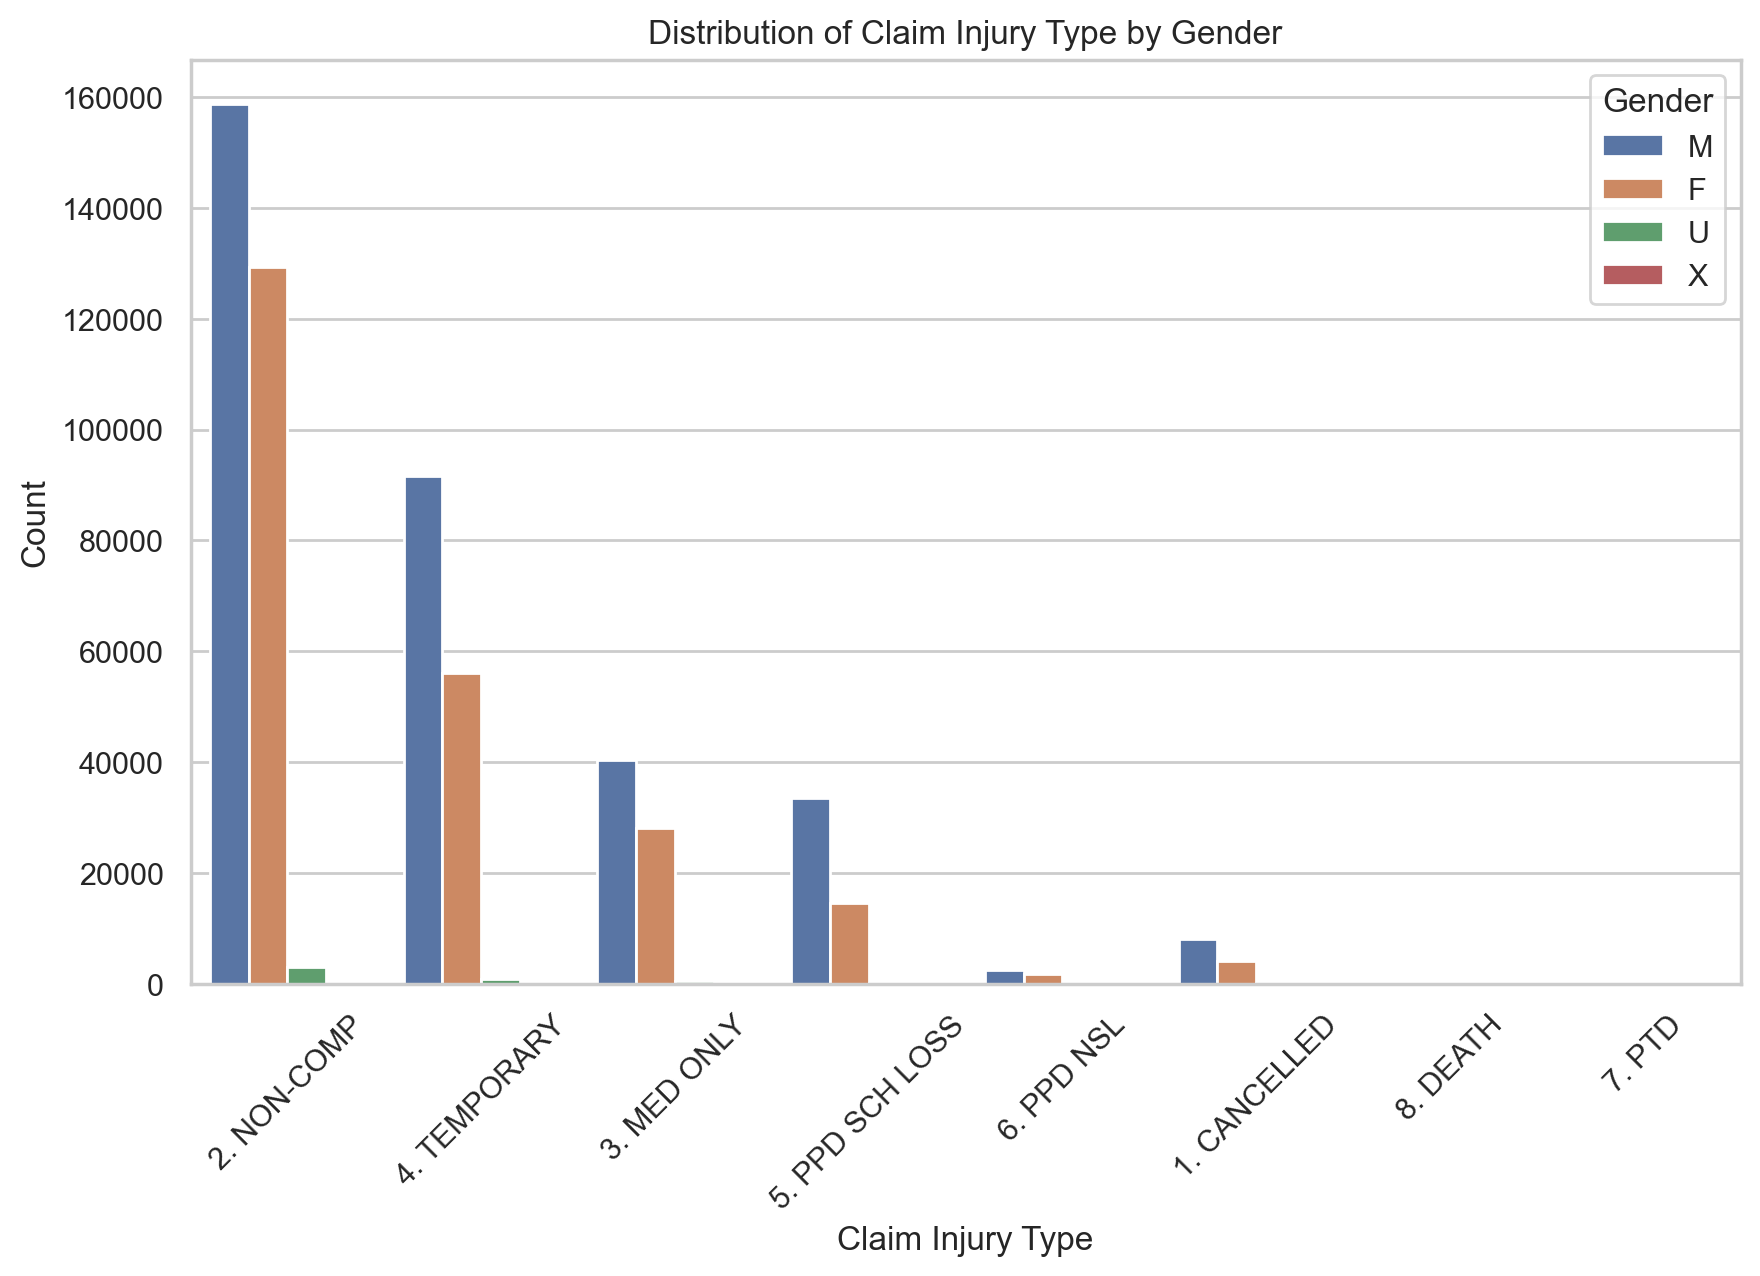

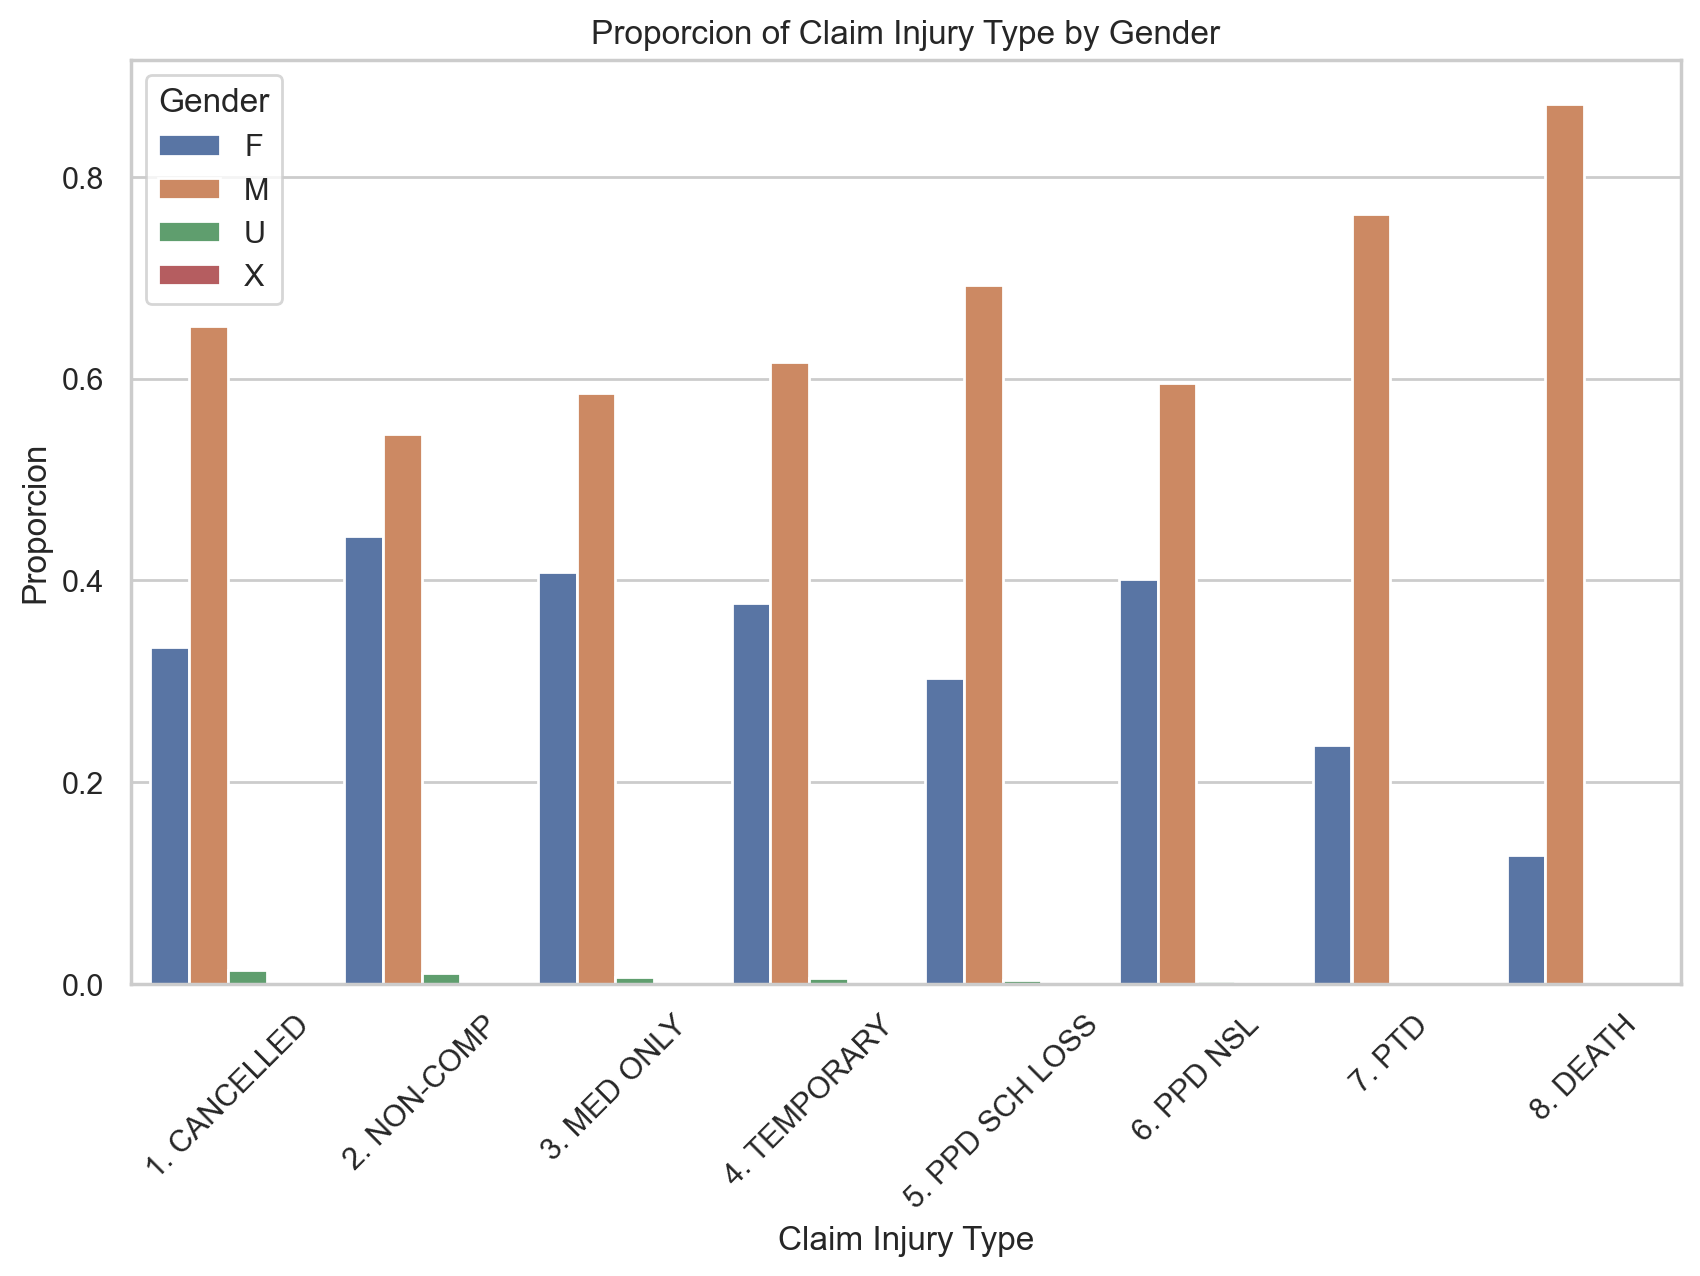

In [74]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.countplot(x='Claim Injury Type', hue='Gender', data=train_data)

plt.xlabel('Claim Injury Type')
plt.ylabel('Count')
plt.title('Distribution of Claim Injury Type by Gender')
plt.xticks(rotation=45) 

plt.show()

proporcoes = train_data.groupby(['Claim Injury Type', 'Gender']).size().reset_index(name='Count')
proporcoes['Proporção'] = proporcoes.groupby('Claim Injury Type')['Count'].transform(lambda x: x / x.sum())

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.barplot(x='Claim Injury Type', y='Proporção', hue='Gender', data=proporcoes)

plt.xlabel('Claim Injury Type')
plt.ylabel('Proporcion')
plt.title('Proporcion of Claim Injury Type by Gender')
plt.xticks(rotation=45) 

plt.show()

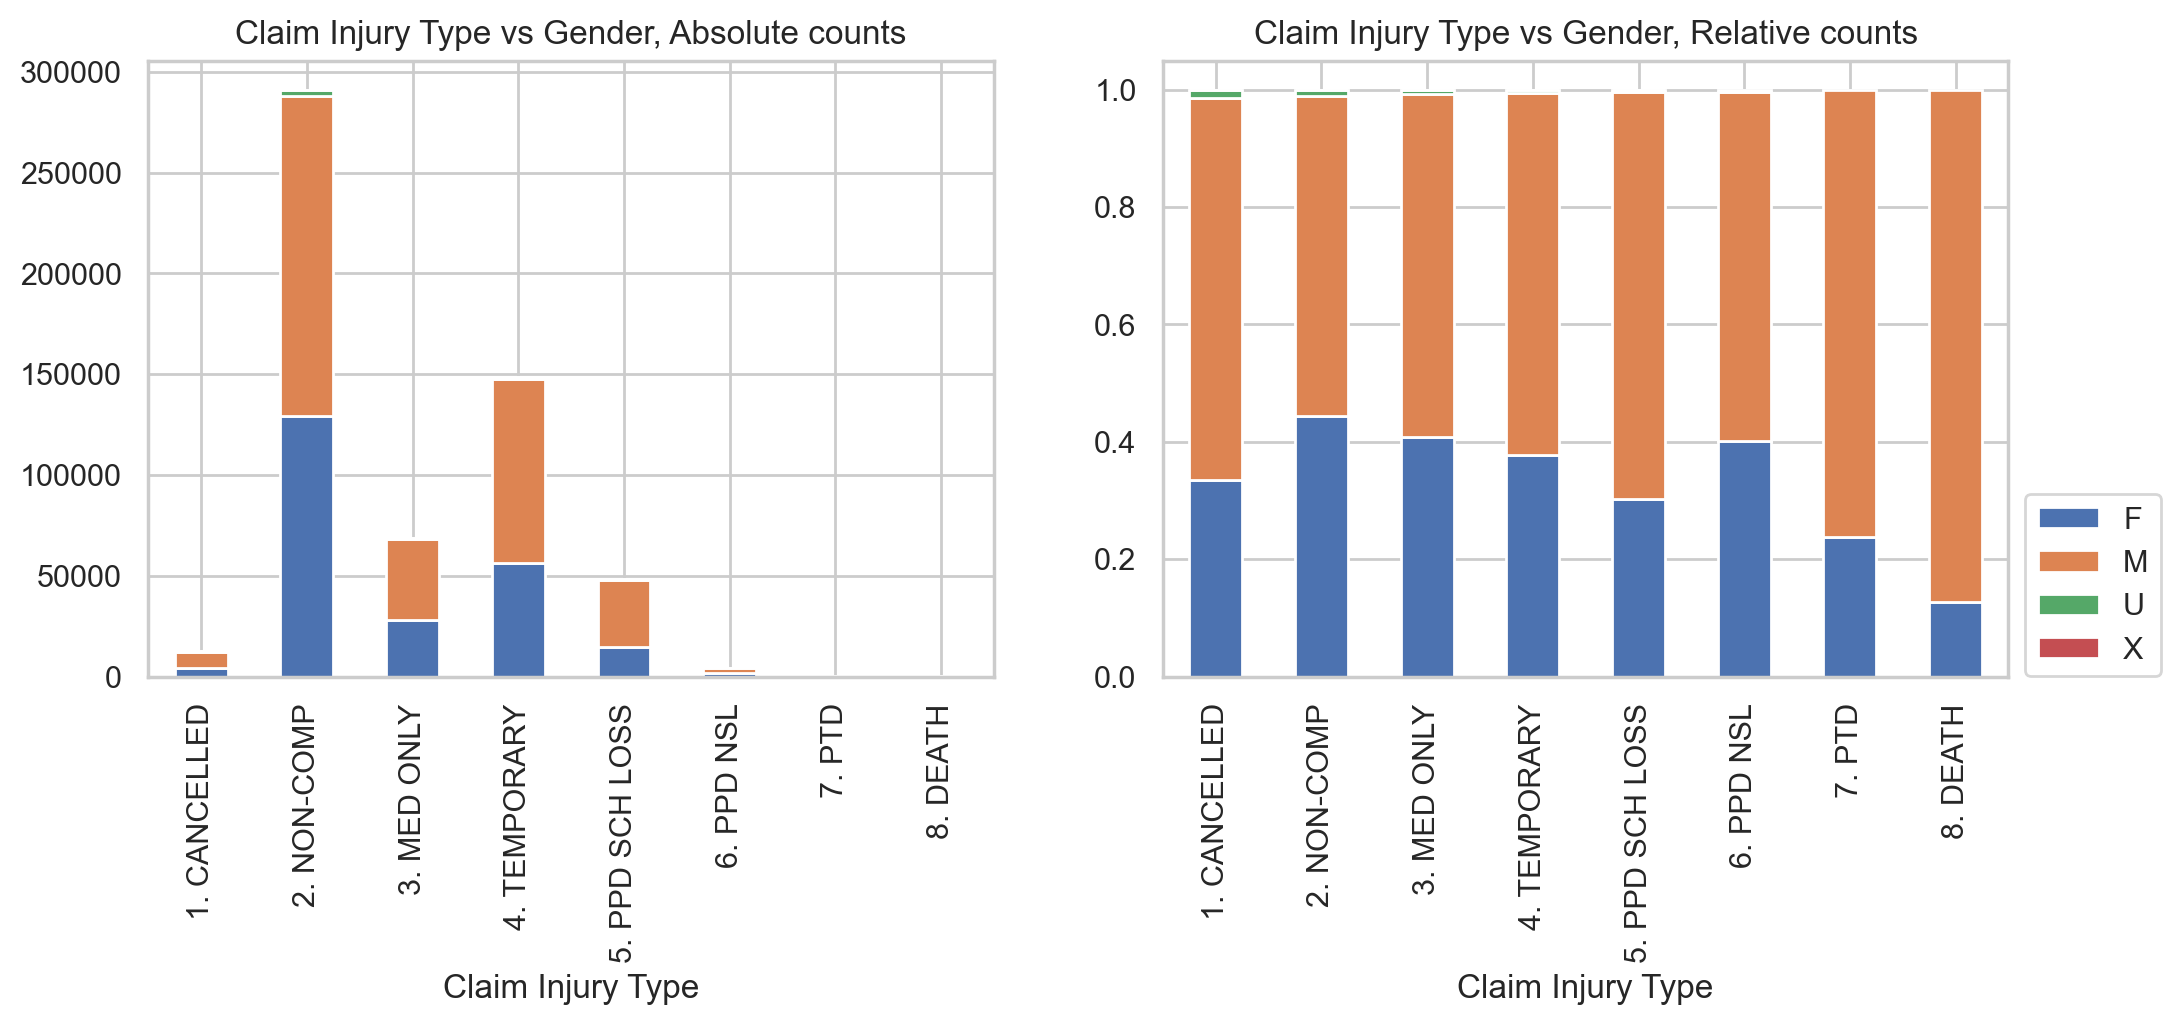

In [75]:
cat1 = 'Claim Injury Type'
cat2 = 'Gender'

fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = train_data.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Claim Injury Type vs Gender, Absolute counts')
axes[0].legend([], frameon=False)

catpc_df2 = train_data.groupby([cat1, cat2])[cat2].size() / train_data.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title('Claim Injury Type vs Gender, Relative counts')
axes[1].legend(loc=(1.02,0))

plt.show()

### We can conclude that:
- There is no Claim Injury Type where female has a higher number than male.

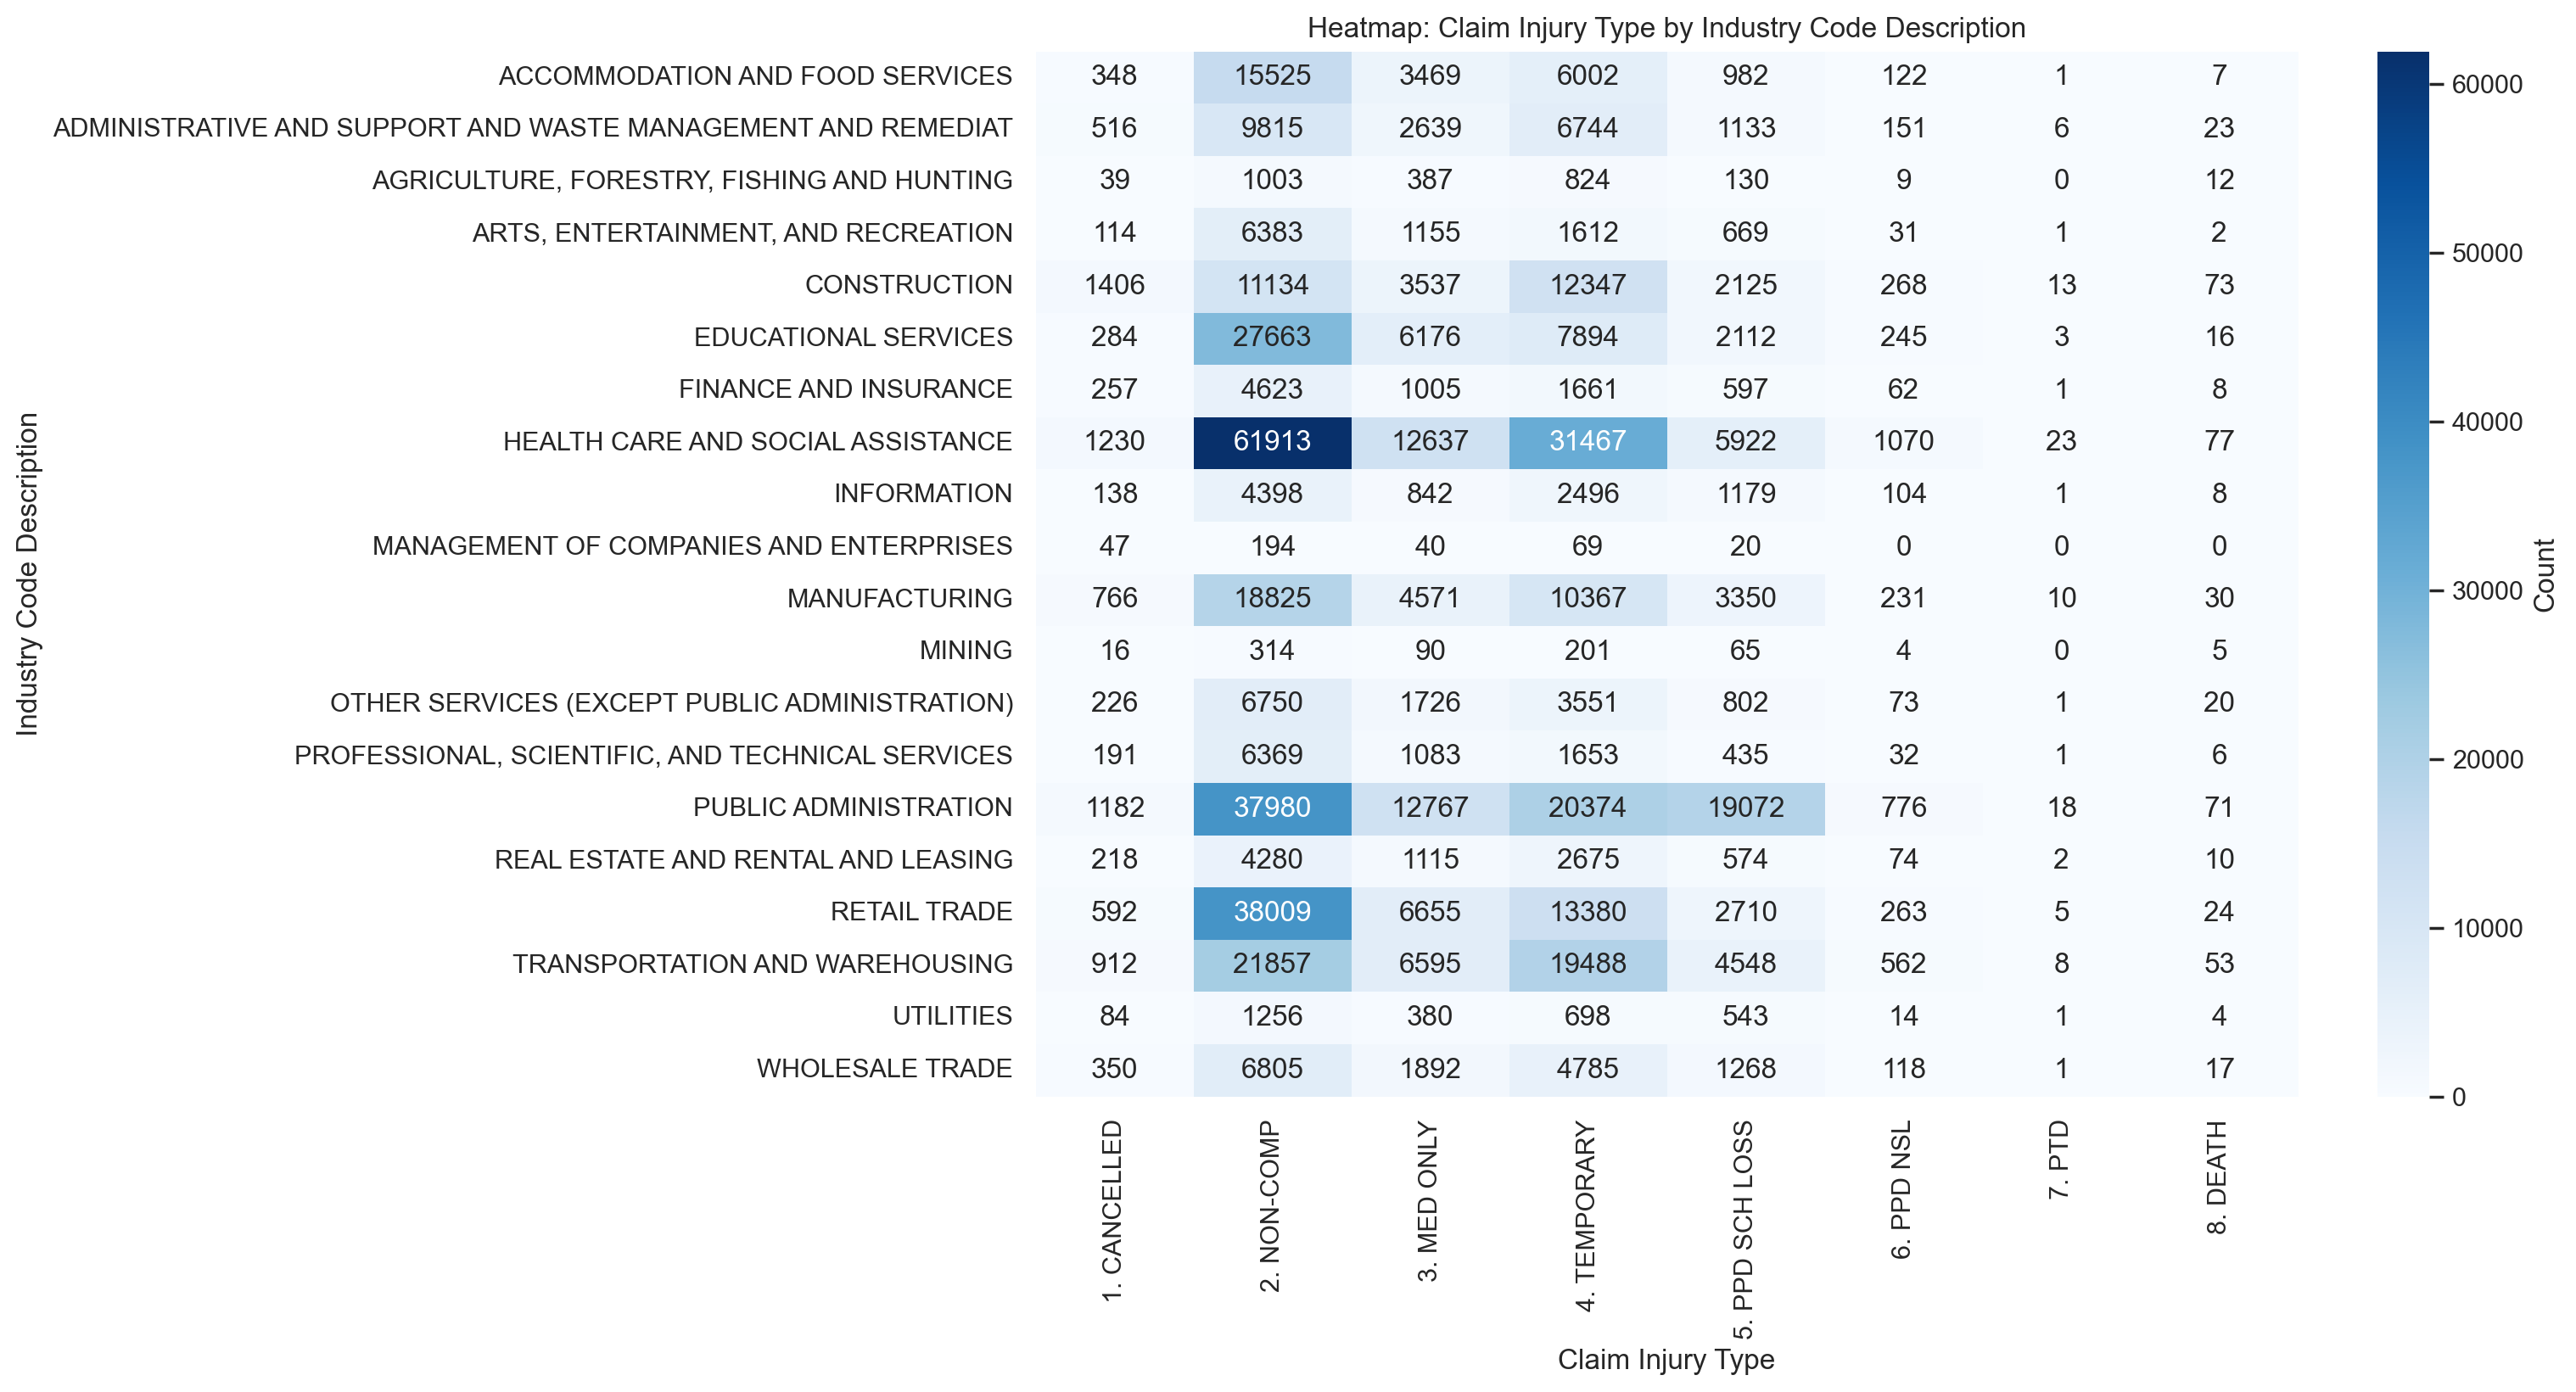

In [76]:
heatmap_data = train_data.groupby(['Industry Code Description', 'Claim Injury Type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Count'})

plt.xlabel('Claim Injury Type')
plt.ylabel('Industry Code Description')
plt.title('Heatmap: Claim Injury Type by Industry Code Description')

plt.show()

### We can conclude that:
- As expected, the distribution is similar as the distribution of Claim Injury Type;
- We highlighted HEALTHCARE AND SOCIAL ASSISTANCE as the Description with most cases.

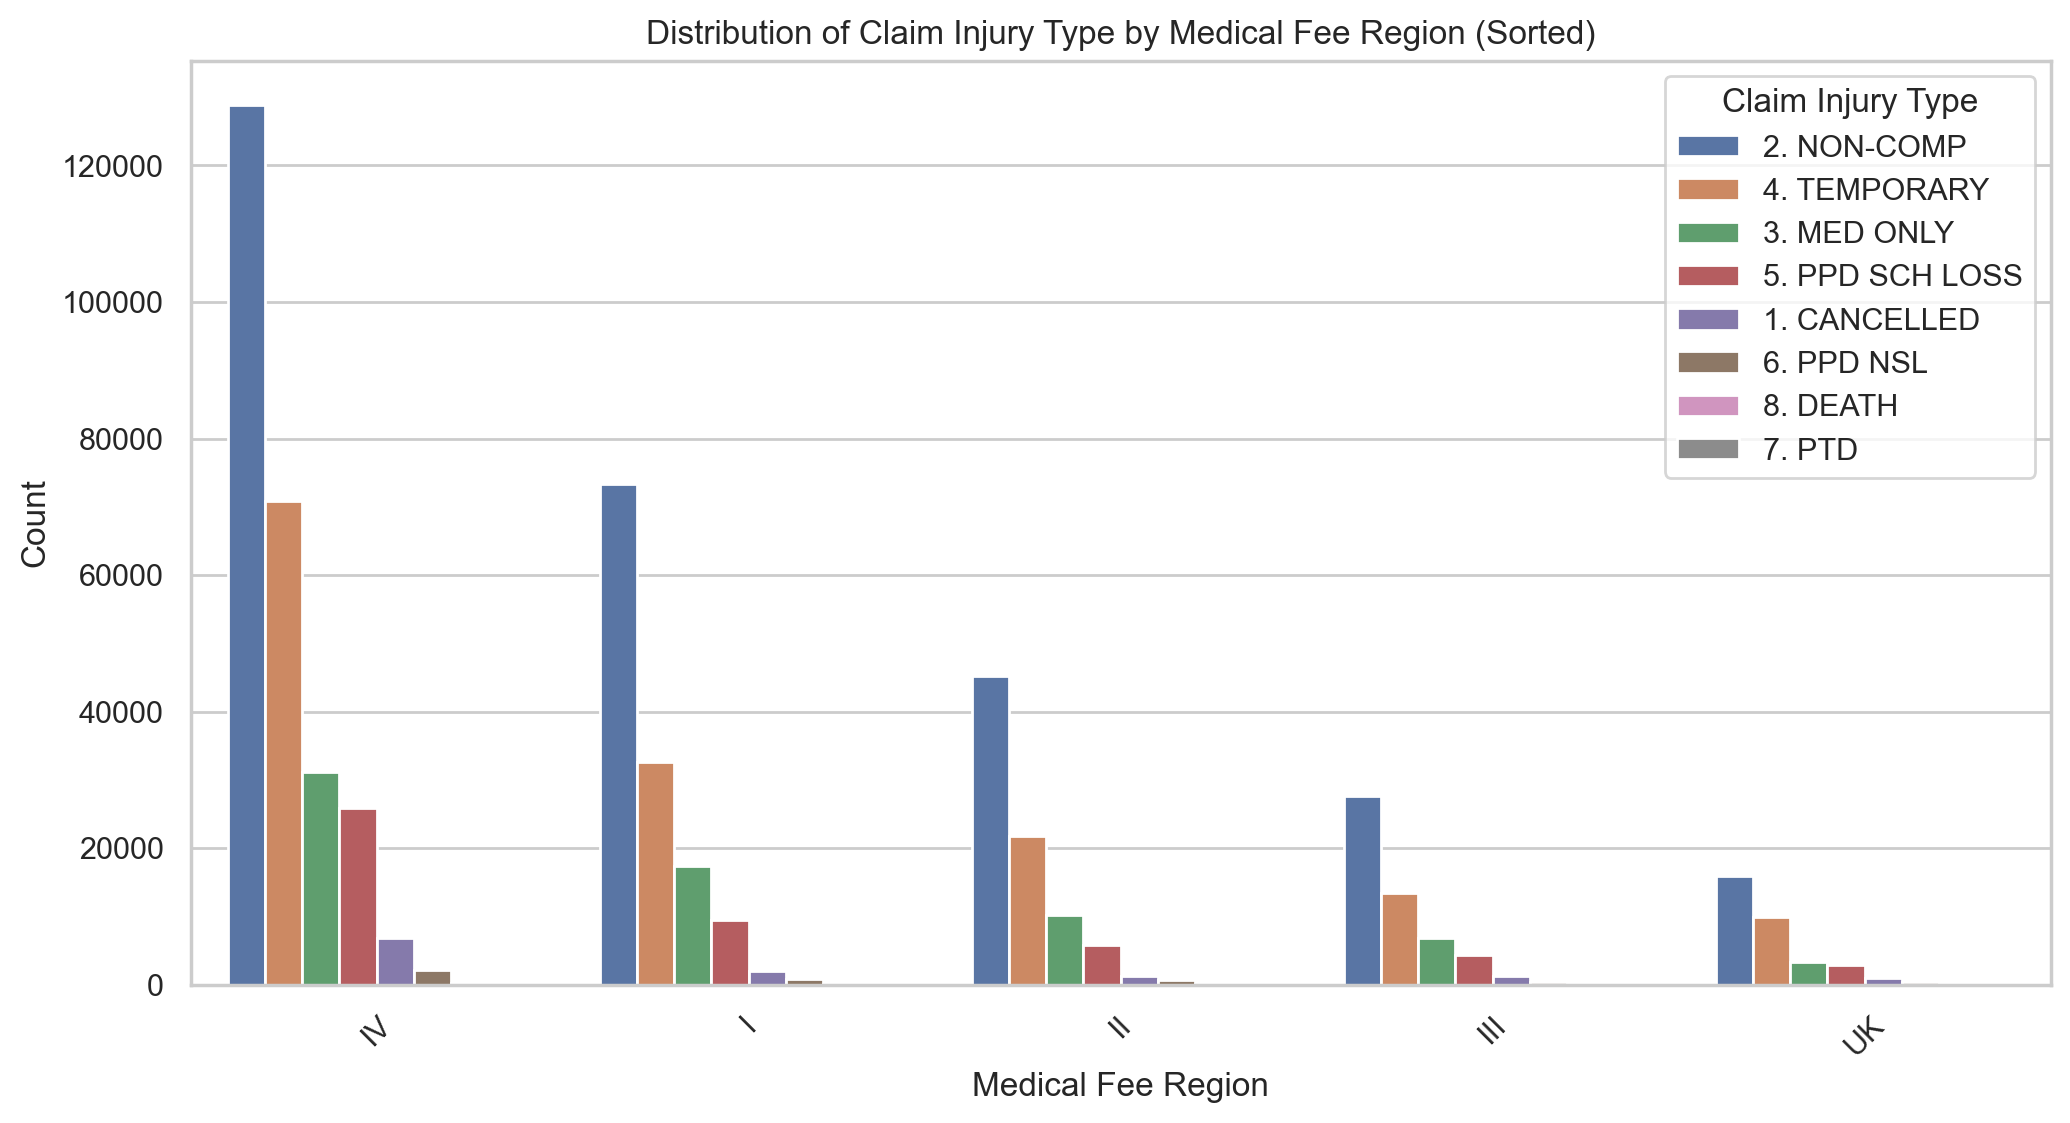

In [77]:
contagem = train_data.groupby(['Medical Fee Region', 'Claim Injury Type']).size().reset_index(name='Count')

soma_por_regiao = contagem.groupby('Medical Fee Region')['Count'].sum().reset_index()

soma_por_regiao = soma_por_regiao.sort_values(by='Count', ascending=False)

contagem['Medical Fee Region'] = pd.Categorical(contagem['Medical Fee Region'], categories=soma_por_regiao['Medical Fee Region'], ordered=True)

soma_por_tipo = contagem.groupby('Claim Injury Type')['Count'].sum().reset_index()

soma_por_tipo = soma_por_tipo.sort_values(by='Count', ascending=False)

contagem['Claim Injury Type'] = pd.Categorical(contagem['Claim Injury Type'], categories=soma_por_tipo['Claim Injury Type'], ordered=True)

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.barplot(x='Medical Fee Region', y='Count', hue='Claim Injury Type', data=contagem)

plt.xlabel('Medical Fee Region')
plt.ylabel('Count')
plt.title('Distribution of Claim Injury Type by Medical Fee Region (Sorted)')
plt.xticks(rotation=45)  

# Exibe o gráfico
plt.legend(title='Claim Injury Type')
plt.show()

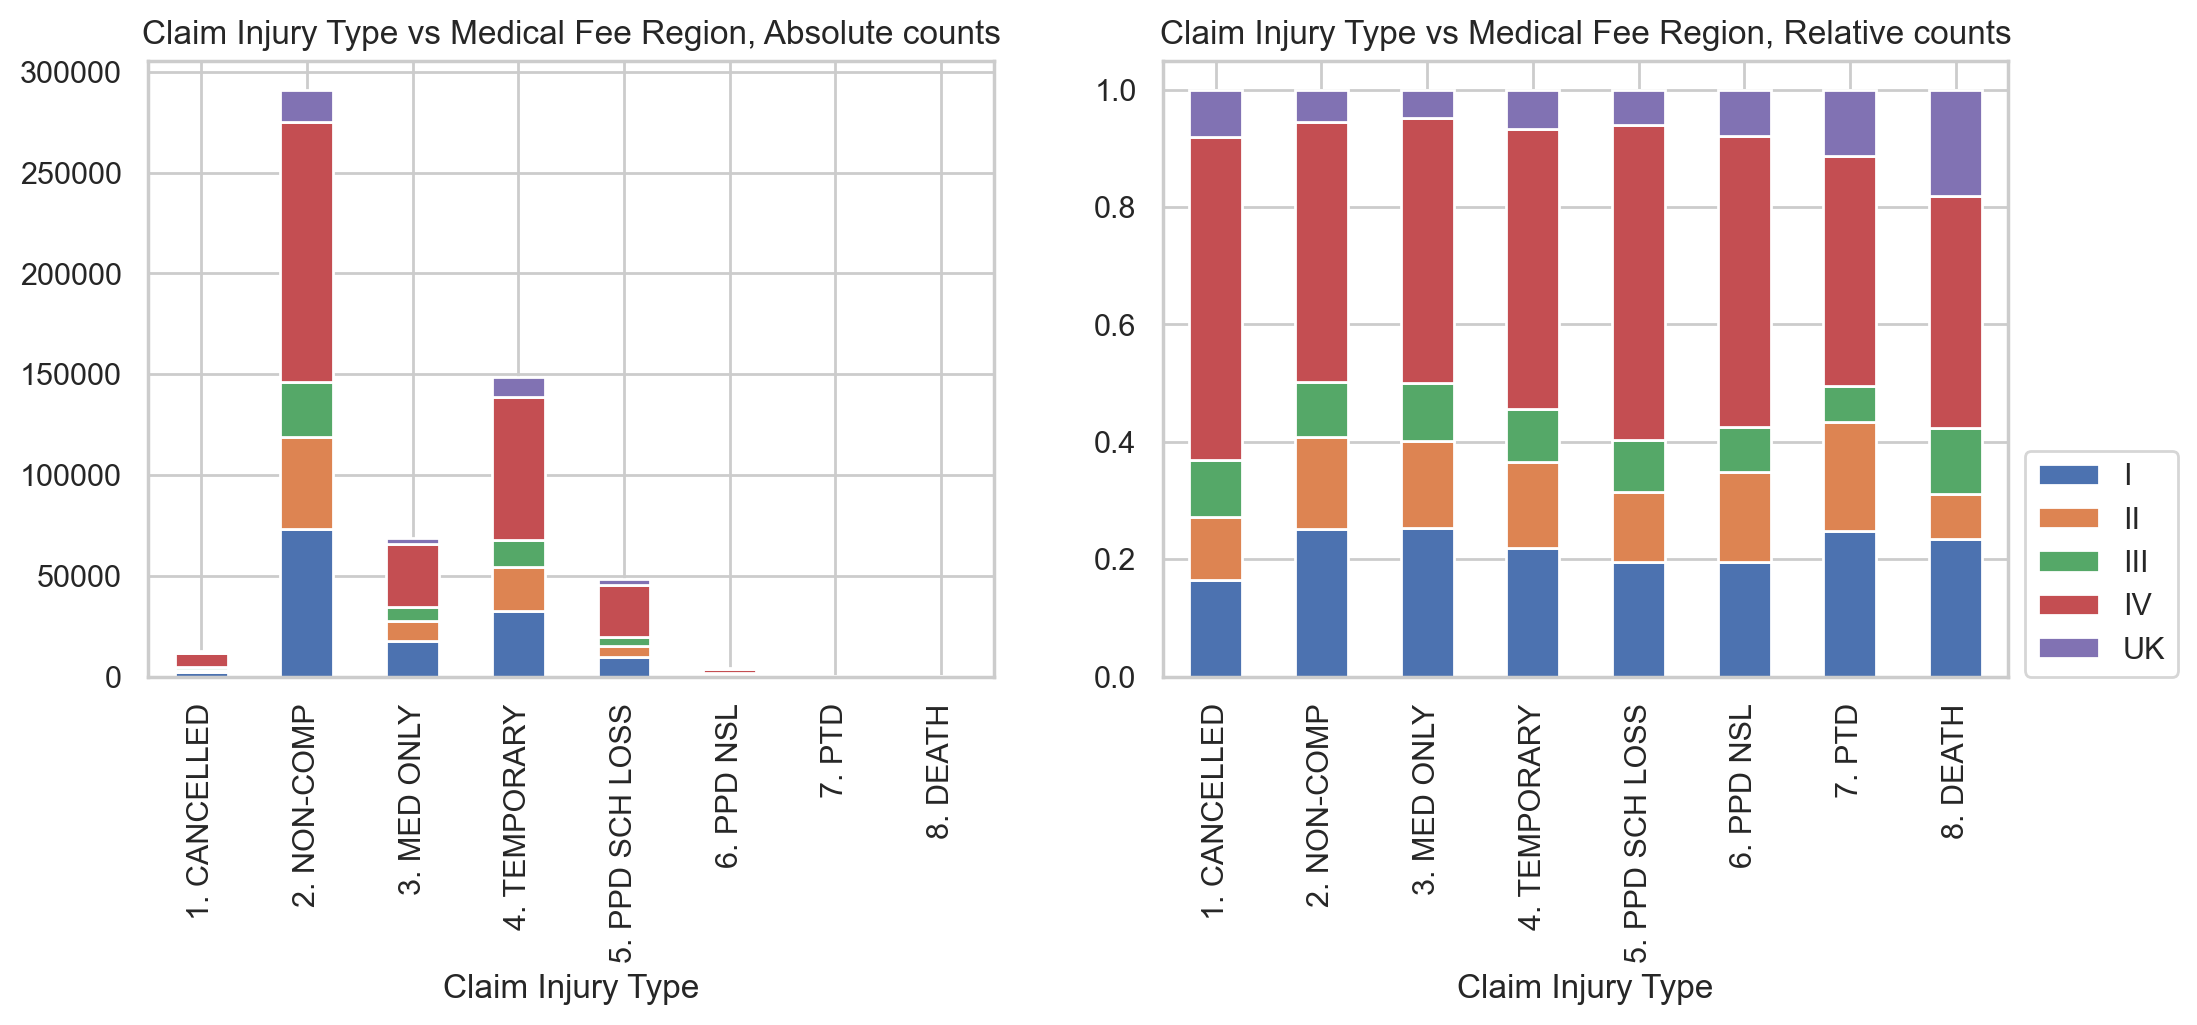

In [78]:
cat1 = 'Claim Injury Type'
cat2 = 'Medical Fee Region'

fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = train_data.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Claim Injury Type vs Medical Fee Region, Absolute counts')
axes[0].legend([], frameon=False)

catpc_df2 = train_data.groupby([cat1, cat2])[cat2].size() / train_data.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title('Claim Injury Type vs Medical Fee Region, Relative counts')
axes[1].legend(loc=(1.02,0))

plt.show()

### We can conclude that:
- The distribution is consistent when divided by Claim Injury Type;
- We highlighted 8. DEATH has the highest percentage of UK.

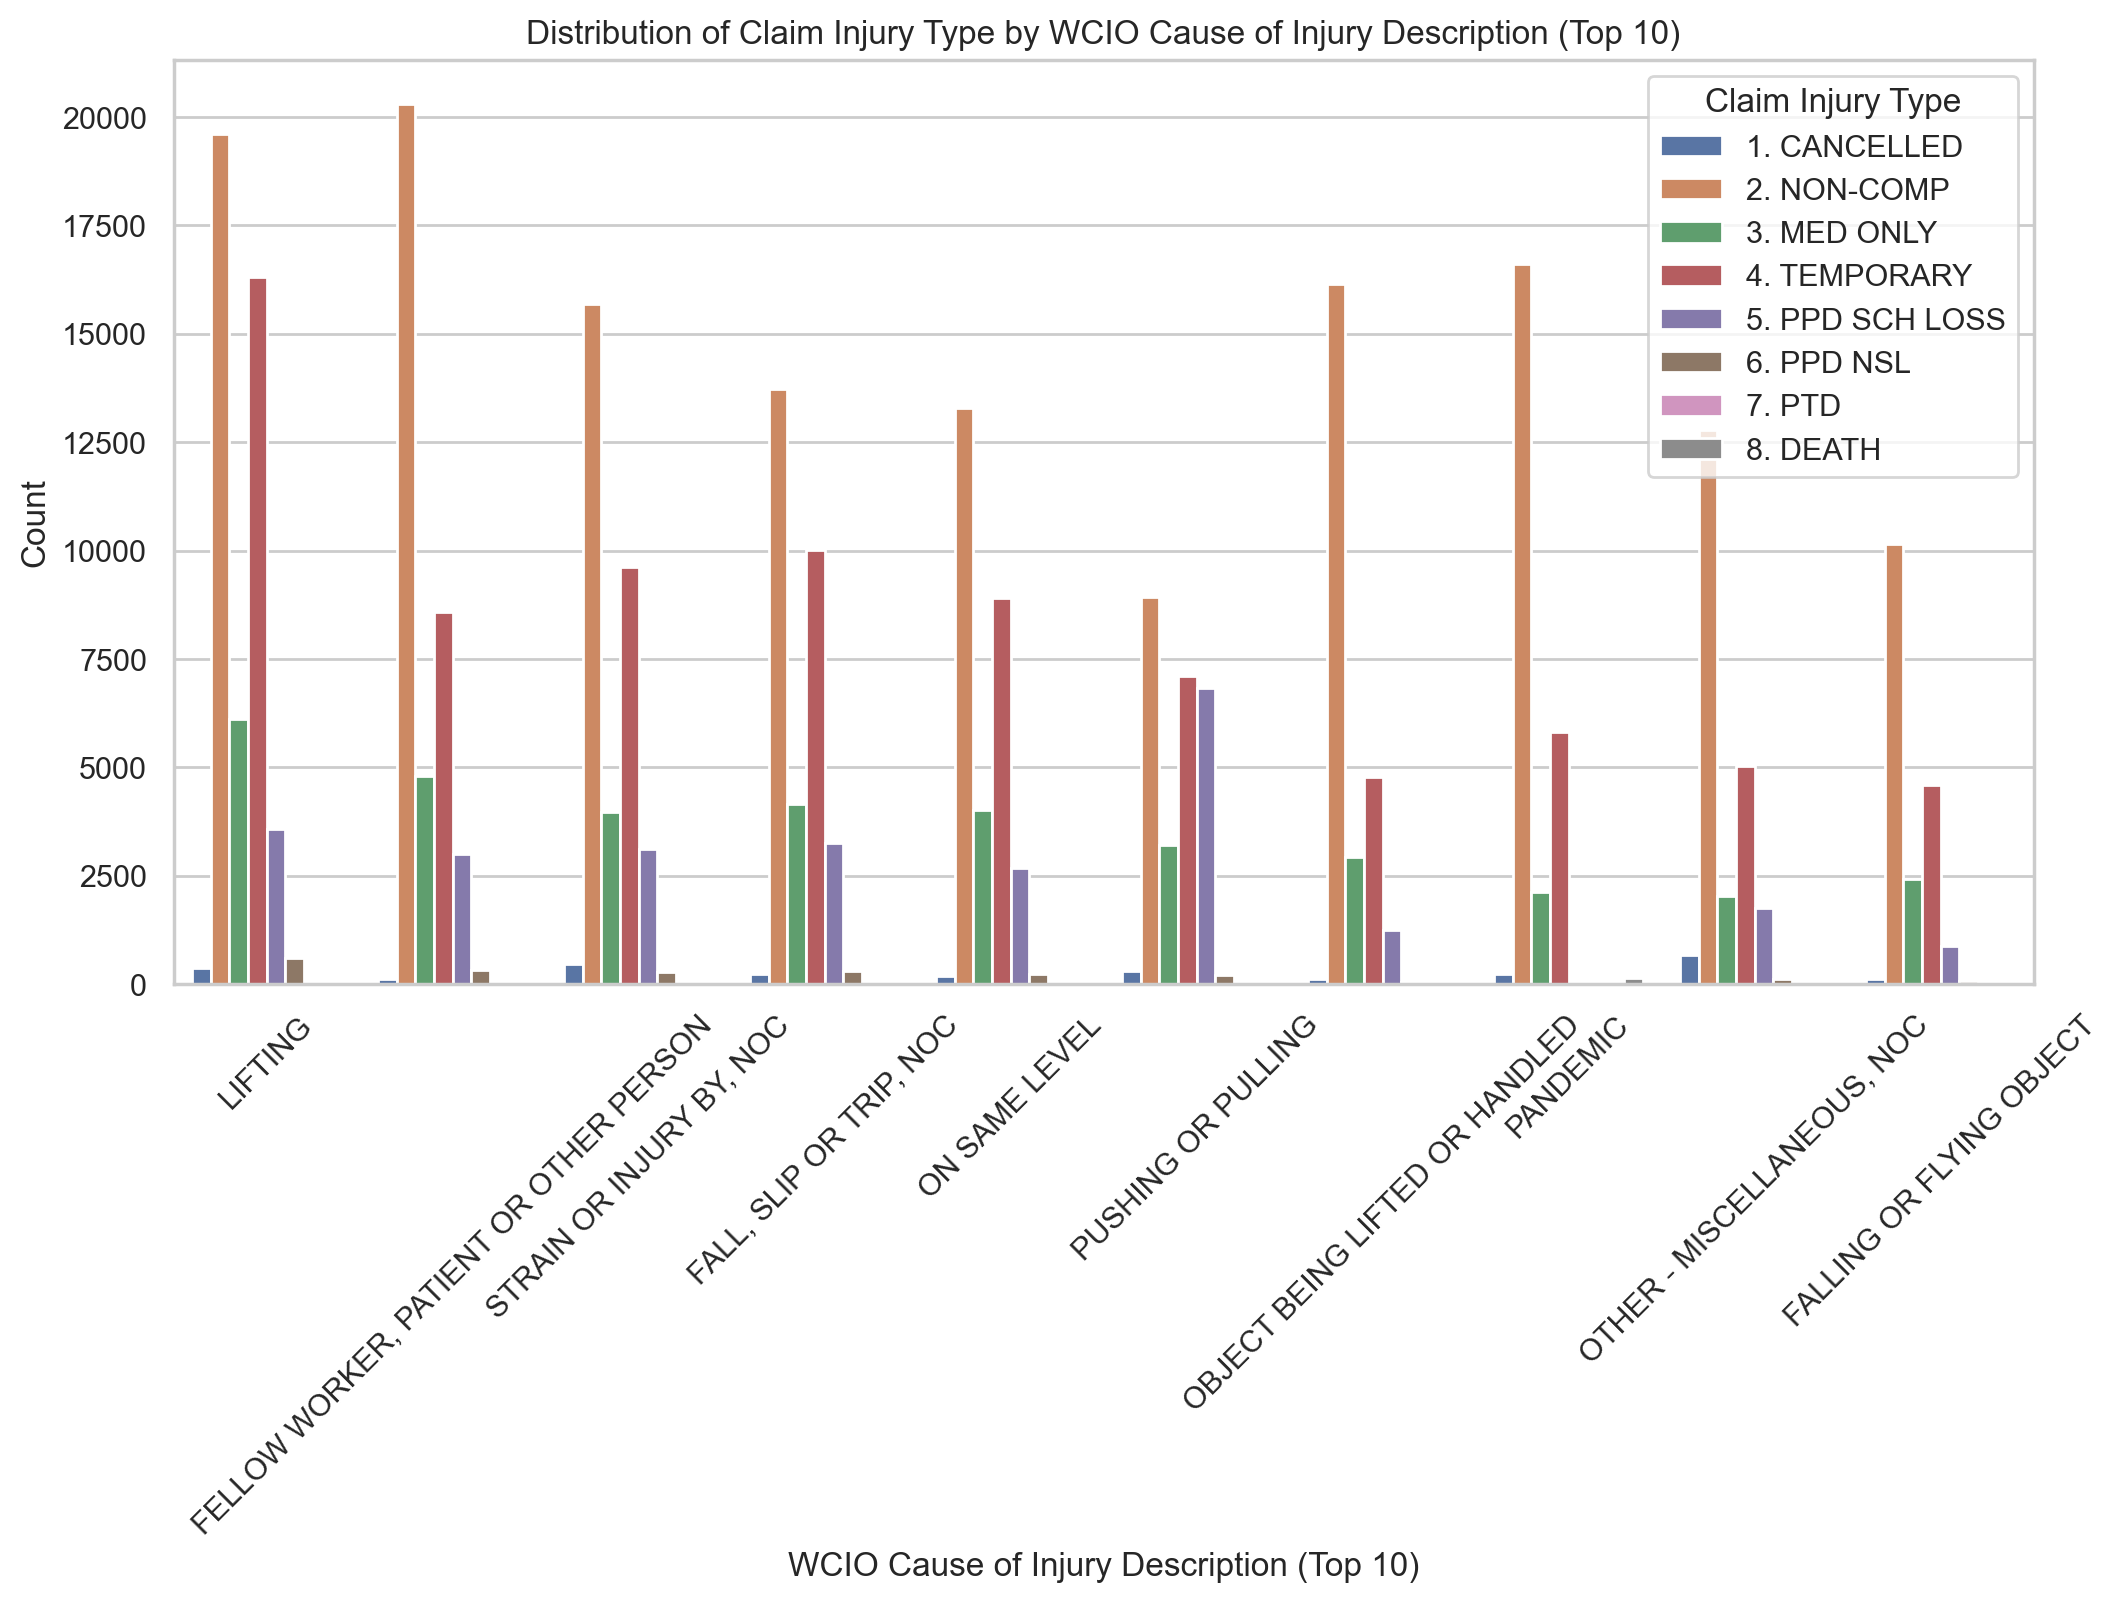

In [80]:
contagem = train_data.groupby(['WCIO Cause of Injury Description', 'Claim Injury Type']).size().reset_index(name='Count')

soma_por_causa = contagem.groupby('WCIO Cause of Injury Description')['Count'].sum().reset_index()

top10_causas = soma_por_causa.sort_values(by='Count', ascending=False).head(10)

contagem_top10 = contagem[contagem['WCIO Cause of Injury Description'].isin(top10_causas['WCIO Cause of Injury Description'])]

contagem_top10 = contagem_top10.sort_values(by=['WCIO Cause of Injury Description', 'Claim Injury Type'])

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.barplot(x='WCIO Cause of Injury Description', y='Count', hue='Claim Injury Type', data=contagem_top10, 
            order=top10_causas['WCIO Cause of Injury Description'].tolist())

plt.xlabel('WCIO Cause of Injury Description (Top 10)')
plt.ylabel('Count')
plt.title('Distribution of Claim Injury Type by WCIO Cause of Injury Description (Top 10)')
plt.xticks(rotation=45)  
plt.legend(title='Claim Injury Type')
plt.show()

### We can conclude that:
- This graph had significant differences in the distributions;
- ON SAME LEVEL is the most equity one, where 5. PPD SCH LOSS has a count close to 2. NON-COMP, which does not happen in any other Description;
- 2. NON-COMP has always the highest count.

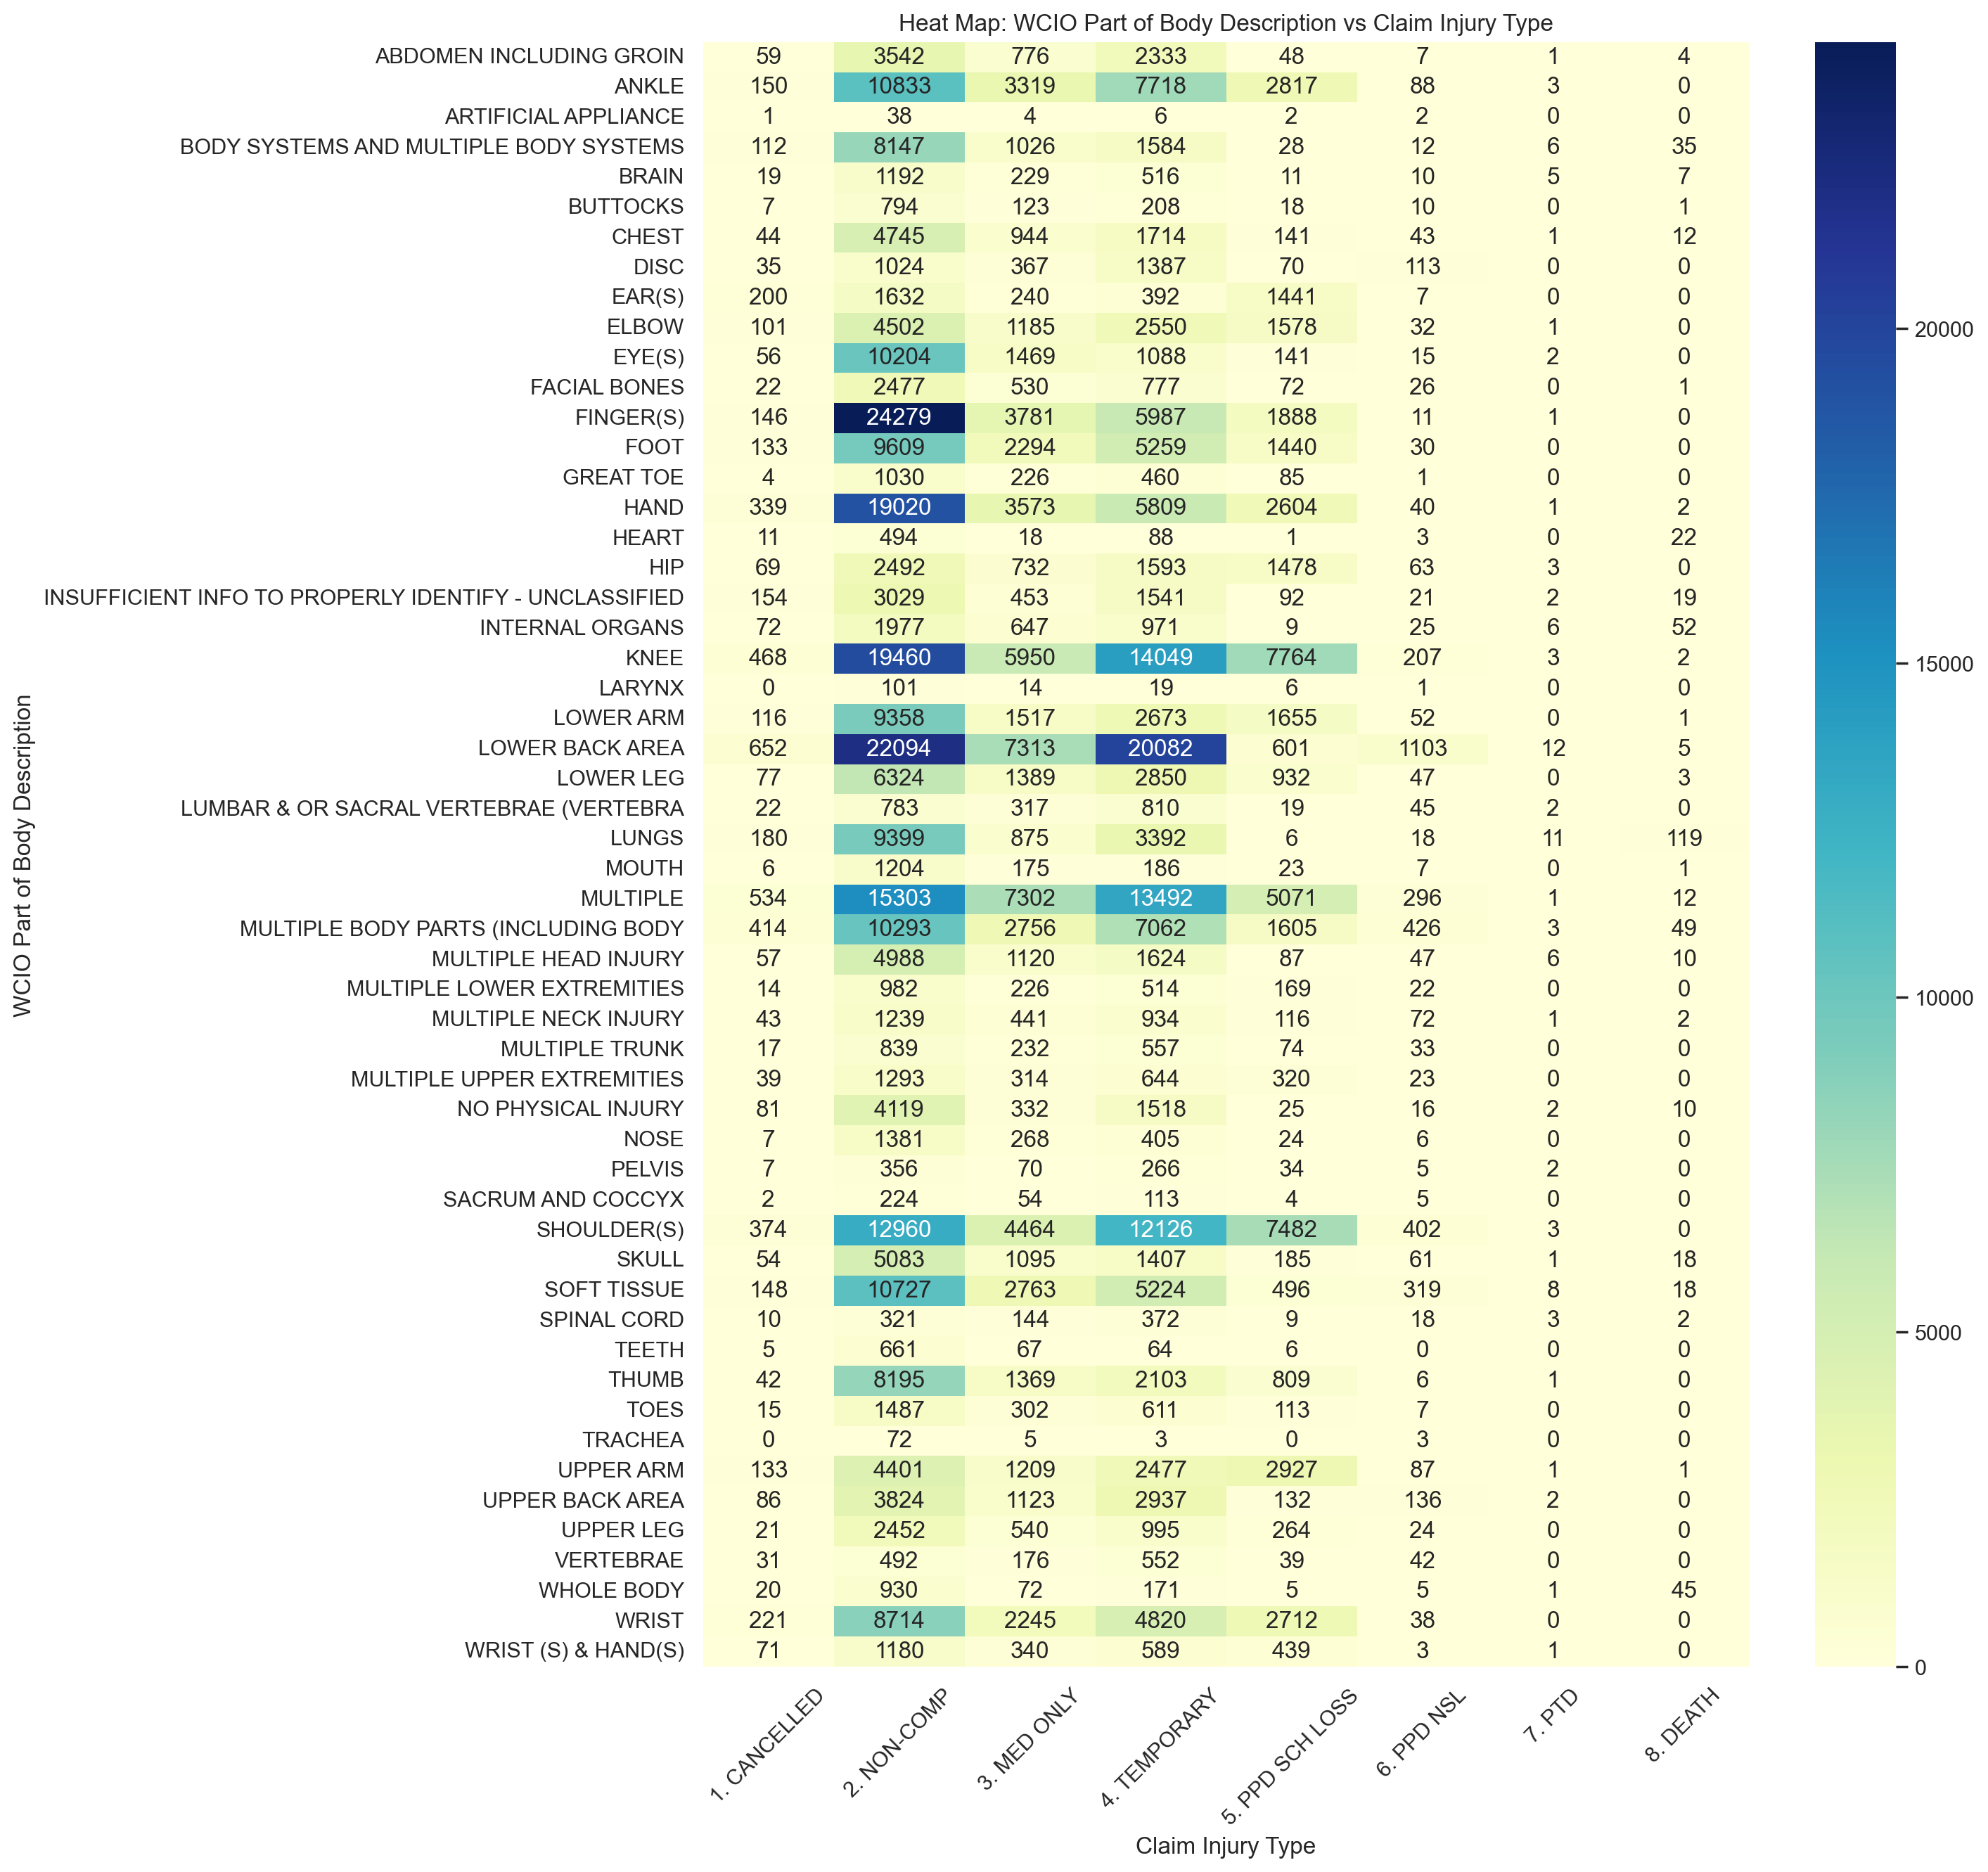

In [81]:
contagem_part_body = train_data.groupby(['WCIO Part Of Body Description', 'Claim Injury Type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 15))
sns.heatmap(contagem_part_body, annot=True, fmt='d', cmap='YlGnBu', cbar=True)

plt.xlabel('Claim Injury Type')
plt.ylabel('WCIO Part of Body Description')
plt.title('Heat Map: WCIO Part of Body Description vs Claim Injury Type')
plt.xticks(rotation=45)  
plt.yticks(rotation=0)   

plt.show()

### We can conclude that:
- This graph had significant differences in the distributions;
- Lungs has the higher count in 8. DEATH (with 119) and Lower Back Area has the higher count in 7. PTD (with 12), which is the most hard to predict;
- Fingers has the highest count in 2. NON-COMP and Lower Back Area has the highest count.

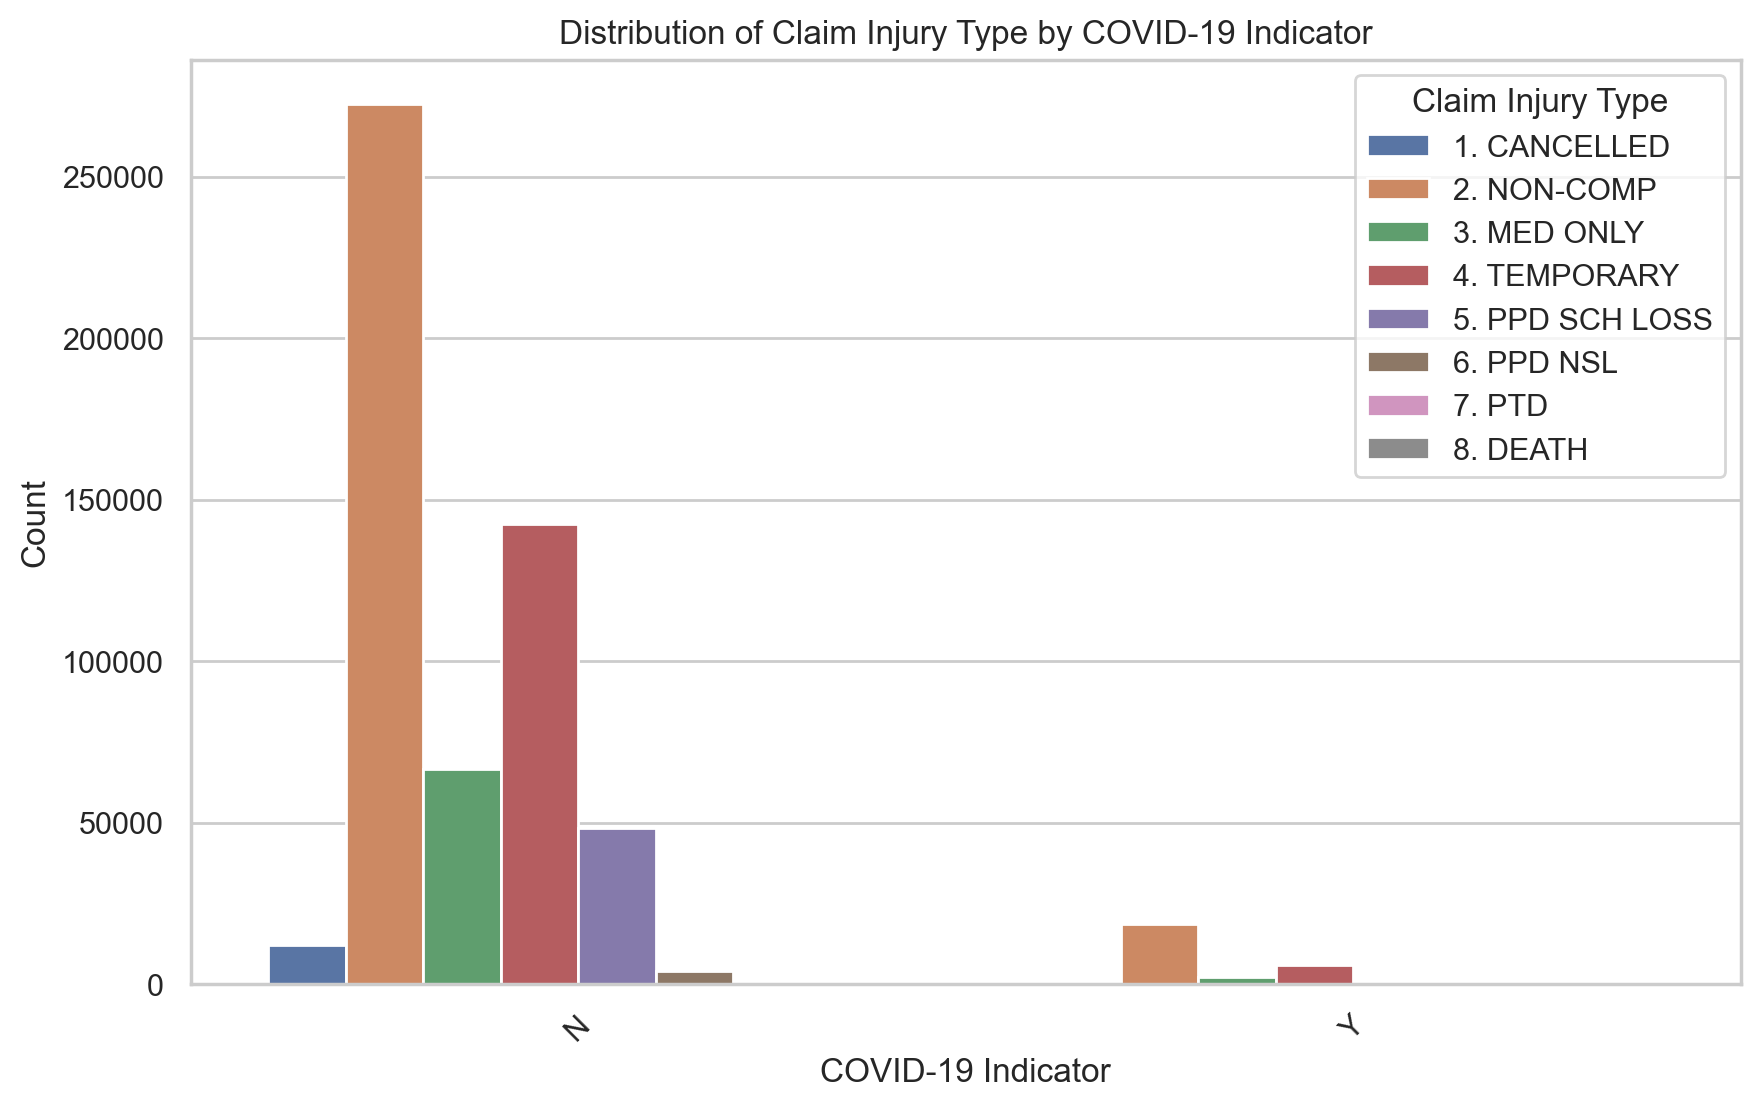

In [82]:
contagem_covid = train_data.groupby(['COVID-19 Indicator', 'Claim Injury Type']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.barplot(x='COVID-19 Indicator', y='Count', hue='Claim Injury Type', data=contagem_covid)

# Ajuste dos rótulos e título
plt.xlabel('COVID-19 Indicator')
plt.ylabel('Count')
plt.title('Distribution of Claim Injury Type by COVID-19 Indicator')
plt.xticks(rotation=45)  

# Exibe o gráfico
plt.legend(title='Claim Injury Type')
plt.show()

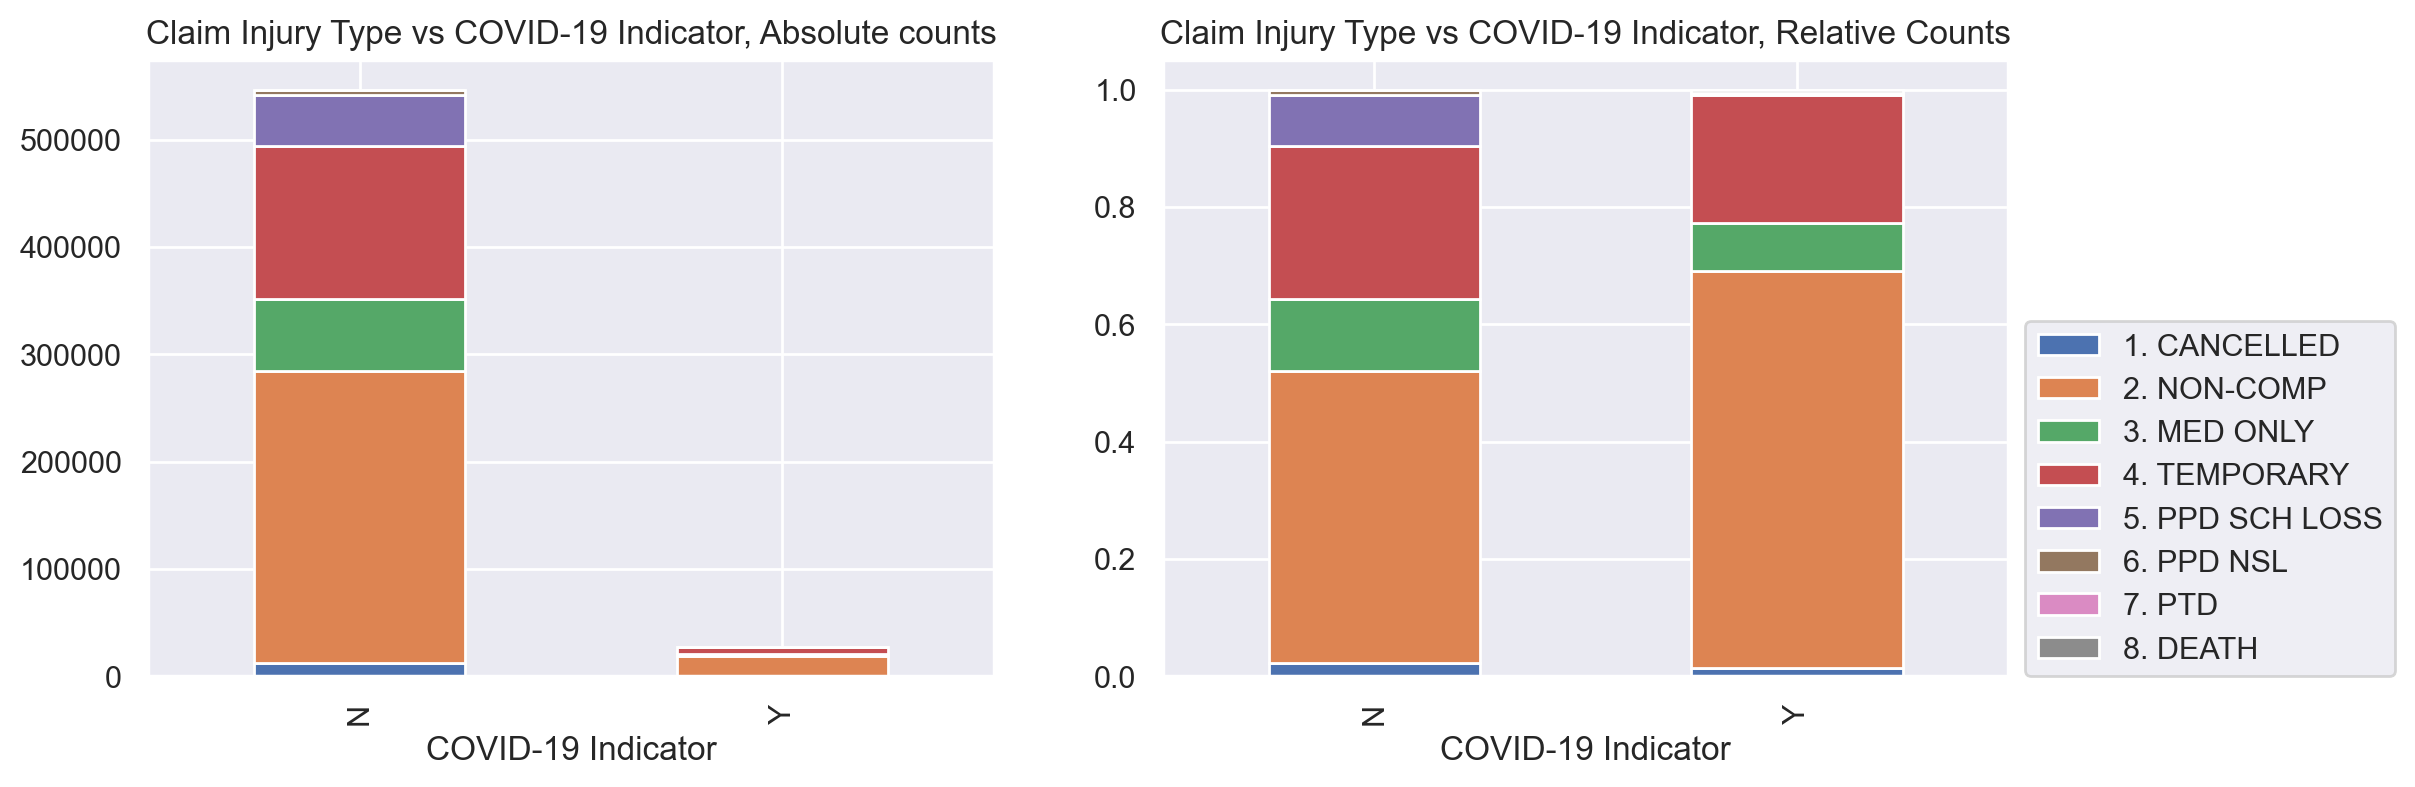

In [102]:
cat1 = 'COVID-19 Indicator'
cat2 = 'Claim Injury Type'

fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = train_data.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Claim Injury Type vs COVID-19 Indicator, Absolute counts')
axes[0].legend([], frameon=False)

catpc_df2 = train_data.groupby([cat1, cat2])[cat2].size() / train_data.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title('Claim Injury Type vs COVID-19 Indicator, Relative Counts')
axes[1].legend(loc=(1.02,0))

plt.show()

### We can conclude that:
- COVID-19 Indicator has much more values as no when compared to yes;
- regarding to the percentual distribution, we highlighted the high percentage of 5. PPD SCH LOSS in N when compared to Y.

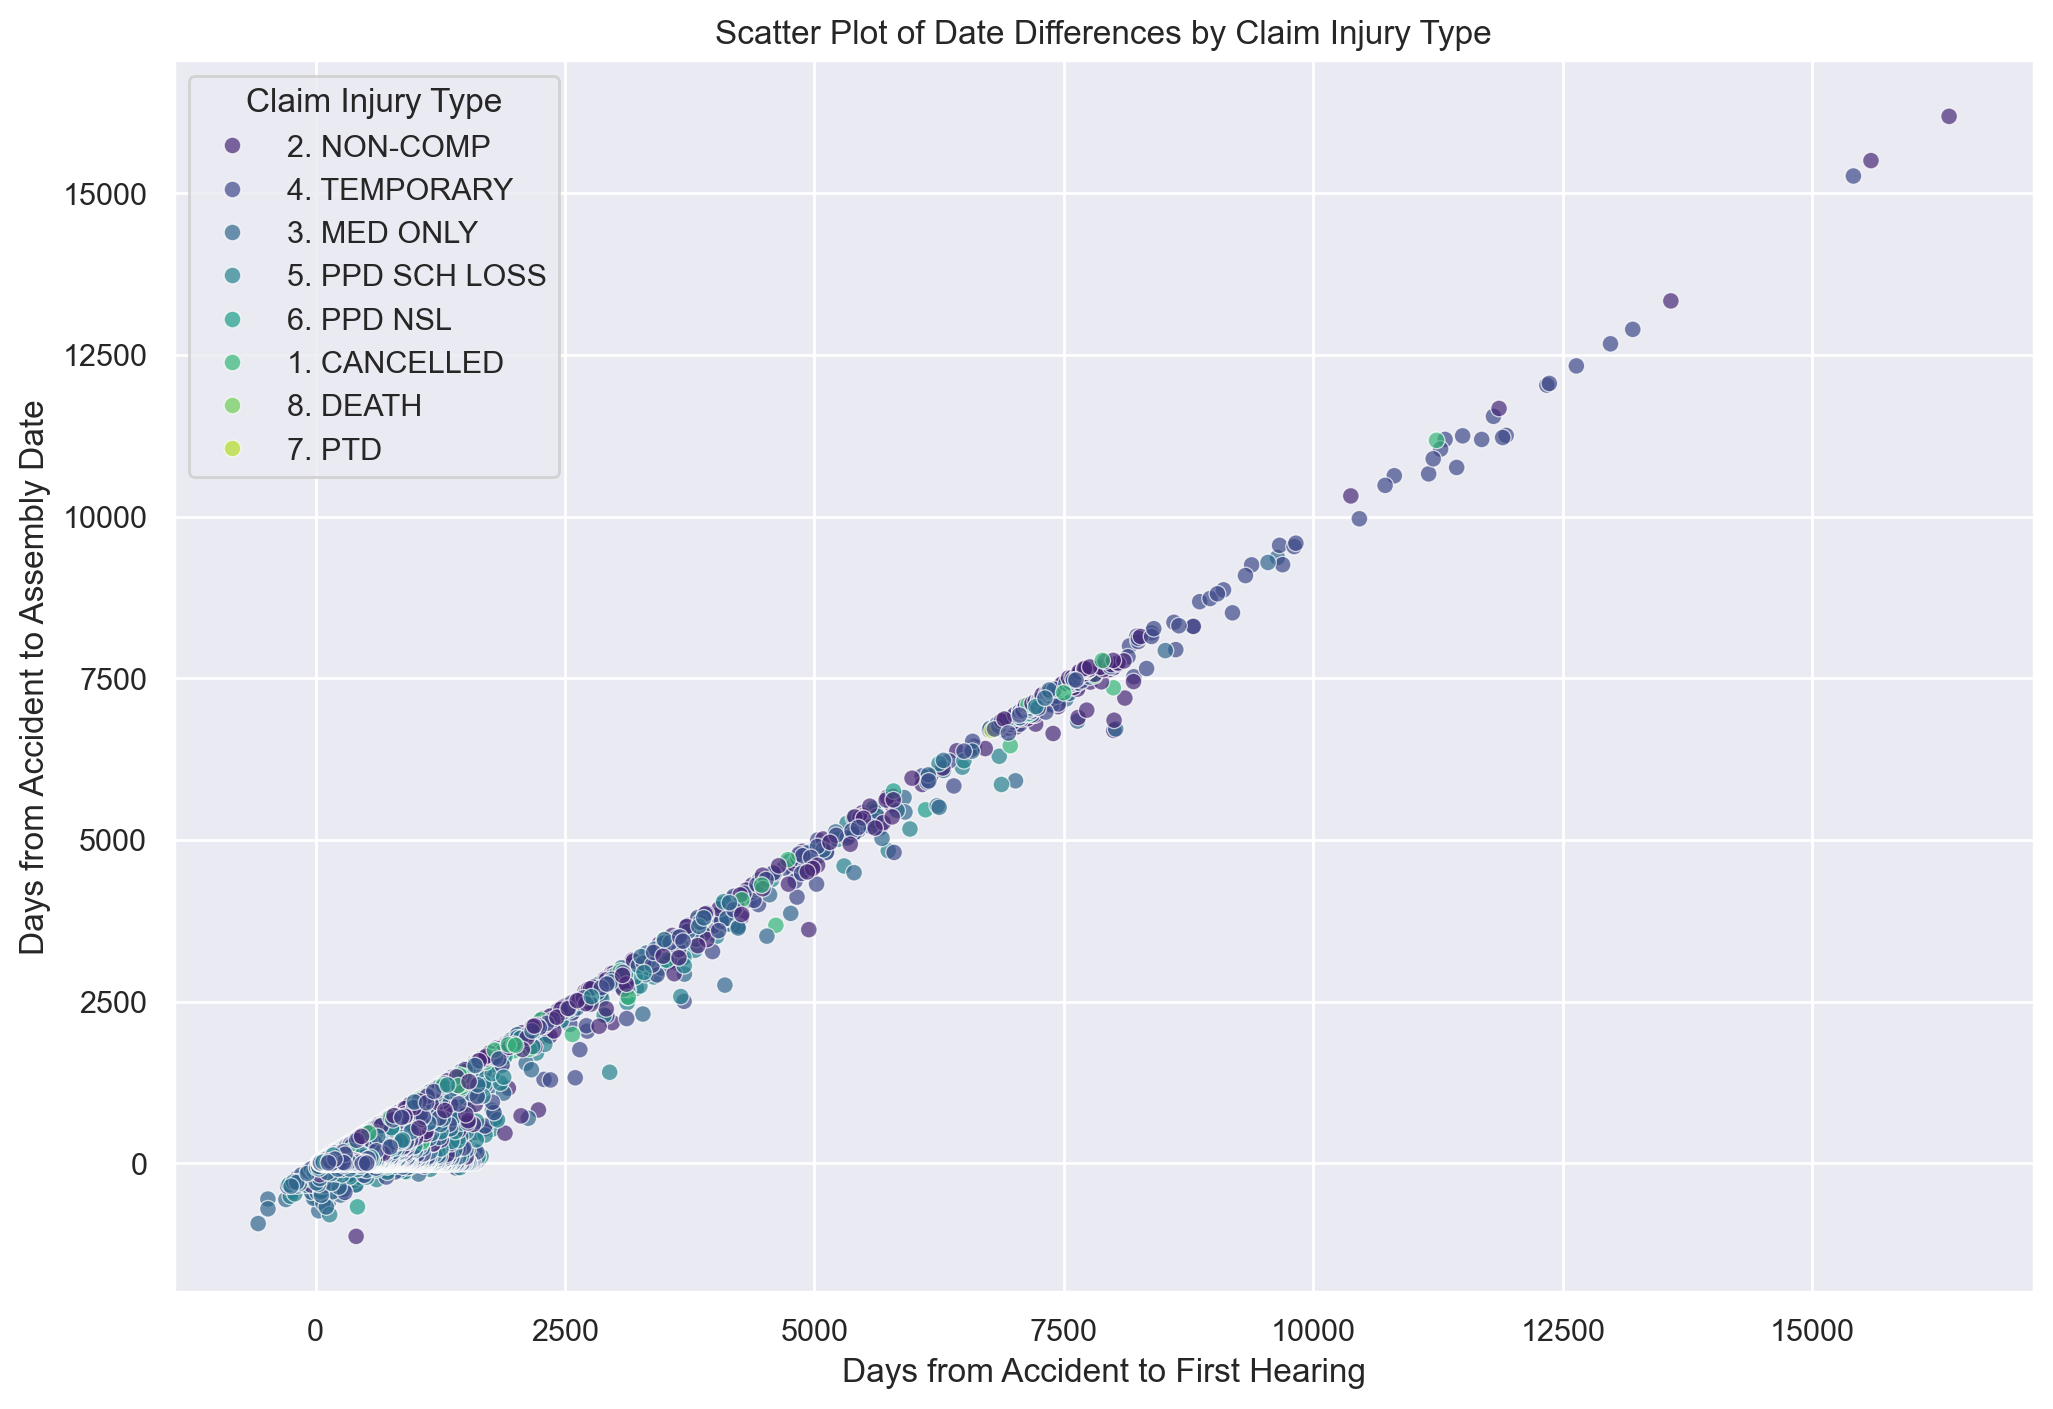

In [103]:
# Calculate the date differences
train_data['Hearing_to_Accident'] = (train_data['First Hearing Date'] - train_data['Accident Date']).dt.days
train_data['Assembly_to_Accident'] = (train_data['Assembly Date'] - train_data['Accident Date']).dt.days
train_data['Hearing_to_Assembly'] = (train_data['First Hearing Date'] - train_data['Assembly Date']).dt.days

# Set up the scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot of 'Hearing_to_Accident' vs 'Assembly_to_Accident' colored by 'Claim Injury Type'
sns.scatterplot(
    data=train_data,
    x='Hearing_to_Accident',
    y='Assembly_to_Accident',
    hue='Claim Injury Type',
    palette='viridis',
    alpha=0.7
)

# Adding titles and labels
plt.title('Scatter Plot of Date Differences by Claim Injury Type')
plt.xlabel('Days from Accident to First Hearing')
plt.ylabel('Days from Accident to Assembly Date')
plt.legend(title='Claim Injury Type')
plt.grid(True)

plt.show()


As expected, the distribution is linear and we have no significant differences between Claim Injury Types

### Categorical Data Visualization

For categorical data, we plotted a bar chart showing frequency of unique values: 

this visualization is not ideal for following attributes, that present more dense values <br>
`Zip Code` <br>
`Carrier Name` <br>

[ ] change visual for these attributes

## 1.6 Multivariate Relationships <a name="16-multivariate-relationships"></a>


`Gender` <> `Day of Year`

In [109]:
train_data['Day of Year'] = train_data['Accident Date'].dt.dayofyear

In [110]:
# Map Gender to numerical values (e.g., 0 for Male, 1 for Female)
train_data['Gender Numeric'] = train_data['Gender'].map({'M': 0, 'F': 1})

## Useful Aggregations

In [113]:
train_data[train_data['C-3 Date'].isna()]['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        252951
4. TEMPORARY        69533
3. MED ONLY         45065
5. PPD SCH LOSS     11065
1. CANCELLED         6867
6. PPD NSL            859
8. DEATH              423
7. PTD                 18
Name: count, dtype: int64

In [114]:
train_data[train_data['IME-4 Count'].isna()]['Claim Injury Type'].value_counts()

Series([], Name: count, dtype: int64)

In [115]:
train_data[train_data['C-2 Date'].isna()]['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        7502
1. CANCELLED       6710
4. TEMPORARY        218
3. MED ONLY         108
5. PPD SCH LOSS      21
7. PTD                1
Name: count, dtype: int64

In [116]:
# Get value counts for 'Claim Injury Type' where 'C-2 Date' and 'C-3 Date' are NaN
c2_counts = train_data[train_data['C-2 Date'].isna()]['Claim Injury Type'].value_counts()
c3_counts = train_data[train_data['C-3 Date'].isna()]['Claim Injury Type'].value_counts()
c2_c3 = train_data[(train_data['C-3 Date'].isna()) & (train_data['C-2 Date'].isna())]['Claim Injury Type'].value_counts()

# Total counts for normalization (relative frequency)
total_c2 = c2_counts.sum()
total_c3 = c3_counts.sum()
totalc2_c3 = c2_c3.sum()

# Create a DataFrame combining absolute and relative frequencies
claim_injury_summary = pd.DataFrame({
    'without C-2 Form': c2_counts,
    'without C-3 Form': c3_counts,
    'Without both forms': c2_c3,
    'Both forms RELATIVE FREQ': (c2_c3 / totalc2_c3) * 100,
    'C-2 Relative Frequency (%)': (c2_counts / total_c2) * 100,
    'C-3 Relative Frequency (%)': (c3_counts / total_c3) * 100,
}).fillna(0)  # Fill NaN with 0 for categories missing in either column

# Display the DataFrame
claim_injury_summary

without C-2 Form  without C-3 Form  Without both forms  \
Claim Injury Type                                                           
1. CANCELLED                 6710.0              6867              2706.0   
2. NON-COMP                  7502.0            252951              3529.0   
3. MED ONLY                   108.0             45065                21.0   
4. TEMPORARY                  218.0             69533                99.0   
5. PPD SCH LOSS                21.0             11065                 0.0   
6. PPD NSL                      0.0               859                 0.0   
7. PTD                          1.0                18                 1.0   
8. DEATH                        0.0               423                 0.0   

                   Both forms RELATIVE FREQ  C-2 Relative Frequency (%)  \
Claim Injury Type                                                         
1. CANCELLED                      42.573946                   46.085165   
2. NON-COMP                       55.522341                   51.524725   
3. MED ONLY                        0.330396                    0.741758   
4. TEMPORARY                       1.557583                    1.497253   
5. PPD SCH LOSS                    0.000000                    0.144231   
6. PPD NSL                         0.000000                    0.000000   
7. PTD                             0.015733                    0.006868   
8. DEATH                           0.000000                    0.000000   

                   C-3 Relative Frequency (%)  
Claim Injury Type                              
1. CANCELLED                         1.775423  
2. NON-COMP                         65.399024  
3. MED ONLY                         11.651296  
4. TEMPORARY                        17.977357  
5. PPD SCH LOSS                      2.860792  
6. PPD NSL                           0.222090  
7. PTD                               0.004654  
8. DEATH                             0.109364

### Conditional Mode - by Industry Code

In this section we explore if the conditional mode of WCIO Cause of Injury Code and WCIO Part Of Body Code with Industry Code, since that we had no missing values in Industry Code and this could be a good solution to treat the missing values of the variables. We verified that it is not the best solution, but it's better than simply use the global mode.

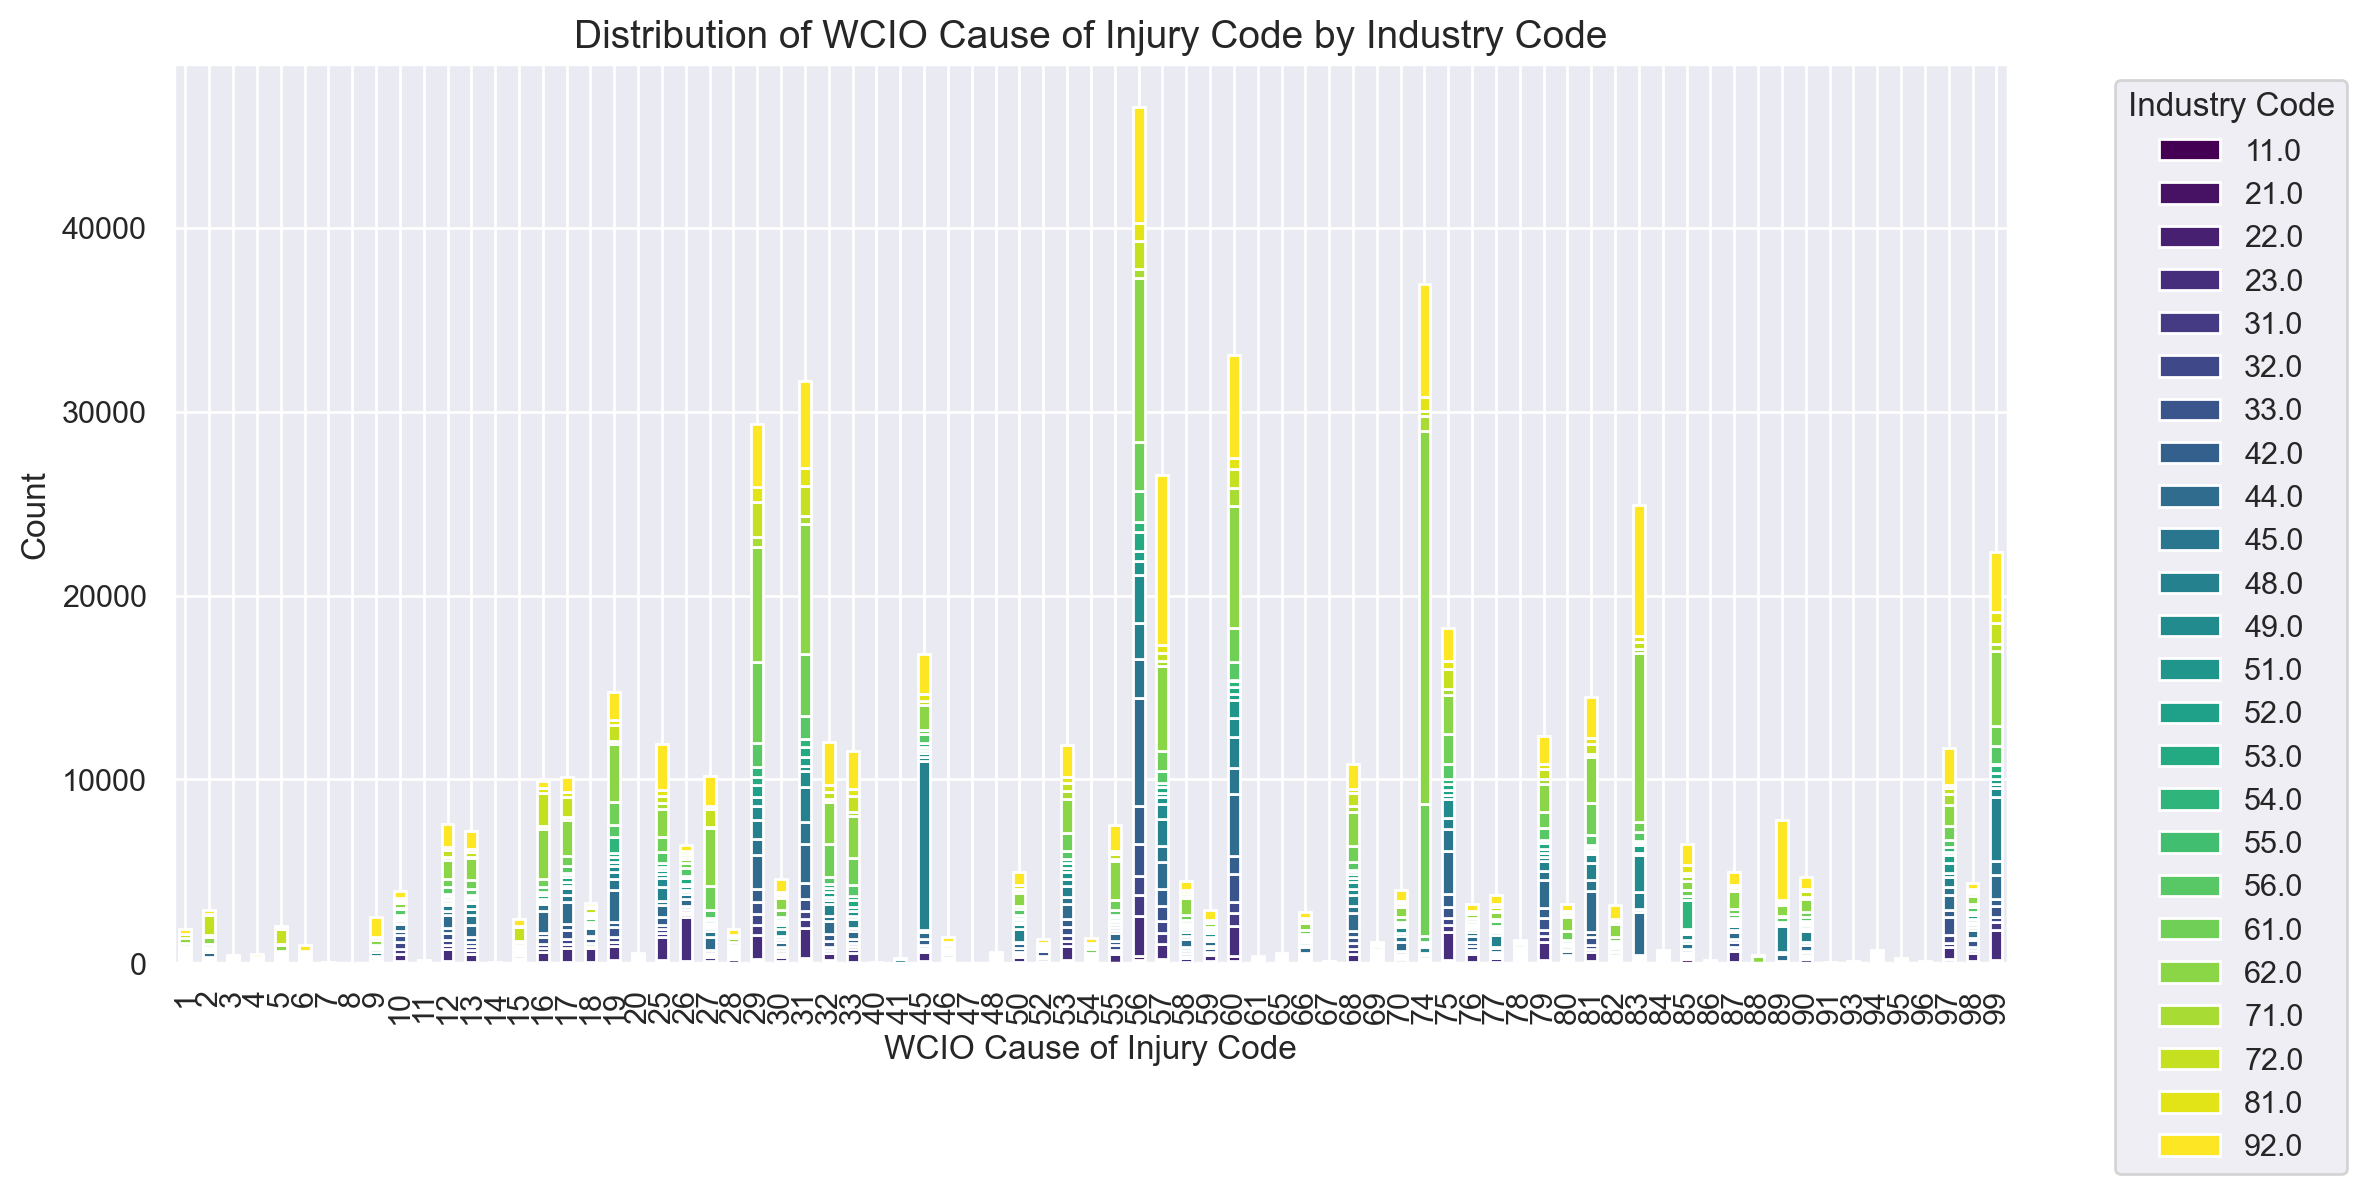

In [125]:
# Prepare the data for a stacked bar chart
cause_industry_counts = train_data.groupby(['WCIO Cause of Injury Code', 'Industry Code']).size().unstack(fill_value=0)

# Plot stacked bar chart
cause_industry_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribution of WCIO Cause of Injury Code by Industry Code', fontsize=14)
plt.xlabel('WCIO Cause of Injury Code', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Industry Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2984\950163664.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


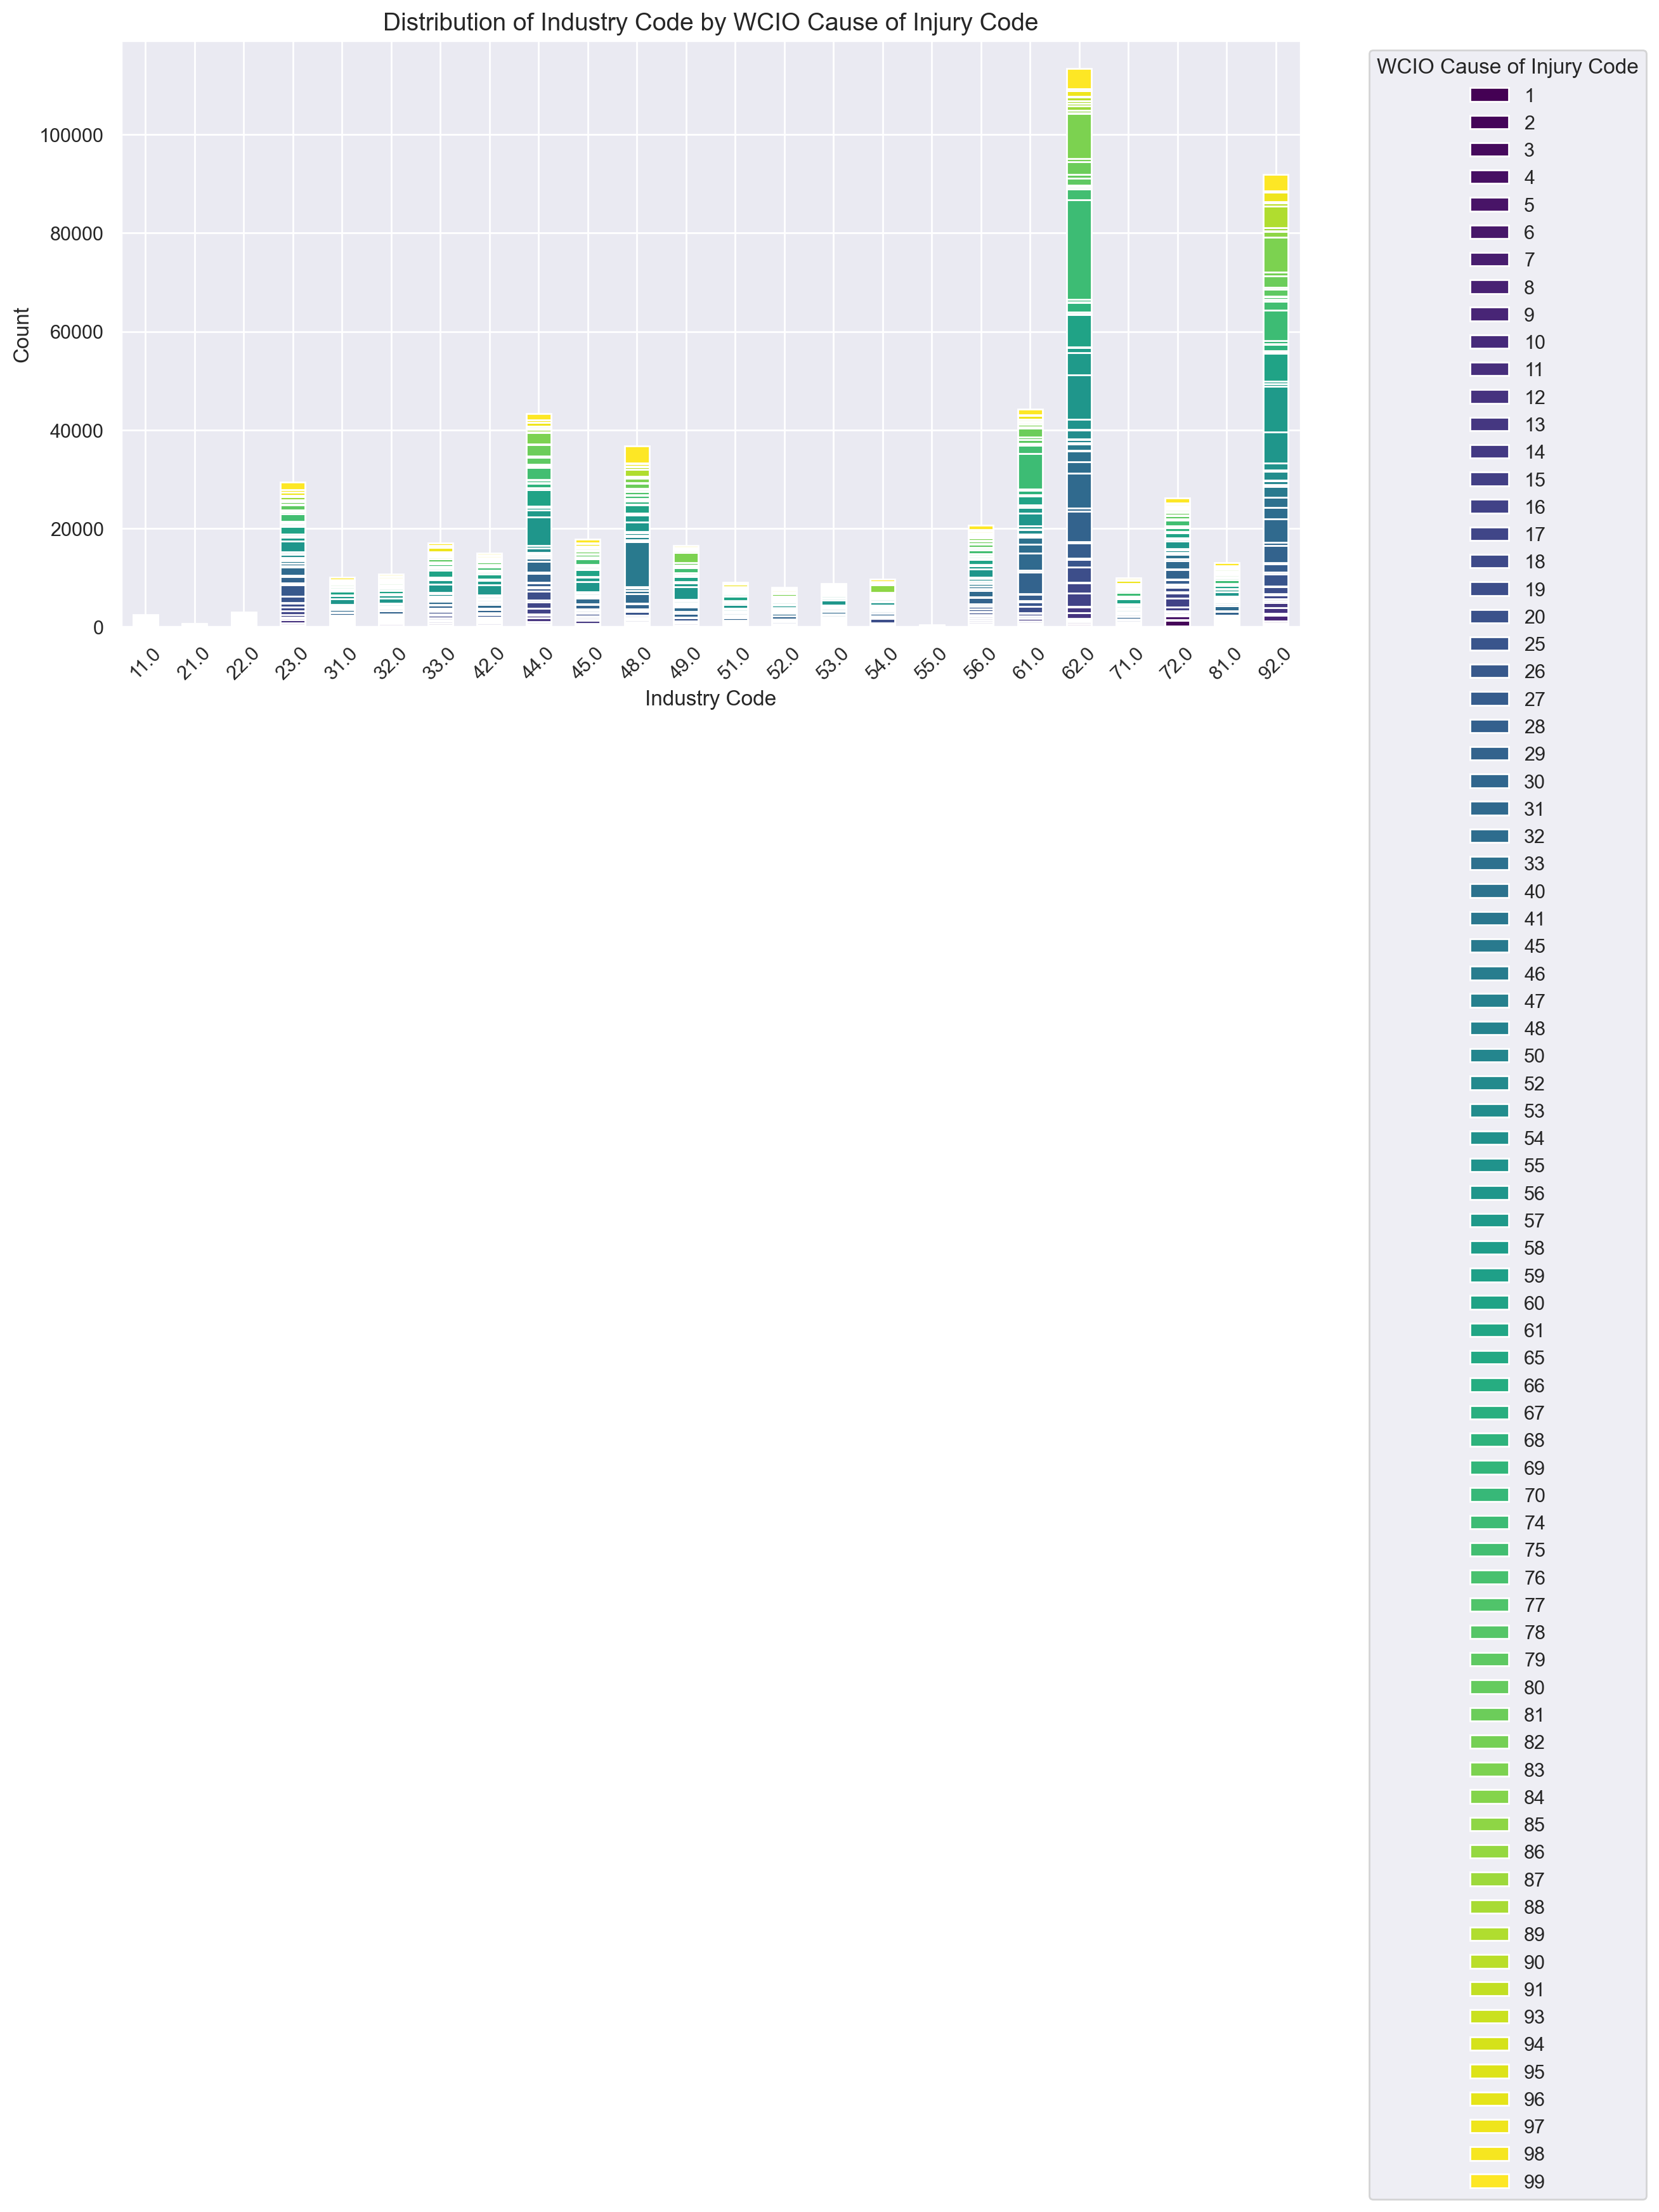

In [126]:
# Prepare the data for a stacked bar chart
industry_cause_counts = train_data.groupby(['Industry Code', 'WCIO Cause of Injury Code']).size().unstack(fill_value=0)

# Plot stacked bar chart
industry_cause_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribution of Industry Code by WCIO Cause of Injury Code', fontsize=14)
plt.xlabel('Industry Code', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='WCIO Cause of Injury Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

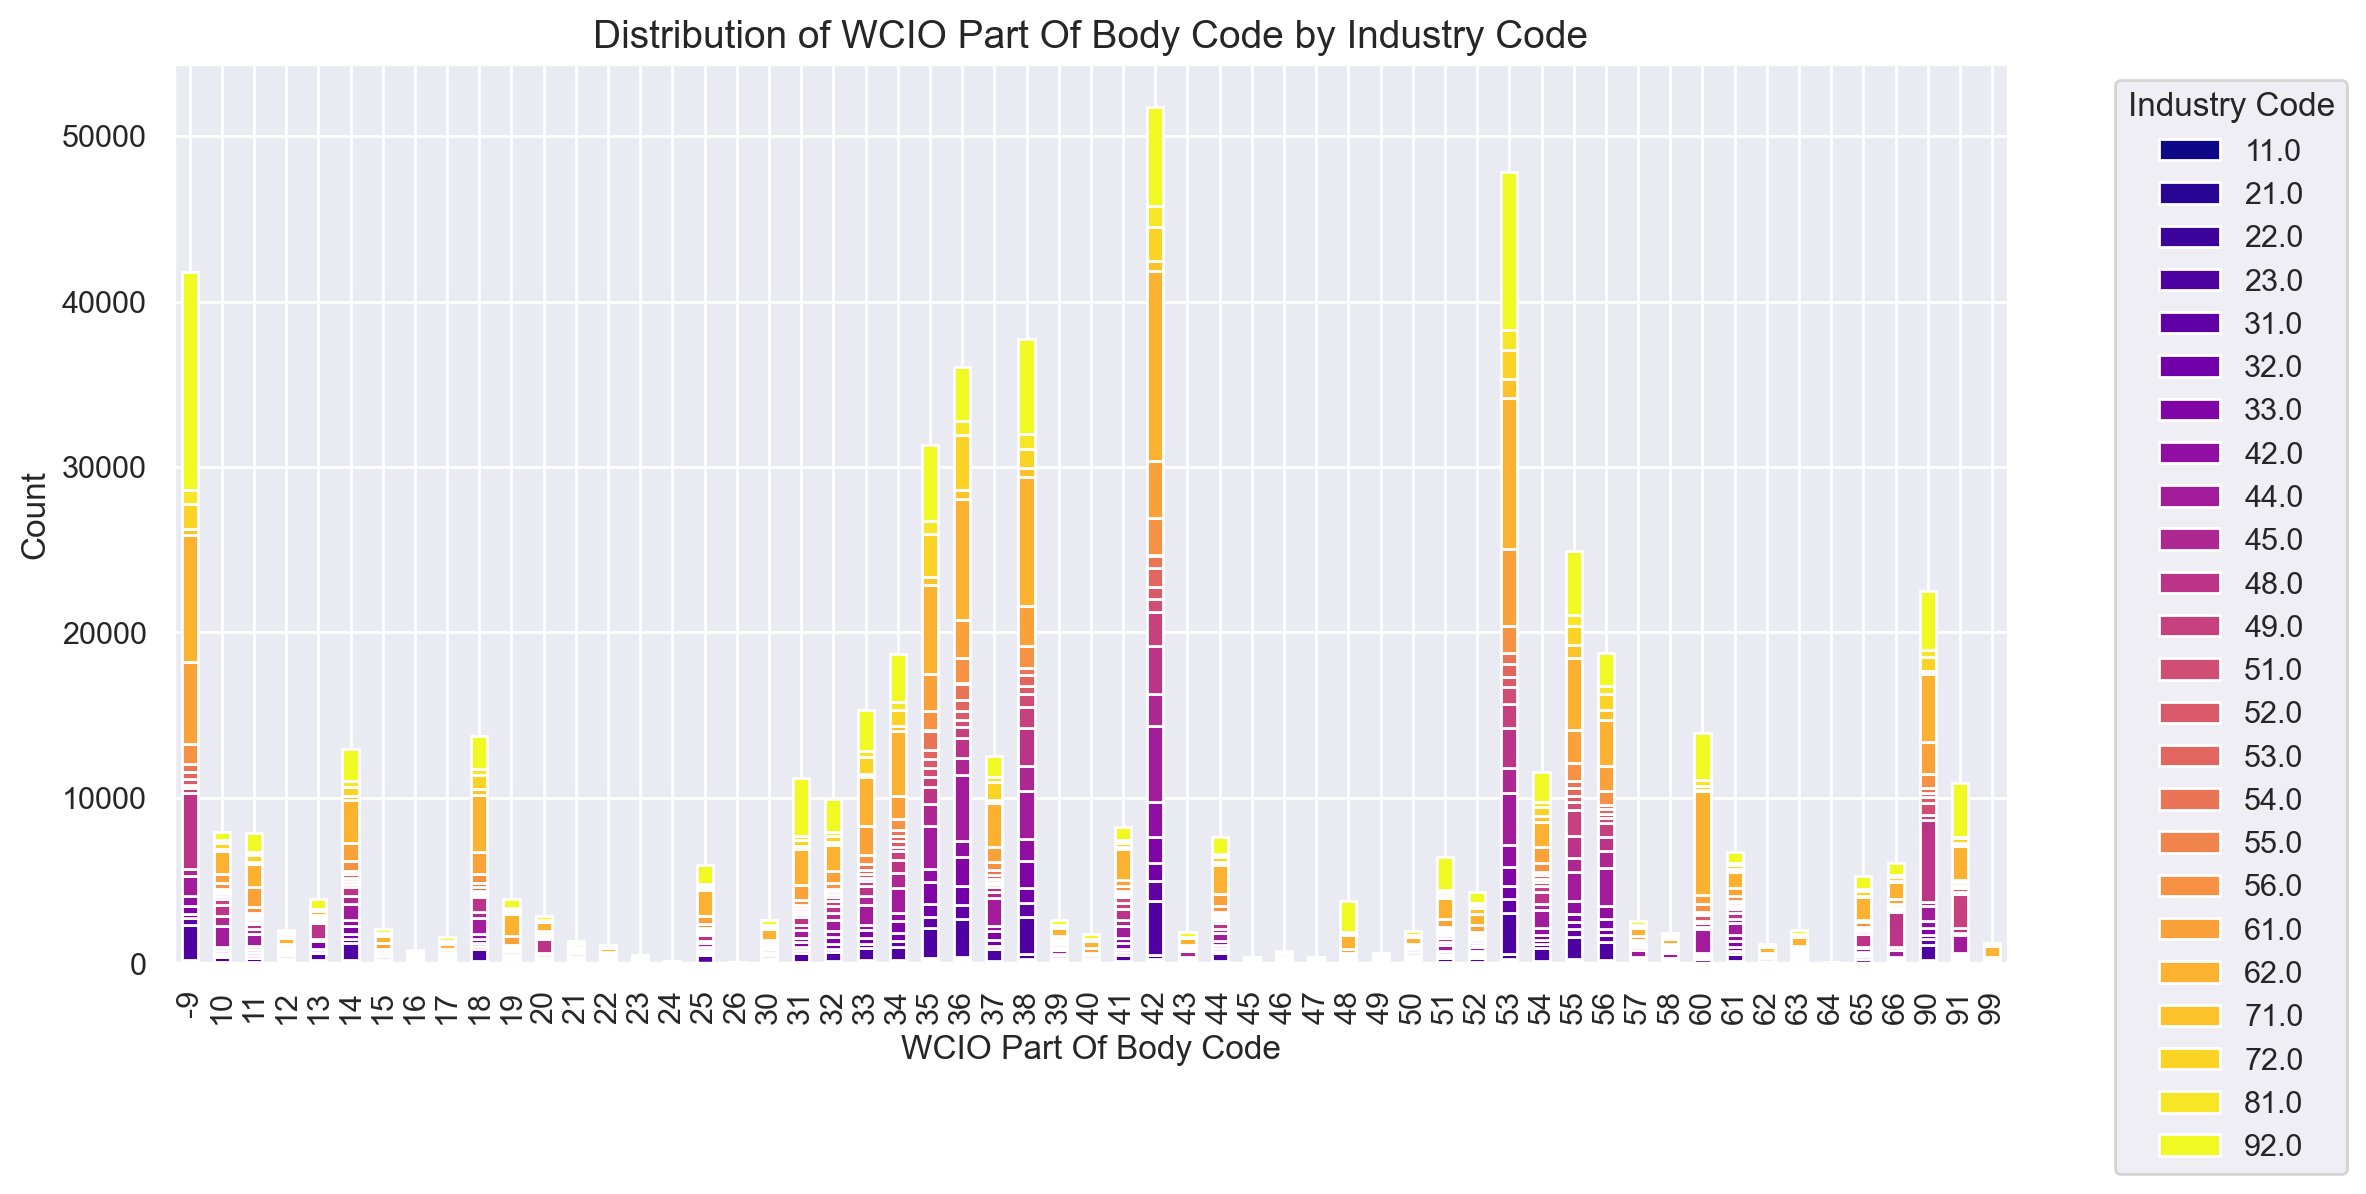

In [127]:
# Prepare the data for a stacked bar chart
body_industry_counts = train_data.groupby(['WCIO Part Of Body Code', 'Industry Code']).size().unstack(fill_value=0)

# Plot stacked bar chart
body_industry_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='plasma')
plt.title('Distribution of WCIO Part Of Body Code by Industry Code', fontsize=14)
plt.xlabel('WCIO Part Of Body Code', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Industry Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2984\2326239920.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


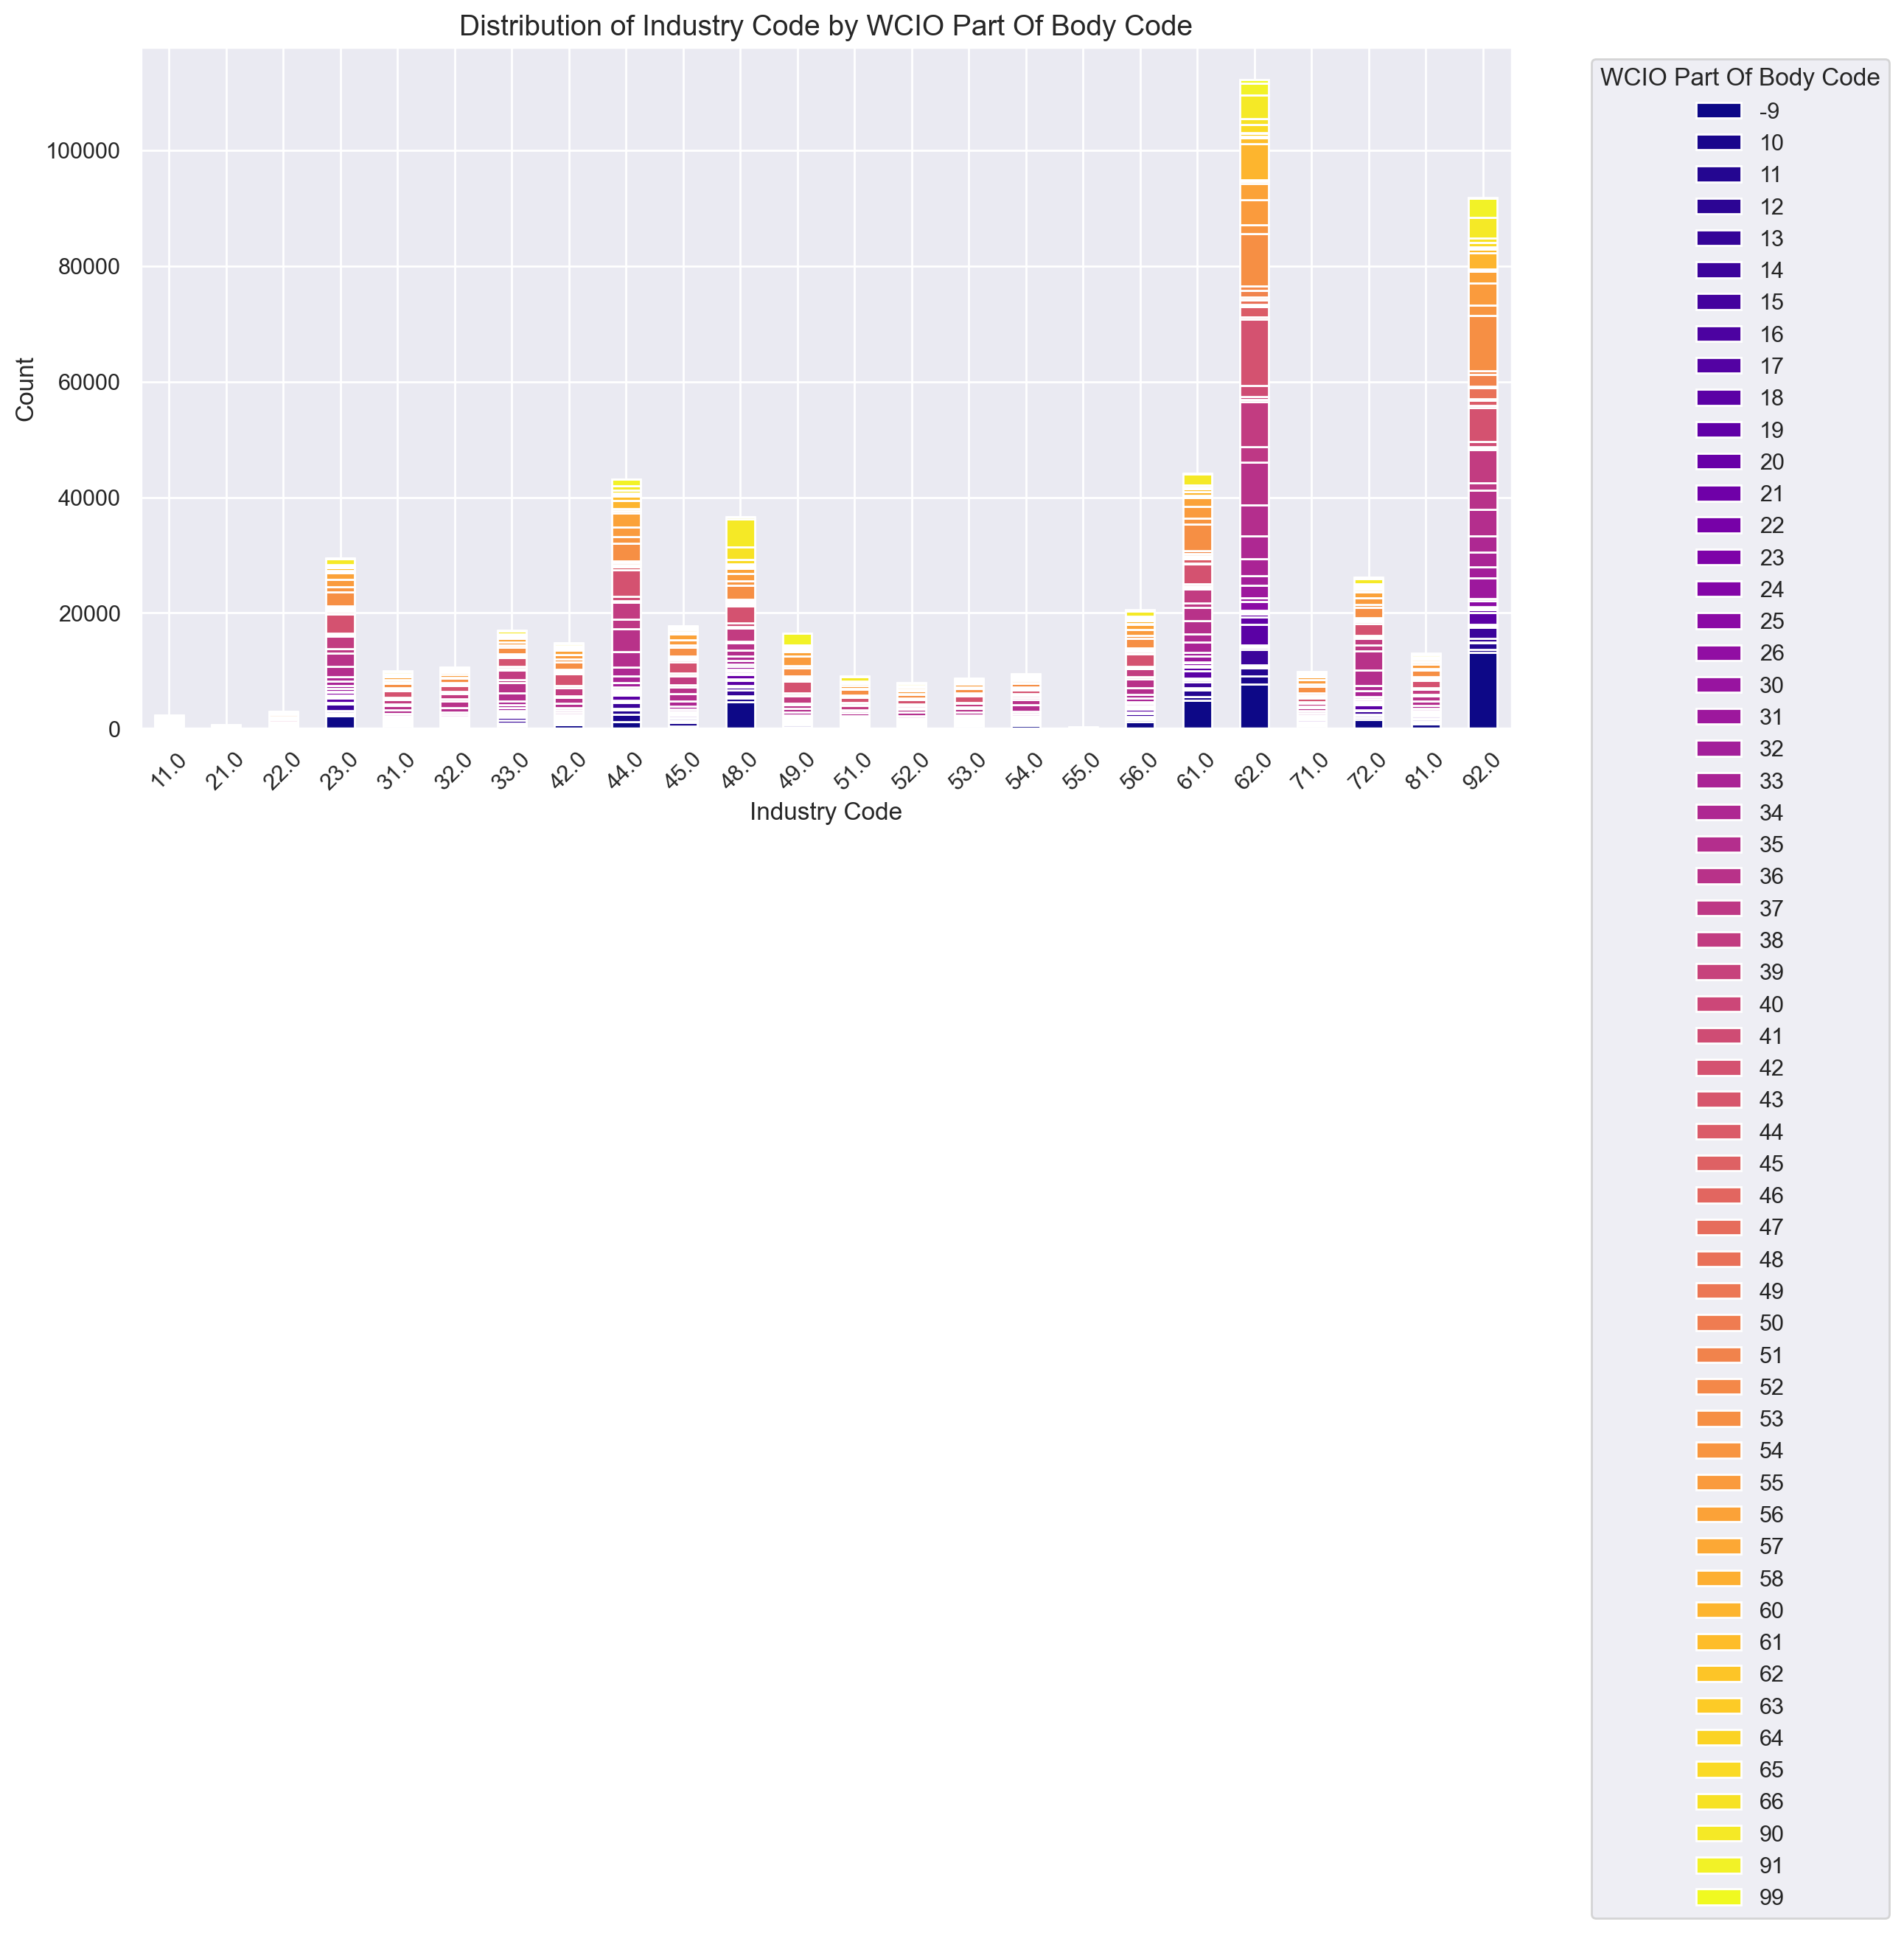

In [128]:
# Prepare the data for a stacked bar chart
industry_body_counts = train_data.groupby(['Industry Code', 'WCIO Part Of Body Code']).size().unstack(fill_value=0)

# Plot stacked bar chart
industry_body_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='plasma')
plt.title('Distribution of Industry Code by WCIO Part Of Body Code', fontsize=14)
plt.xlabel('Industry Code', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='WCIO Part Of Body Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()